# CLASE 4.3: OPTIMIZACIÓN
---
## Introducción.
Cuando colgamos una foto en la pared, a veces es difícil dejarla bien derecha. En general, queremos hacer un determinado ajuste, detenernos, evaluar la horizontalidad de la foto, y volver a repetir el proceso. Dicha secuencia de acciones es un ejemplo (trivial, si nos permitimos la licencia de decirlo así...) de resolución de un problema de optimización. Estamos cambiando la orientación de nuestra foto hasta que satisfaga nuestro requerimiento. Esto es, que su ángulo respecto de la horizontal sea igual a cero.

Un **problema de optimización** puede definirse *a groso modo* como uno que posee *infinitas* soluciones, pero sólo una que podemos denominar, bajo determinados criterios, como la *mejor* solución de todas ellas. El conjunto de infinitas soluciones que podemos asumir, en primera instancia, como *candidatas* para resolver nuestro problema suele denominarse como **espacio de soluciones factibles** del mismo, mientras que la *mejor* solución de dicho espacio, que puede ser estimada por una generosa variedad de métodos tanto algebraicos como numéricos, suele denominarse como **solución óptima** del problema. El *criterio* que permite establecer cúal es la mejor solución en un problema de este tipo guarda relación con los valores que toma una función, denominada como **función objetivo**, sobre el conjunto de soluciones factibles. Normalmente, estamos interesados en el o los valores máximos y mínimos que toma dicha función.

Consideremos, por ejemplo, la función cuadrática $f(x)=(x-3)^{2}$. Queremos encontrar el valor de $x$ tal que $f$ alcanza su valor mínimo. En términos gráficos, al ser $f$ una función cuadrática, sabemos que ésta describe una parábola en $\mathbb{R}^{2}$ con concavidad positiva (apuntando *hacia arriba*). Por lo tanto, es evidente que $f$ tiene un valor mínimo justo en el vértice de dicha parábola, cuando $x=3$.

En general, del curso de cálculo diferencial, sabemos que toda función $f$ que satisfaga el [teorema de Rolle](https://en.wikipedia.org/wiki/Rolle%27s_theorem) será tal que, para todo intervalo abierto $(a, b)$ donde $f$ es diferenciable y $f(a)=f(b)$, siempre existirá un punto interior $c$, tal que $a<c<b$, donde $f'(c)=0$. El punto $x=c$ es llamado **punto crítico** de $f$, y dará lugar a un valor máximo o mínimo de $f$ dependiendo del signo de la derivada $f'(x)$ para puntos a ambos lados de $c$ (criterio de la primera derivada). Si nos referimos a la función cuadrática $f(x)=(x-3)^{2}$, es fácil determinar que $f'(x)=2(x-3)$, de donde sabemos que el único punto crítico de $f$ es $x_{0}=3$. Debido a que la derivada de $f$ es negativa a la izquierda de $x_{0}$ y positiva a la derecha de $x_{0}$, se tendrá que $x_{0}=3$ es un mínimo de $f$.

El ejemplo anterior pone de manifiesto un problema sencillo de optimización univariable que es resoluble de forma analítica, ya que conocemos la función objetivo y no existen restricciones que limiten el espacio de soluciones factibles del problema. Sin embargo, si esta función fuese matemáticamente de mayor complejidad (por ejemplo, si la correspondiente expresión tuviera múltiples términos, varios puntos con derivada nula –máximos y/o mínimos locales, o puntos de ensilladura, que son puntos donde la derivada es nula, pero que no resultan en valores máximos y/o mínimos–, relaciones no lineales, o fuera dependiente de más de una variable), su optimización por métodos manuales sería, como mínimo, una misión extremadamente ardua y muchas veces imposible de resolver en términos algebraicos.

Podemos imaginar a la función objetivo en un problema de optimización como la representación de un paisaje, digamos de un valle, para el cual deseamos encontrar el punto con la mínima elevación posible. Tal analogía pone de manifiesto unq de las principales dificultades al enfrentarnos a un problema de este tipo: Si estuviéramos parados en cualquier valle, con montañas a nuestro alrededor ¿Cómo sabemos si aquel valle es el punto más bajo en toda la extensión de interés? O bien ¿Este valle es el más bajo, siendo que hay otros valles más allá de dichas montañas? En una jerga más formal ¿Cómo sabemos si no nos encontramos en un mínimo local, que corresponde a un valor mínimo de la función objetivo, pero sólo en un entorno local?

## Conceptos preliminares.
La situación presentada previamente pone de manifiesto que un problema de optimización corresponde a un desafío que puede resultar significativamente difícil bajo determinadas condiciones. Para poder entender dicha dificultad, será bueno refrescar algunos conocimientos que, en general, son repasados en detalle en los cursos de cálculo diferencial. No nos extenderemos demasiado aquí en ellos, pero sí será útil tenerlos en consideración. Ante todo, intentaremos dar ejemplos gráficos de lo que estamos hablando, para lo cual haremos un uso intensivo de la librería **Matplotlib**, a fin de graficar algunos resultados. Por supuesto, nos apoyaremos igualmente con **Numpy**, a fin de construir algunos arreglos de datos que nos permitirán describir ciertas funciones de interés:

In [1]:
# Importación de librerías.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sympy as sp

In [2]:
from IPython.core.display import HTML
from mpl_toolkits import mplot3d

In [3]:
# Setting de parámetros de graficación.
sns.set()
plt.rcParams["figure.dpi"] = 100 # Resolución de nuestras figuras.
plt.style.use("seaborn-v0_8-white") # Template de estilo.

In [4]:
# Centramos el output de los gráficos en este notebook.
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [5]:
# Inicializamos el sistema de impresión de resultados simbólicos de Sympy.
sp.init_printing()

In [6]:
%matplotlib notebook

En lo que resta de esta subsección, trabajaremos con campos escalares. Esto es, funciones reales o escalares de variable vectorial, del tipo $f:U\subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$, para $n\geq 2$, donde $U$ es un conjunto abierto de $\mathbb{R}^{n}$. Estamos interesados en resolver, mediante herramientas computacionales, problemas del tipo:

$$\begin{array}{ll}\min_{\mathbf{x} } &f\left( \mathbf{x} \right)  \\ \mathrm{s} .\mathrm{a} .:&g_{i}\left( \mathbf{x} \right)  \leq 0\\ &h_{j}\left( \mathbf{x} \right)  =0\end{array}$$
</p> <p style="text-align: right;">$(3.1)$</p>

Donde $1\leq i\leq m$ y $1\leq j\leq p$, donde:
- $f:U\subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$ es una **función objetivo** que deseamos minimizar sobre el vector $\mathbf{x}$ de $n$ variables.
- El conjunto $g_{i}(\mathbf{x})=0$ es denominado **restricciones de desigualdad**.
- El conjunto $h_{j}(\mathbf{x})=0$ es denominado **restricciones de igualdad**.
- Y por supuesto, $m,p\geq 0$.

Si $m=p=0$, el problema (3.1), llamado **problema de optimización restringida**, se reduce a uno del tipo **no restringido**. Por convención, la forma estándar anterior define un problema de minimización. Un problema de maximización puede tratarse negando la función objetivo; es decir, escribiendo $\max(f(\mathbf{x}))=-\min(f(\mathbf{x}))$.

Sea $f:U\subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$ una función definida en el conjunto abierto $U$ de $\mathbb{R}^{n}$. Diremos que $f$ tiene un **mínimo (o un máximo) local o relativo** en el punto $x_{0}\in U$, si $f\left( \mathbf{x}_{0} \right)  \leq f\left( \mathbf{x} \right)$ ($f\left( \mathbf{x}_{0} \right)  \geq f\left( \mathbf{x} \right)$, respectivamente) para todo $\mathbf{x}$ en una bola $B$ de centro en $\mathbf{x}_{0}$. Es decir, al igual que en el caso de las funciones de una variable, la función $f$ tendrá un mínimo local en $\mathbf{x}_{0}\in U$ si $f(\mathbf{x}_{0})$ es el valor más pequeño de todos los valores de $f(\mathbf{x})$ para $\mathbf{x}$ en una bola $B$ de centro en $\mathbf{x}_{0}$.

Podemos observar un ejemplo sencillo del concepto anterior considerando la función $f(x,y)=x^{2}+y^{2}$, cuyo gráfico describe una superficie conocida como paraboloide circular. Dicha función tiene un mínimo global (absoluto, que es el valor mínimo de la función en todo su dominio) en el origen. Para comprobarlo, haremos uso las librerías que ya conocemos para graficar esta superficie en el entorno de dicho mínimo global:

In [7]:
# Definimos la función correspondiente.
def f(x, y):
    return x**2 + y**2

In [8]:
# Creamos un par de arreglos que limitarán la grilla completa de valores donde graficaremos f.
x = np.linspace(start=-5, stop=5, num=100)
y = np.linspace(start=-5, stop=5, num=100)

X, Y = np.meshgrid(x, y)

In [9]:
# Evaluamos f en esta grilla.
Z = f(X, Y)

<IPython.core.display.Javascript object>


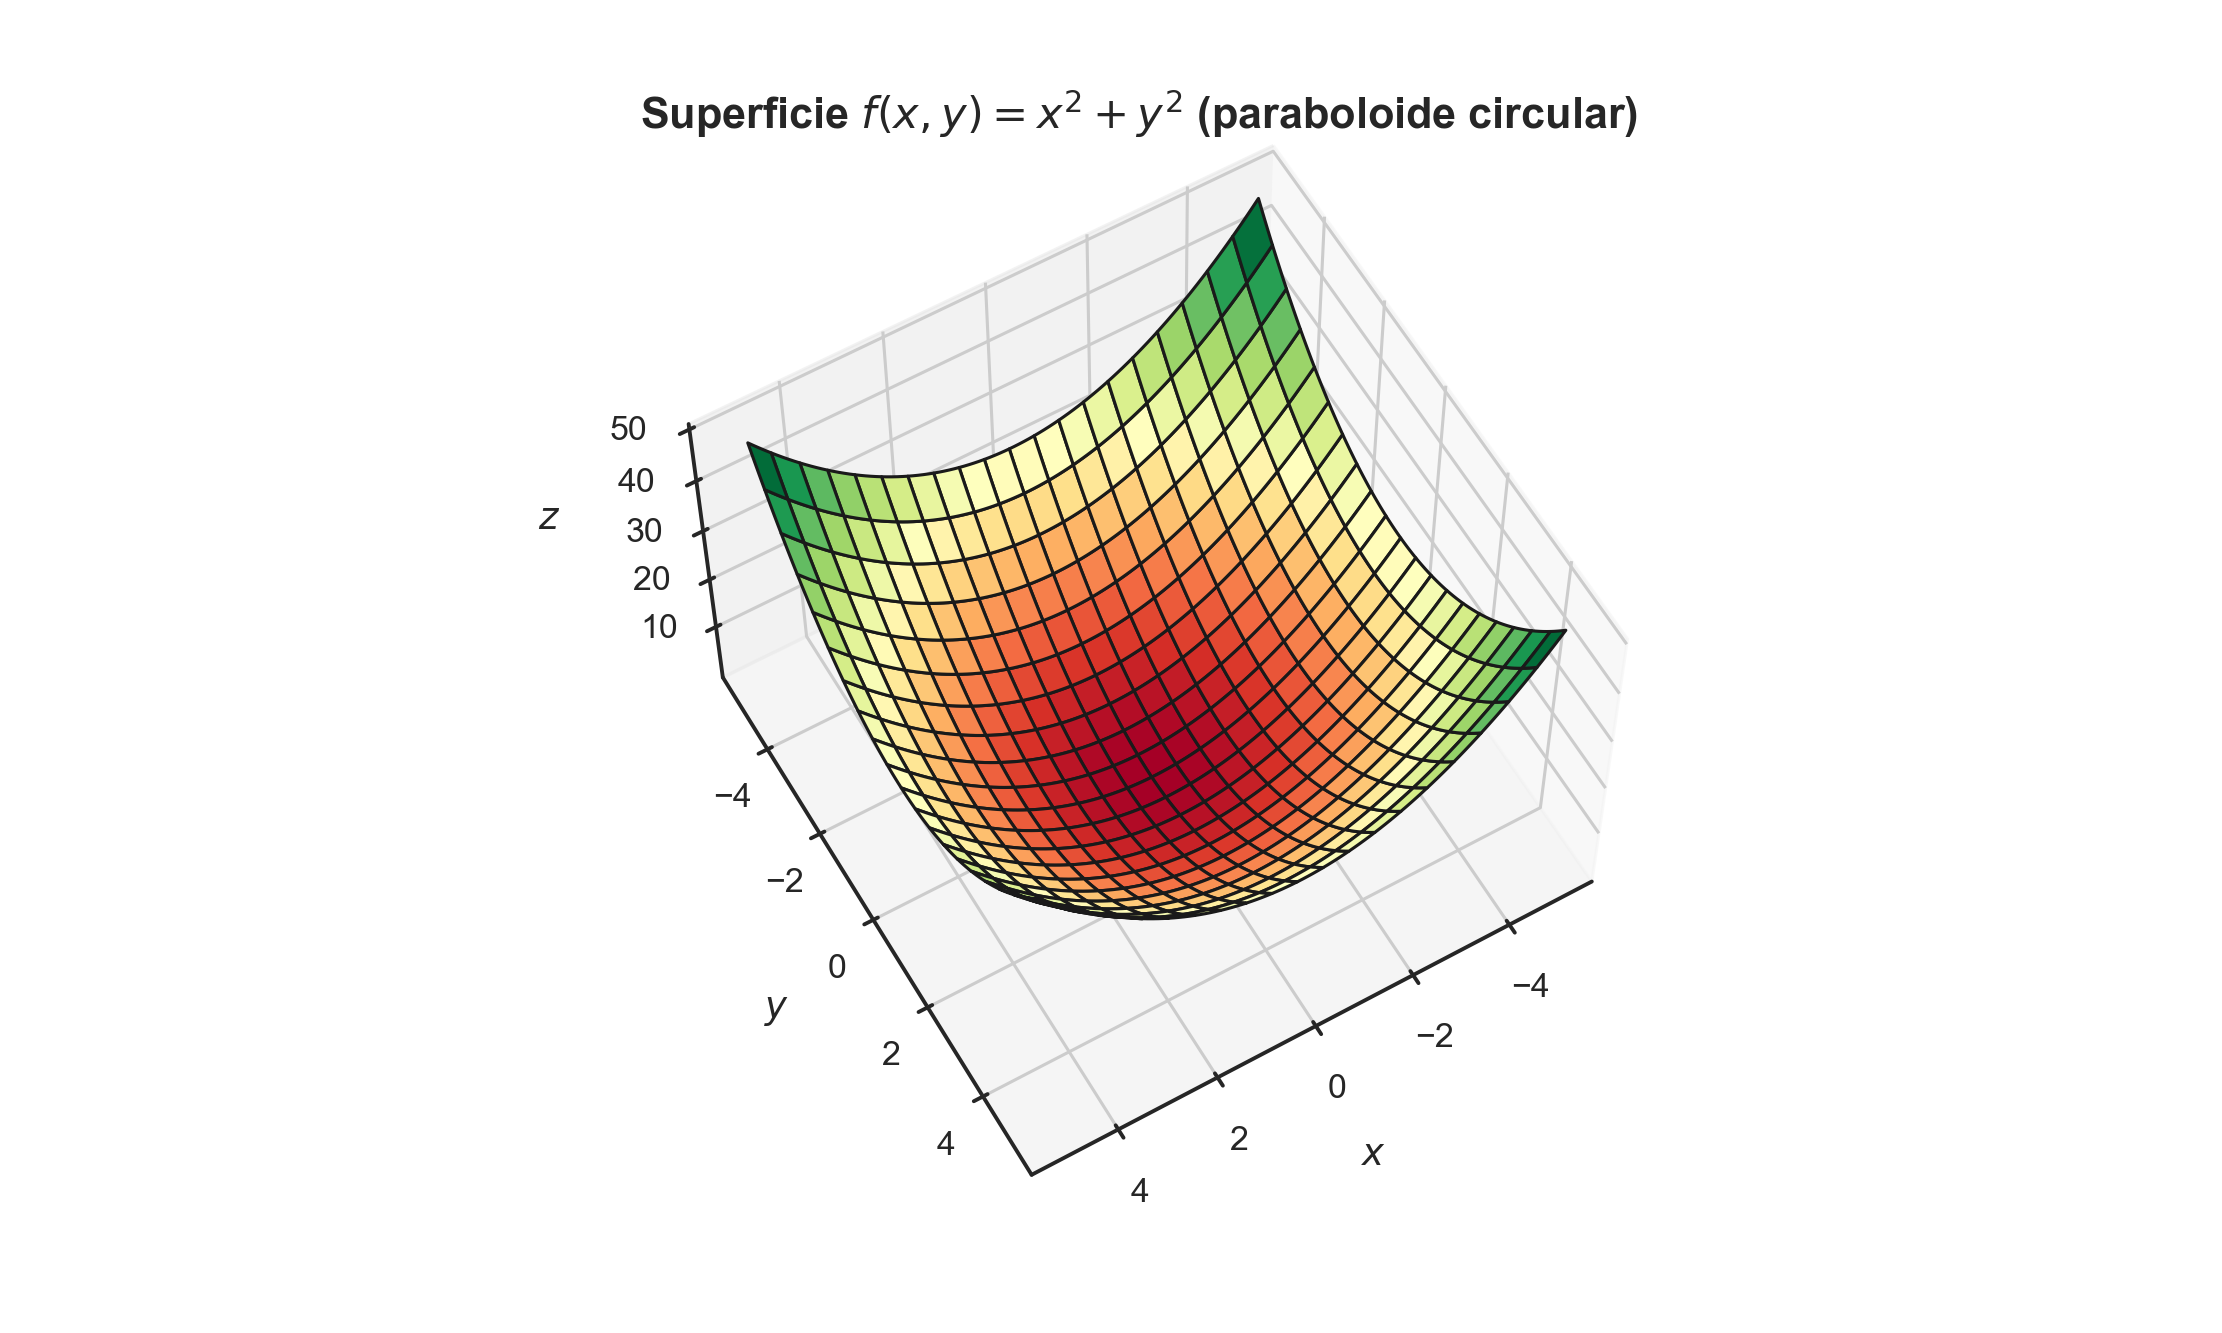

In [10]:
# Y construimos el gráfico de la superficie.
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=5, cstride=5, cmap='RdYlGn', edgecolor='k')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$", fontsize=12, labelpad=10)
ax.set_title(r'Superficie $f(x,y)=x^{2}+y^{2}$ (paraboloide circular)', fontsize=14, fontweight="bold", pad=10)
ax.view_init(60, 60);

<IPython.core.display.Javascript object>


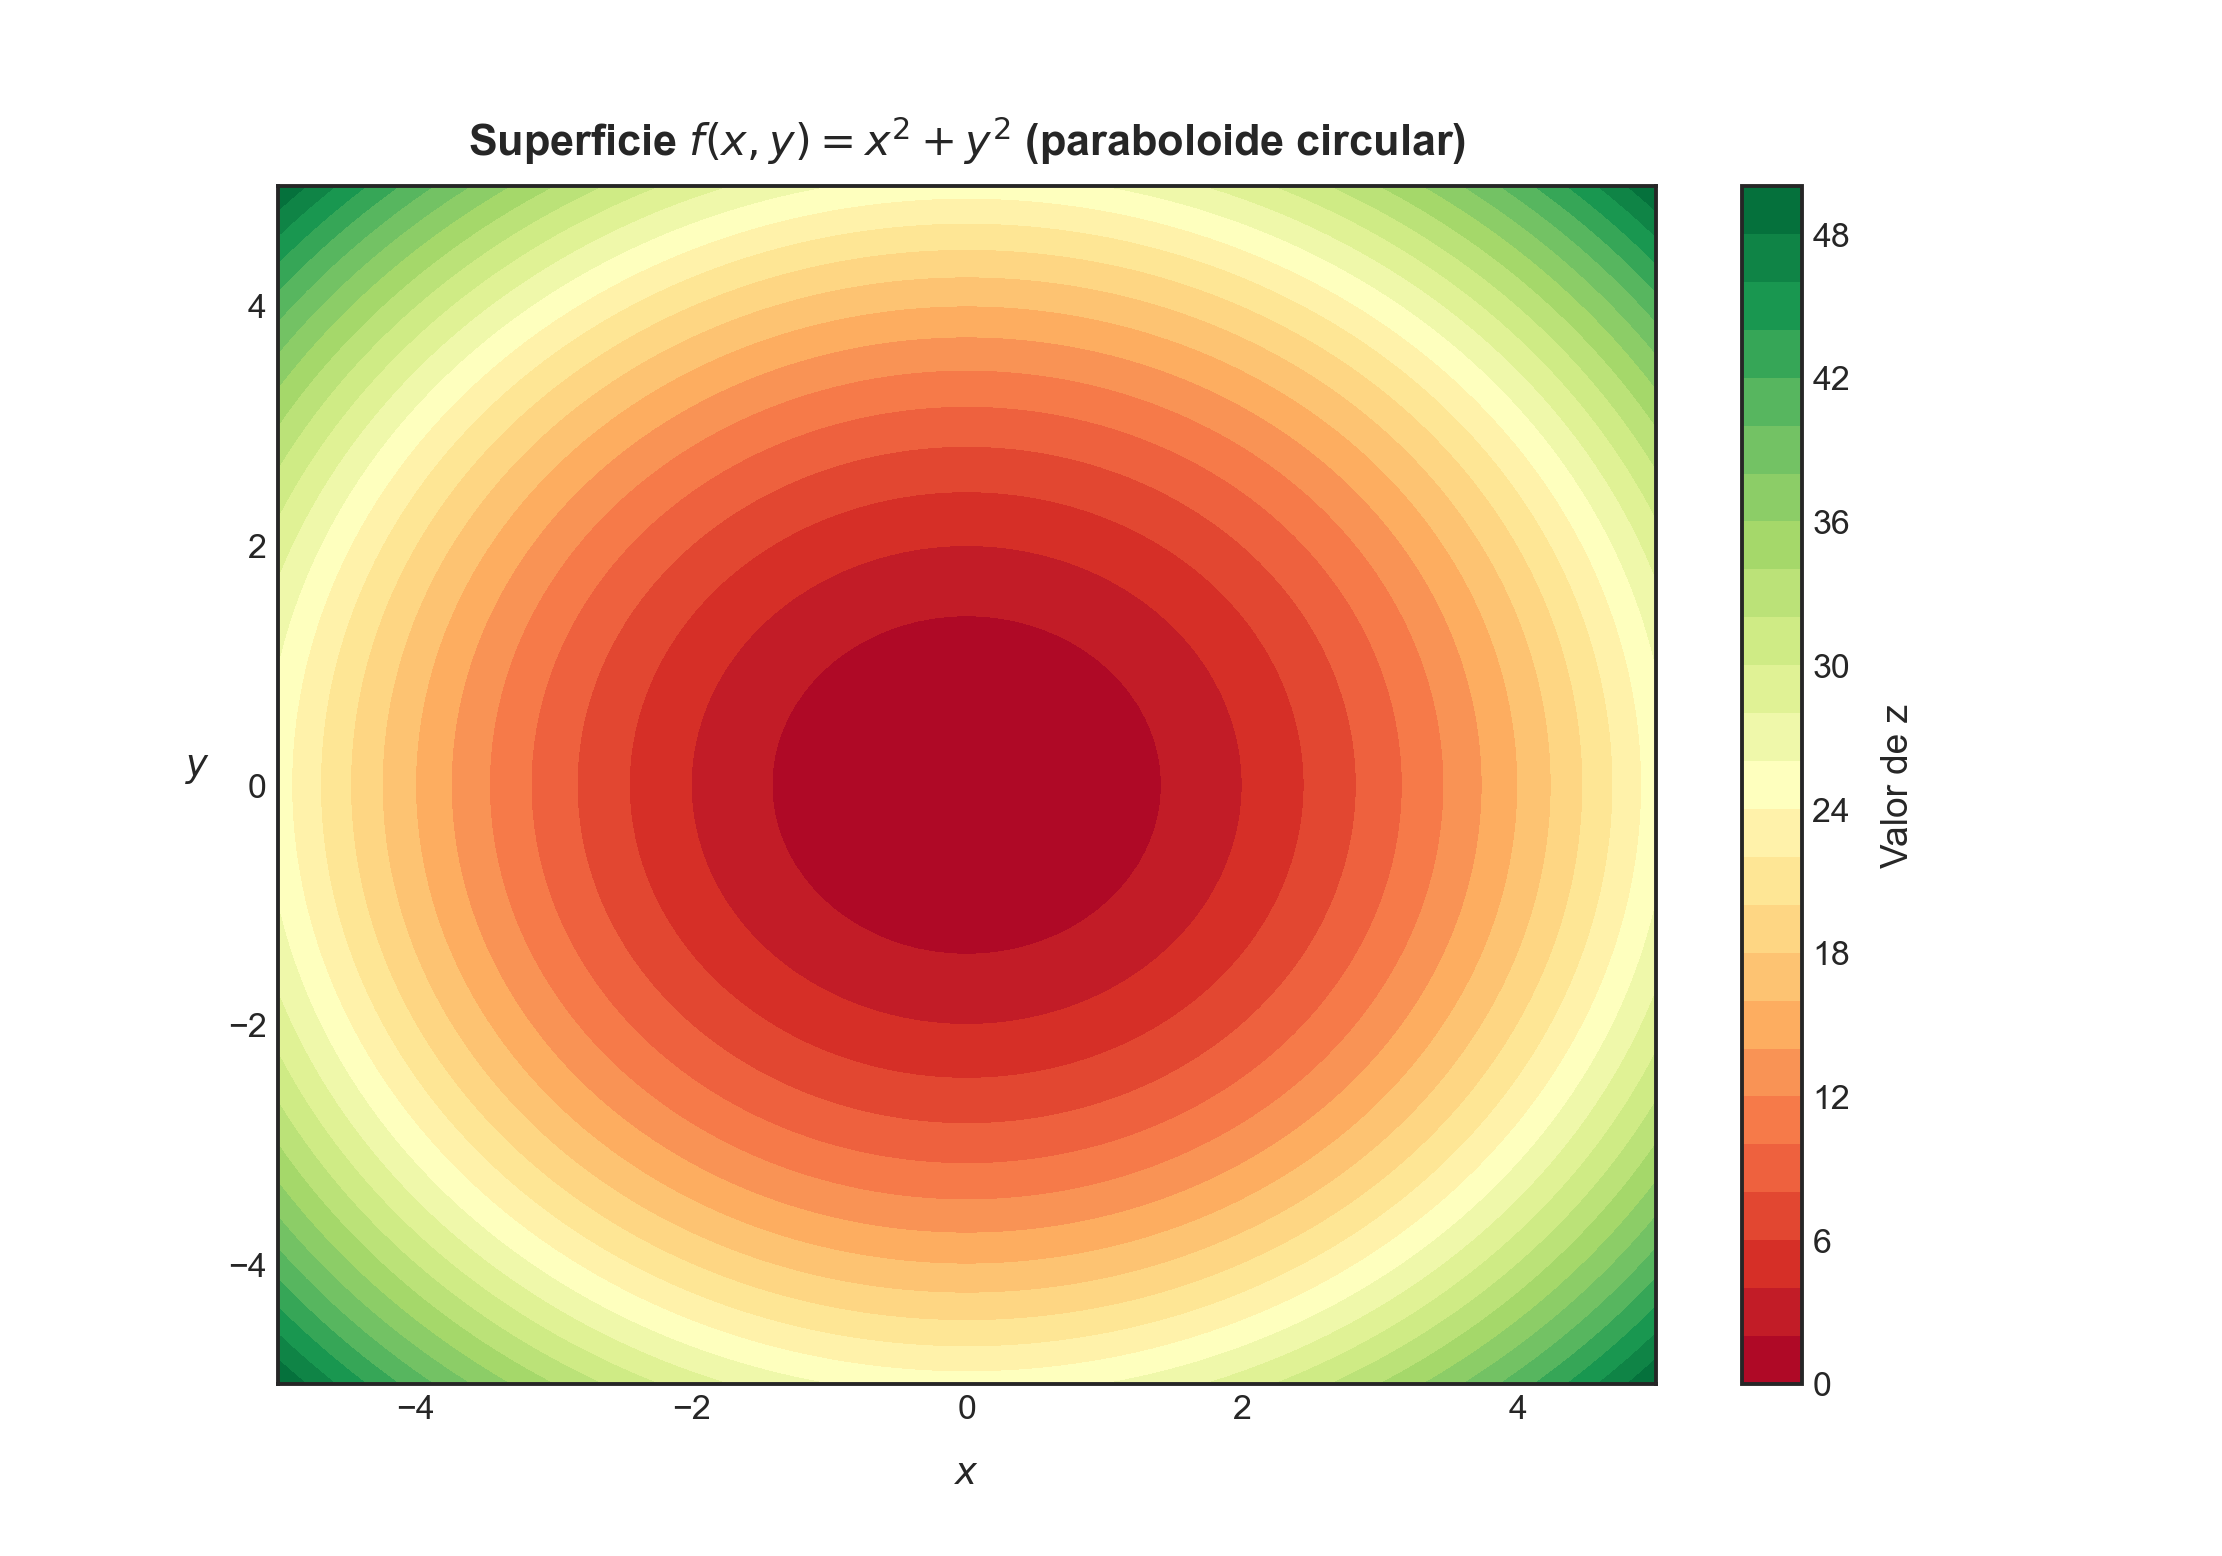

In [11]:
# Y creamos un gráfico de contorno completo para visualizar este mínimo global en 2D.
fig, ax = plt.subplots(figsize=(10, 7))
p = ax.contourf(X, Y, Z, levels=30, cmap='RdYlGn')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10, rotation=0)
ax.set_title(r'Superficie $f(x,y)=x^{2}+y^{2}$ (paraboloide circular)', fontsize=14, fontweight="bold", pad=10)
cb = plt.colorbar(p)
cb.set_label("Valor de z", fontsize=12, labelpad=10);

Consideremos la función $f:U\subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$ definida en el conjunto abierto $U$ de $\mathbb{R}^{n}$. Sea $\bar{\mathbf{x}}\in U$. Si cualquier bola (de $\mathbb{R}^{n}$) con centro en $\bar{\mathbf{x}}$ contiene puntos $\mathbf{x}\in B$ tales que $f(\mathbf{x})-f(\bar{\mathbf{x}})>0$ y puntos $\mathbf{y}\in B$ tales que $f(\mathbf{y})-f(\bar{\mathbf{x}})>0$, entonces decimos que $\mathbf{x}$ es un **punto de ensilladura** (o punto silla) de la función $f$.

El aspecto de la gráfica de una función $f:U\subseteq \mathbb{R}^{2} \rightarrow \mathbb{R}$ en el entorno de un punto de ensilladura es, en efecto, en de una silla de montar. Un ejemplo clásico de un punto con estas características se puede observar en una superficie denominada paraboloide hiperbólico. Dicha superficie corresponde a la gráfica de la función $f\left( x,y\right)  =\frac{x^{2}}{a^{2}} -\frac{y^{2}}{b^{2}}$, con $a, b>0$. Podemos graficar dicha función para tener una visualización completa del correspondiente punto de ensilladura:

In [12]:
# Definimos la función correspondiente.
def f(x, y, a, b):
    return x**2/a**2 - y**2/b**2

In [13]:
# Evaluamos f en la grilla anterior.
Z = f(X, Y, a=3, b=2)

<IPython.core.display.Javascript object>


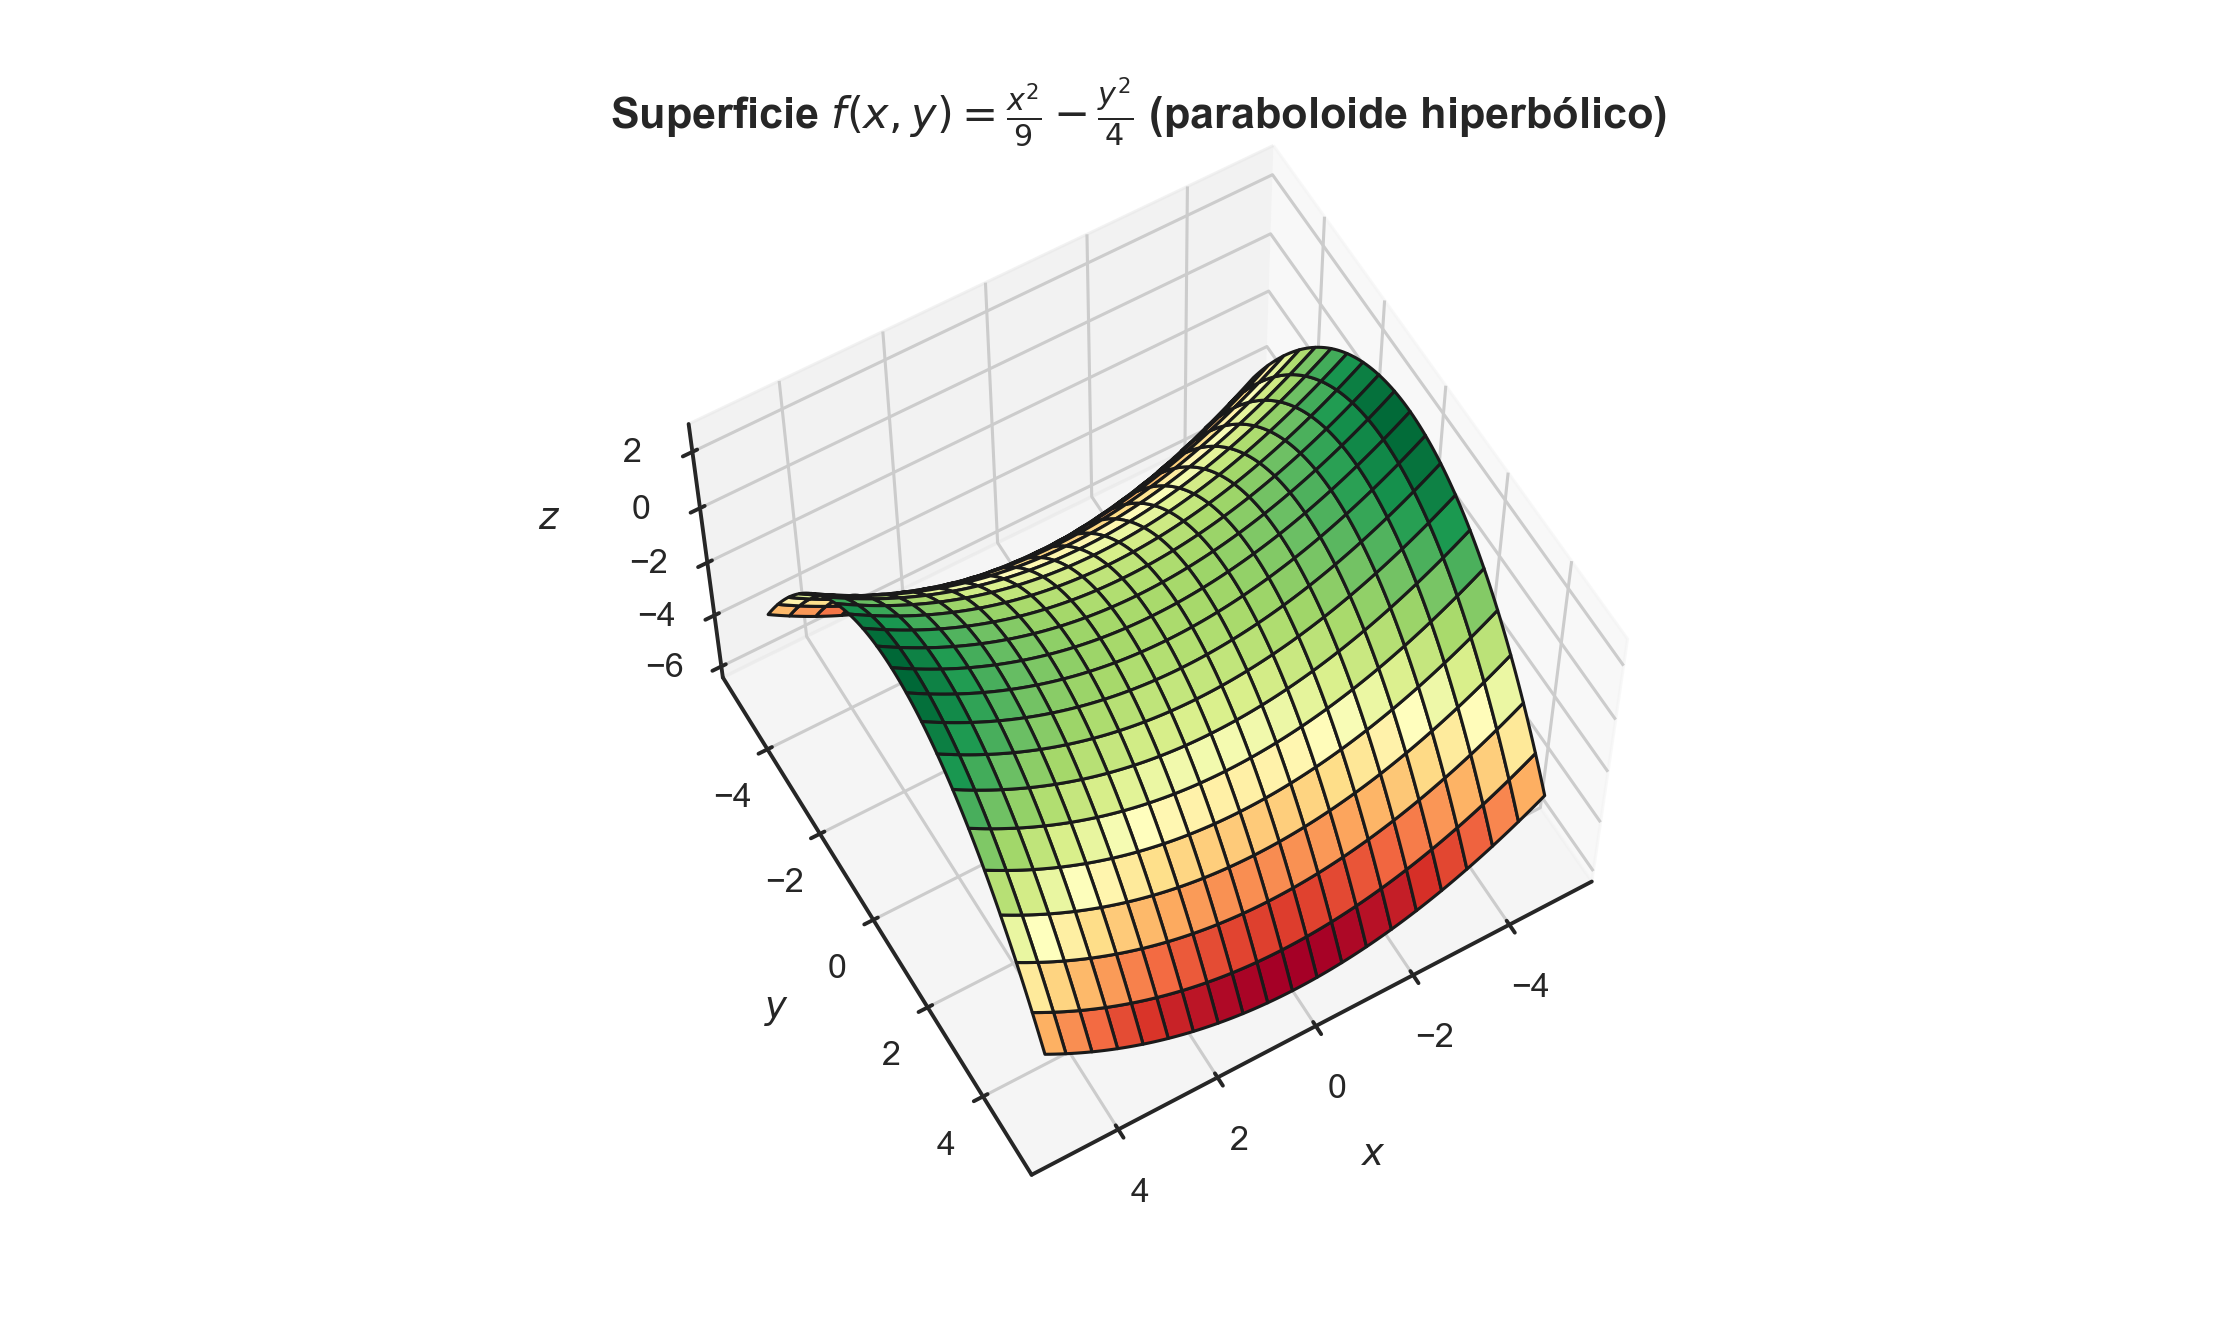

In [14]:
# Y construimos el gráfico de la superficie.
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=5, cstride=5, cmap='RdYlGn', edgecolor='k')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$", fontsize=12, labelpad=10)
ax.set_title(
    r'Superficie $f\left( x,y\right)  =\frac{x^{2}}{9} -\frac{y^{2}}{4}$ (paraboloide hiperbólico)', 
    fontsize=14, fontweight="bold", pad=10
)
ax.view_init(60, 60);

<IPython.core.display.Javascript object>


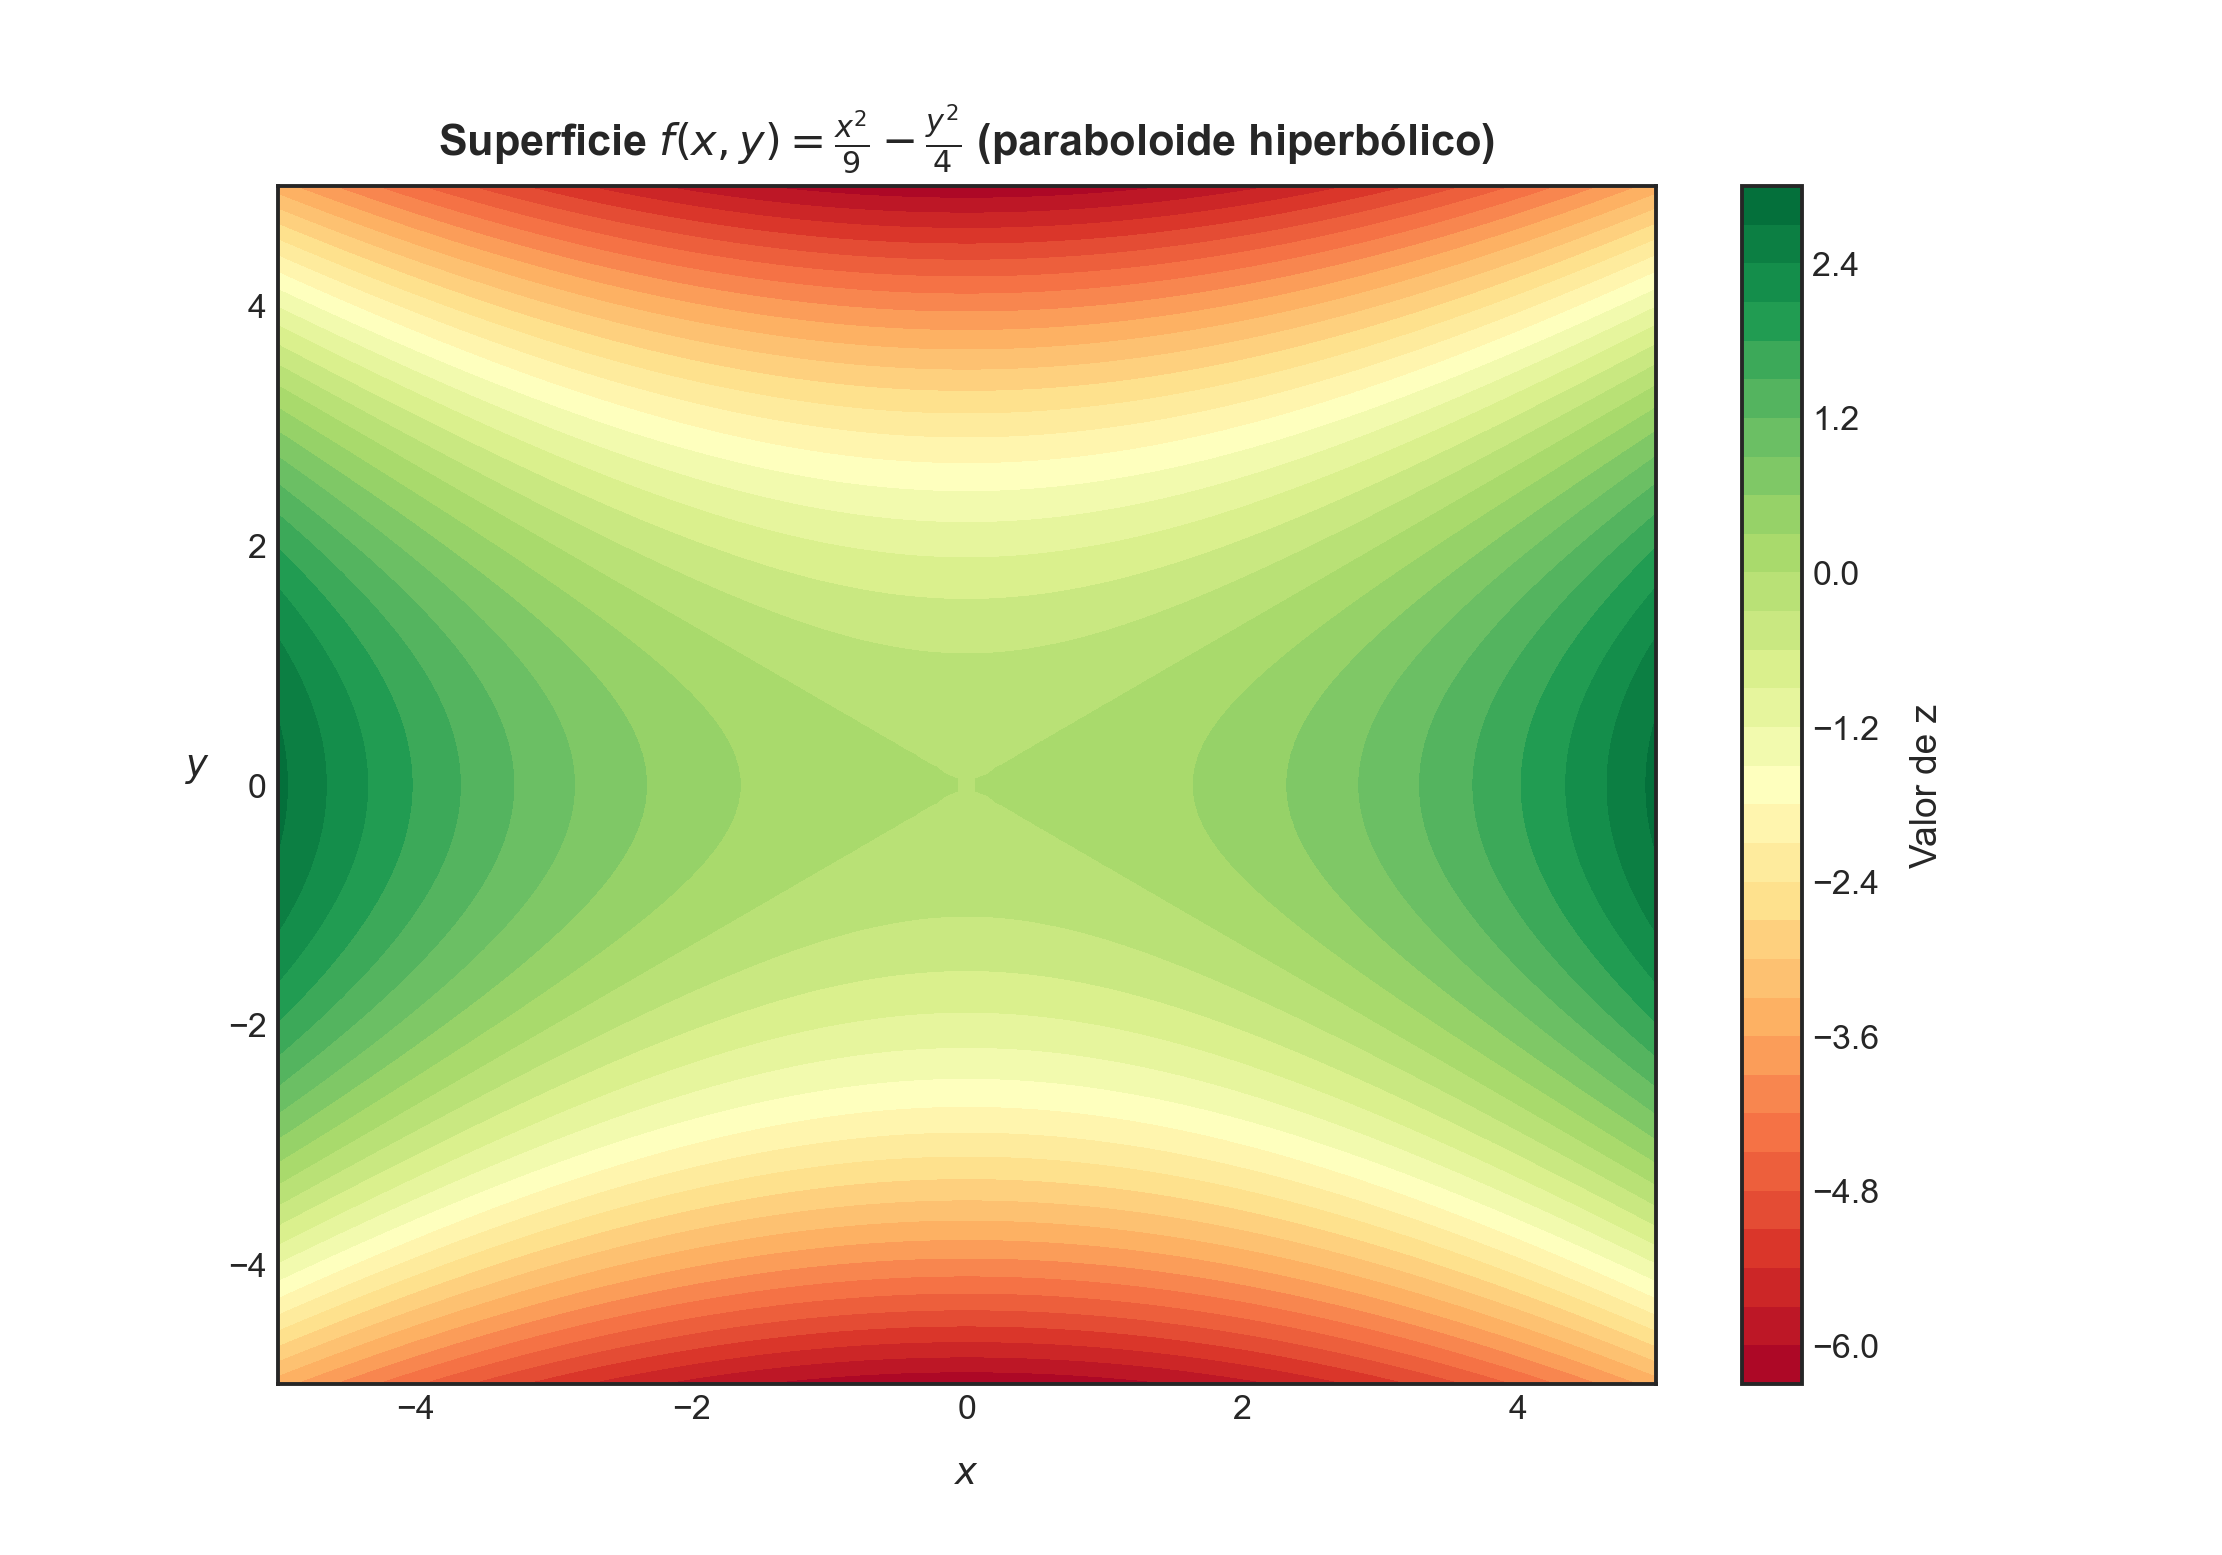

In [15]:
# Y creamos un gráfico de contorno completo para visualizar este mínimo global en 2D.
fig, ax = plt.subplots(figsize=(10, 7))
p = ax.contourf(X, Y, Z, levels=30, cmap='RdYlGn')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10, rotation=0)
ax.set_title(
    r'Superficie $f\left( x,y\right)  =\frac{x^{2}}{9} -\frac{y^{2}}{4}$ (paraboloide hiperbólico)', 
    fontsize=14, fontweight="bold", pad=10
)
cb = plt.colorbar(p)
cb.set_label("Valor de z", fontsize=12, labelpad=10);

Sea $f:U\subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$ una función definida en el conjunto abierto $U$ de $\mathbb{R}^{n}$ y sea $\mathbf{x}_{0}$ un punto interior a $U$. Admitamos que $f$ es de clase $C^{2}$ en $U$; es decir, las derivadas parciales de segundo orden $\frac{\partial^{2} f}{\partial x_{i}\partial x_{j}}$ existen y son continuas en $\mathbf{x}_{0}$ (para $i,j\in \mathbb{N}, 1\leq i\leq n, 1\leq j\leq n$). A la matriz cuadrada de orden $n$, definida como

$$\mathbf{H} \left( \mathbf{x}_{0} \right)  =\left( \frac{\partial^{2} f}{\partial x_{i}\partial x_{j}} \left( \mathbf{x}_{0} \right)  \right)_{i,j=1,2,...,n}  =\displaystyle \left( \begin{array}{ccc}\displaystyle \frac{\partial^{2} f}{\partial x^{2}_{1}} &\cdots &\displaystyle \frac{\partial^{2} f}{\partial x_{1}\partial x_{n}} \\ \vdots &\ddots &\vdots \\ \displaystyle \frac{\partial^{2} f}{\partial x_{n}\partial x_{1}} &\cdots &\displaystyle \frac{\partial^{2} f}{\partial x^{2}_{n}} \end{array} \right)$$
</p> <p style="text-align: right;">$(3.1)$</p>

se le llama **matriz Hessiana** de la función $f$ en el punto $x_{0}$. Se denota, conforme la Ec. (3.1), como $\mathbf{H} \left( \mathbf{x}_{0} \right)$.

Consideremos una matriz cuadrada arbitraria $\mathbf{A}\in \mathbb{R}^{n\times n}$. En términos explíctos, la matriz $\mathbf{A}$ puede esribirse como

$$\mathbf{A} =\left\{ a_{ij}\right\}  =\left( \begin{matrix}a_{11}&a_{12}&\cdots &a_{1n}\\ a_{21}&a_{22}&\cdots &a_{2n}\\ \vdots &\vdots &\ddots &\vdots \\ a_{n1}&a_{n2}&\cdots &a_{nn}\end{matrix} \right)$$
</p> <p style="text-align: right;">$(3.2)$</p>

Definimos las $n-1$ sub-matrices angulares de $\mathbf{A}$ como las matrices:

$$\triangle_{1} =a_{11}\  ;\  \triangle_{2} =\left( \begin{matrix}a_{11}&a_{12}\\ a_{21}&a_{22}\end{matrix} \right)  \  ;\  \triangle_{3} =\left( \begin{matrix}a_{11}&a_{12}&a_{13}\\ a_{21}&a_{22}&a_{23}\\ a_{31}&a_{32}&a_{33}\end{matrix} \right)  \  ;\  \cdots \  ;\  \triangle_{n-1} =\left( \begin{matrix}a_{11}&a_{12}&\cdots &a_{1,n-1}\\ a_{21}&a_{22}&\cdots &a_{2,n-1}\\ \vdots &\vdots &\ddots &\vdots \\ a_{n-1,1}&a_{n-1,2}&\cdots &a_{n-1,n-1}\end{matrix} \right)$$
</p> <p style="text-align: right;">$(3.3)$</p>

Diremos que la matriz $\mathbf{A}$ es definida positiva si su determinante es positivo, y si los determinantes de sus sub-matrices angulares son todos positivos. Es decir, si

$$\det \left( \triangle_{k} \right)  >0\  ;\  \forall k\leq n-1$$
</p> <p style="text-align: right;">$(3.4)$</p>

## Valores extremos de funciones.

### Caso no restringido.
Vamos a apoyarnos de los conceptos anteriores para definir un criterio directo para la determinación de valores extremos de una función en un caso de optimización no restringida. Para ello, sea $f:U\subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$ una función definida en un conjunto abierto $U$ de $\mathbb{R}^{n}$. Consideremos un punto $\mathbf{x}_{0}$ que es *candidato a solución* de un problema de optimización no restringida, ya que las derivadas parciales de $f$ evaluadas en $\mathbf{x}_{0}$ son todas nulas. Es decir,

$$\frac{\partial f}{\partial x_{i}} \left( \mathbf{x}_{0} \right)  =0\  ;\  1\leq i\leq n$$
</p> <p style="text-align: right;">$(3.5)$</p>

Al punto $\mathbf{x}_{0}$ lo llamamos *candidato a solución* porque la condición anterior es necesaria, pero no suficiente, para garantizar la existencia de un mínimo o un máximo local de $f$ en $\mathbf{x}_{0}$. Sin embargo, la matriz Hessiana nos permite formular un criterio de existencia para tales valores en virtud de su estructura. Dicho criterio puede resumirse como sigue:

- Si todas las sub-matrices angulares de la matriz Hessiana $\mathbf{H} \left( \mathbf{x}_{0} \right)$ tienen determinante positivo (es decir, la matriz Hessiana $\mathbf{H} \left( \mathbf{x}_{0} \right)$ es definida positiva), entonces la función $f$ tiene un **mínimo local** en $\mathbf{x}_{0}$.
- Si todas las sub-matrices angulares de la matriz Hessiana $\mathbf{H} \left( \mathbf{x}_{0} \right)$ tienen determinantes con signos alternados, partiendo con un signo negativo, entonces la función $f$ tiene un **máximo local** en $\mathbf{x}_{0}$.
- Si el determinante de la matriz Hessiana $\mathbf{H} \left( \mathbf{x}_{0} \right)$ es negativo, entonces $\mathbf{x}_{0}$ es un **punto de ensilladura** de $f$.
- Si el determinante de la matriz Hessiana $\mathbf{H} \left( \mathbf{x}_{0} \right)$ es nulo (es decir, la matriz Hessiana $\mathbf{H} \left( \mathbf{x}_{0} \right)$ no es invertible en $\mathbf{x}_{0}$), entonces no podemos determinar si $\mathbf{x}_{0}$ es un valor extremo (máximo o minimo) de $f$.

Luego, para un problema de optimización no restringida donde conocemos explicitamente la función objetivo $f$, su solución dependerá íntegramente de los valores en un punto $\mathbf{x}_{0}$ *candidato a solución* de las derivadas parciales de $f$, y de la matriz Hessiana $\mathbf{H} \left( \mathbf{x}_{0} \right)$ de $f$.

### Caso restringido incompleto - Multiplicadores de Lagrange.
En el contexto de los problemas de optimización, el método de los multiplicadores de Lagrange es un procedimiento para encontrar los máximos y mínimos de funciones de múltiples variables sujetas a restricciones. Este método reduce el problema restringido con $n$ variables a uno sin restricciones de $n+k$ variables, donde $k$ es igual al número de restricciones, y cuyas ecuaciones pueden ser resueltas más fácilmente. Estas nuevas variables escalares desconocidas, una para cada restricción, son llamadas **multiplicadores de Lagrange**. El método establece que los puntos donde la función tiene un extremo condicionado con $k$ restricciones, están entre los puntos estacionarios de una nueva función sin restricciones construida como una combinación lineal de la función y las funciones implicadas en las restricciones, cuyos coeficientes son los multiplicadores.

Formalmente, podemos definir este método como sigue: Sea $f:U\subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$ una función definida en un conjunto abierto $U$ de $\mathbb{R}^{n}$. Consideremos el **problema de optimización restringida incompleto**, descrito por

$$\begin{array}{ll}\min_{\mathbf{x} } &f\left( \mathbf{x} \right)  \\ \mathrm{s} .\mathrm{a} .:&h_{j}\left( \mathbf{x} \right)  =0\end{array}$$
</p> <p style="text-align: right;">$(3.6)$</p>

Para $1\leq j\leq m$, donde las $m$ ecuaciones $h_{j}(\mathbf{x})$ son las **restricciones** del problema. Definimos el **lagrangiano** $\mathcal{L}$ como

$$\mathcal{L} \left( \mathbf{x} ,\lambda_{j} \right)  =f\left( \mathbf{x} \right)  +\sum^{m}_{j=1} \lambda_{j} h_{j}\left( \mathbf{x} \right)$$
</p> <p style="text-align: right;">$(3.7)$</p>

Dado que $h_{j}(\mathbf{x})$ para todo $1\leq j\leq m$, el problema restringido (3.6) es equivalente entonces a la minimización del lagrangiano $\mathcal{L}(x,\lambda_{j})$. De esta manera, calculando las correspondientes derivadas parciales, obtenemos que los *candidatos a solución* del problema (3.6) satisfacen las siguientes ecuaciones:

$$\frac{\partial \mathcal{L} }{\partial x_{i}} \left( \mathbf{x} ,\lambda_{j} \right)  =0\Longleftrightarrow \frac{\partial f}{\partial x_{i}} =-\sum^{m}_{j=1} \lambda_{j} \frac{\partial h_{j}\left( \mathbf{x} \right)  }{\partial x_{i}} \  ;\  i=1,...,n$$
</p> <p style="text-align: right;">$(3.8)$</p>

Los valores $\lambda_{j}$ son llamados multiplicadores de Lagrange. Por lo tanto, dichos multiplicadores se determinan a partir de las ecuaciones con las restricciones y conjuntamente se obtiene un extremo para $\mathcal{L}$ que, al mismo tiempo, satisface las restricciones de nuestro problema de optimización original.

**Ejemplo 3.1: Un caso sencillo de problema no restringido:** Consideremos el paraboloide circular $z=x^{2}+y^{2}$. Como sabemos, esta función tiene un mínimo global en $\mathbf{x}=(0, 0, 0)$. Sin embargo, una posible restricción para este problema es que los puntos $(x,y,z)$ que estén sobre el paraboloide sean tales que $x+y+z=24$. Esto es, que pertenezcan a la curva resultante de la intersección del paraboloide con el plano $h(x,y)=24-x-y$. Queremos determinar, en este contexto, los puntos más cercano y alejado del plano $XY$ que pertenecen a dicha curva.

Es así que hemos definido un problema de optimización restringida, donde la situación geométrica es la siguiente:

In [16]:
# Definimos las correspondientes funciones que caracterizan el problema.
# Función objetivo.
def f(x, y):
    return x**2 + y**2

# Restricción.
def h(x, y):
    return 24 - x - y

In [17]:
# Generamos una grilla para evaluar estas funciones.
x = np.linspace(start=-5, stop=5, num=100)
y = np.linspace(start=-5, stop=5, num=100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
h = h(X, Y)

<IPython.core.display.Javascript object>


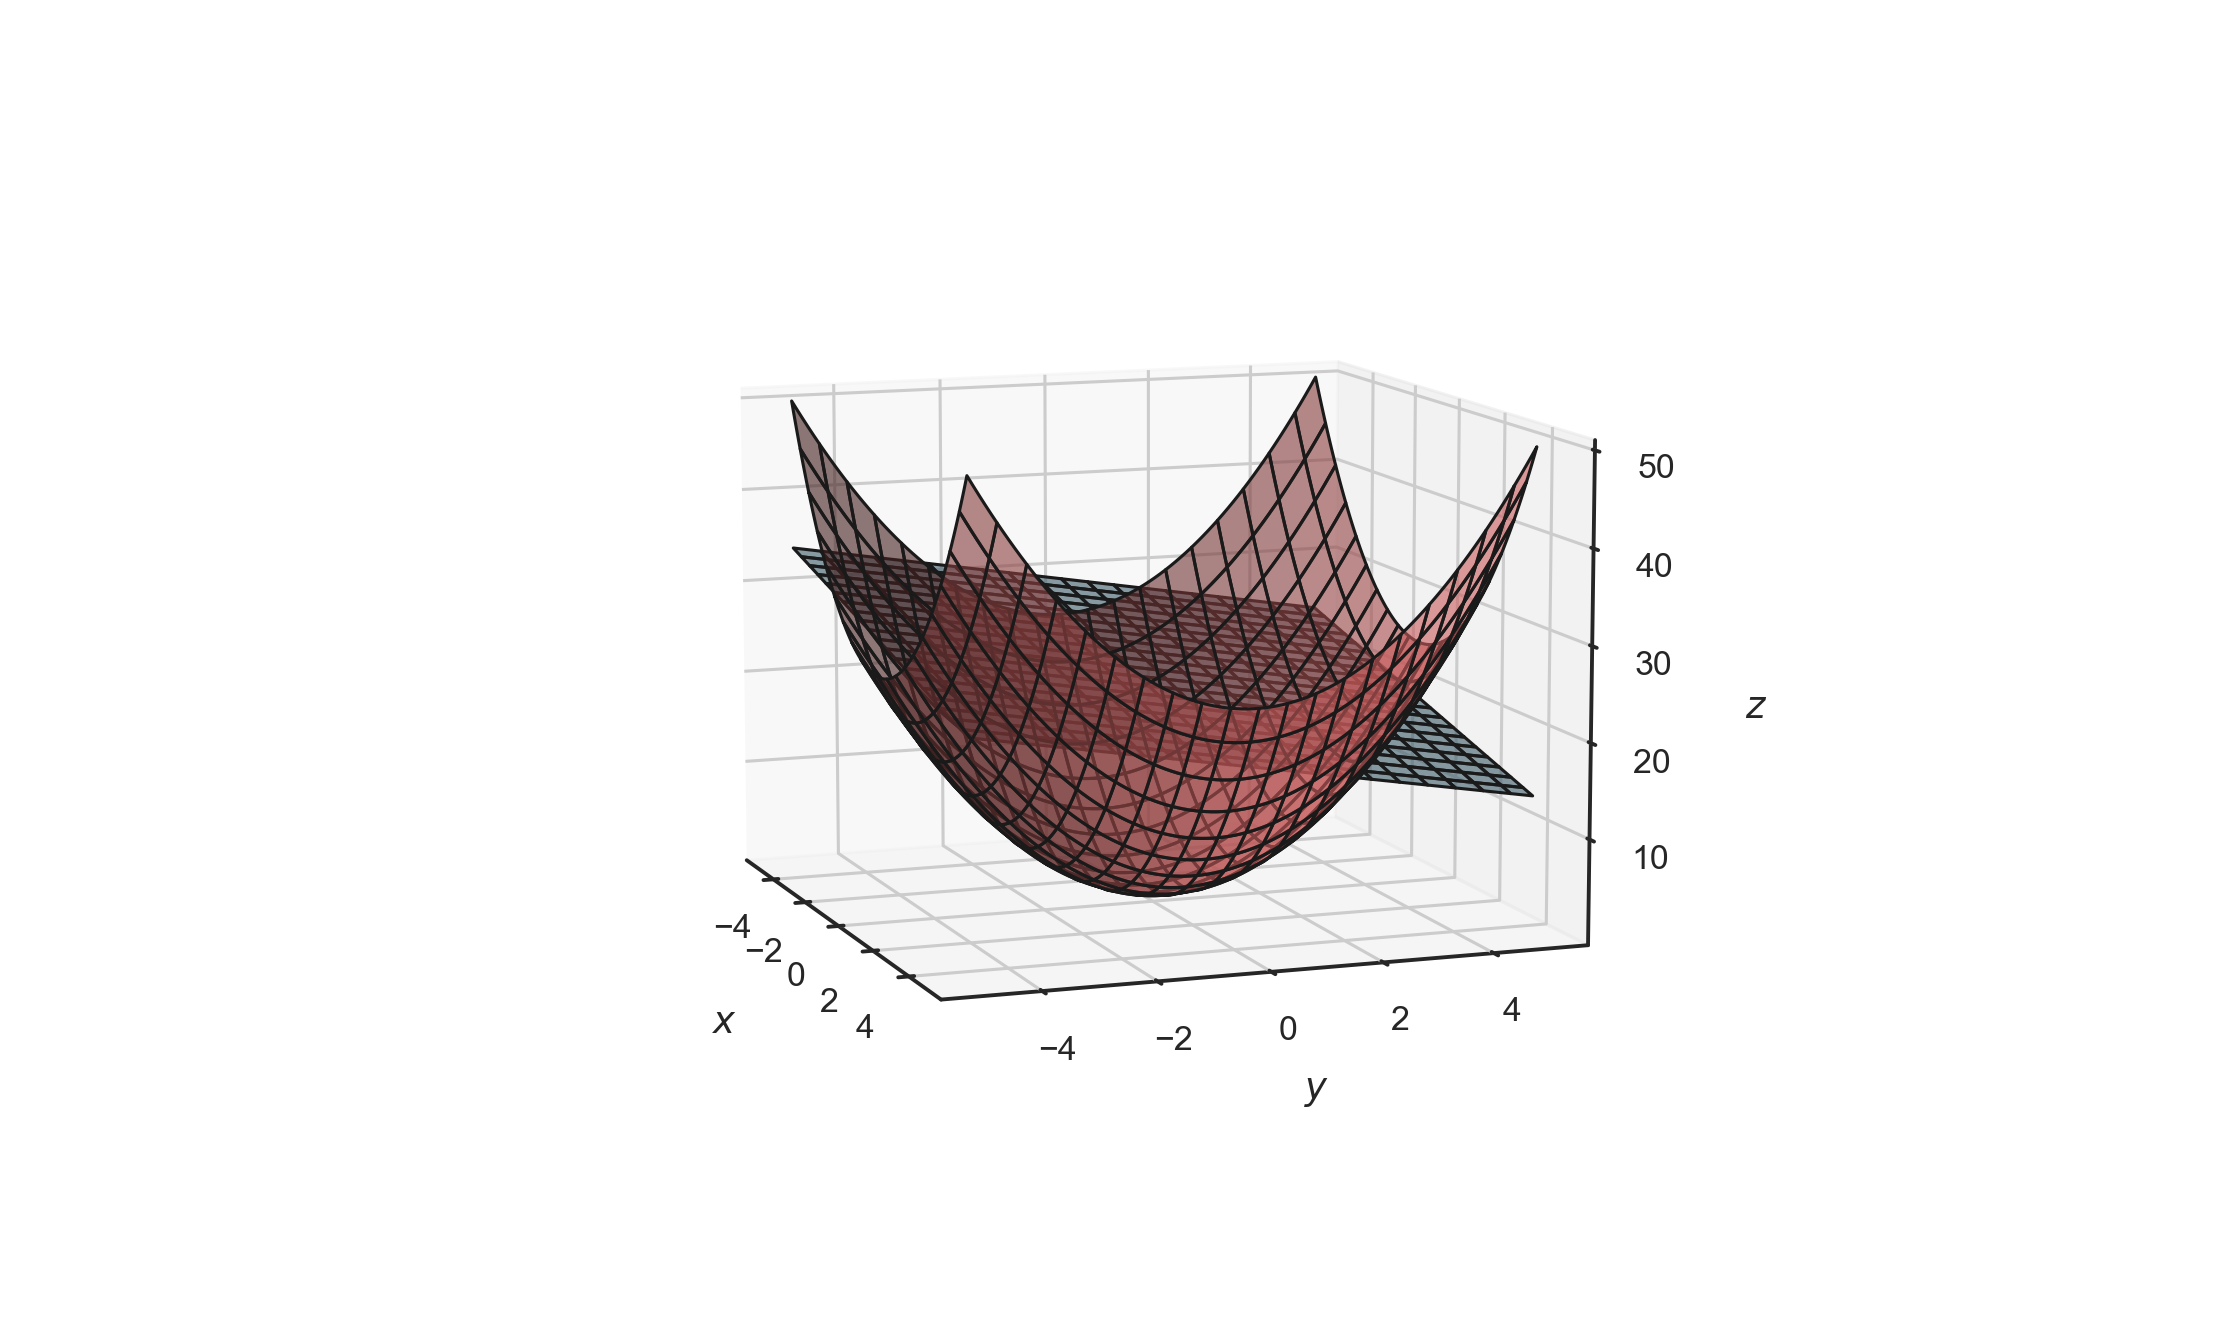

In [18]:
# Visualizamos la situación geométrica de este problema en tres dimensiones.
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=5, cstride=5, color='indianred', edgecolor='k', alpha=0.6)
ax.plot_surface(X, Y, h, rstride=5, cstride=5, color='skyblue', edgecolor='k', alpha=0.6)
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$", fontsize=12, labelpad=10)
ax.view_init(10, -20);

Debido a que la intersección entre ambas superficies ocurre en el semiespacio superior, es evidente que $z\geq 0$. La función a optimizar es un distancia vertical con respecto al plano $XY$, por lo que estamos frente a un problema con dos restricciones, que podemos escribir como

$$\begin{array}{ll}\displaystyle \min_{\left( x,y,z\right)  } &f\left( x,y,z\right)  =z\\ \mathrm{s} .\mathrm{a} .:&z=x^{2}+y^{2}\\ &x+y+z=24\end{array}$$
</p> <p style="text-align: right;">$(3.9)$</p>

Consideremos pues las funciones $h_{1}(x,y,z)=z-x^{2}-y^{2}$ y $h_{2}(x,y,z)=x+y+z-24$. Conforme la Ec. (3.7), el lagrangiano de este problema tiene la forma

$$\begin{array}{lll}\mathcal{L} \left( \mathbf{x} ,\lambda_{j} \right)  &=&f\left( x,y,z\right)  +\displaystyle \sum^{2}_{j=1} \lambda_{j} h_{j}\left( x,y,z\right)  \\ &=&z+\lambda_{1} \left( z-x^{2}-y^{2}\right)  +\lambda_{2} \left( x+y+z-24\right)  \end{array}$$
</p> <p style="text-align: right;">$(3.10)$</p>

Podemos resolver este problema fácilmente por medio de un cálculo simbólico vía **Sympy**. Definimos primeramente las variables que constituyen el problema, incluyendo por supuesto los multiplicadores de Lagrange:

In [19]:
# Definimos las variables del problema (por separado las variables reales y los multiplicadores).
x, y, z = sp.symbols("x, y, z", real=True)
lam1, lam2 = sp.symbols(r"\lambda_{1}, \lambda_{2}", real=True)

Luego construimos el lagrangiano $\mathcal{L}$ usando las variables simbólicas anteriores:

In [20]:
# Construimos el lagrangiano.
L = z + lam1*(z - x**2 - y**2) + lam2*(x + y + z - 24)

In [21]:
# Mostramos la expresión resultante en pantalla.
L

Ahora calculamos las derivadas parciales del lagrangiano con respecto a las variables $(x, y, z)$ y a los multiplicadores $(\lambda_{1}, \lambda_{2})$:

In [22]:
# Derivadas parciales del lagrangiano.
dL_dx = L.diff(x)
dL_dy = L.diff(y)
dL_dz = L.diff(z)
dL_dlam1 = L.diff(lam1)
dL_dlam2 = L.diff(lam2)

Igualando las derivadas parciales a cero llegamos a un sistema no lineal de ecuaciones que podemos resolver rápidamente como sigue:

In [23]:
# Resolvermos el sistema completo.
result = sp.solve([dL_dx, dL_dy, dL_dz, dL_dlam1, dL_dlam2], [x, y, z, lam1, lam2], dict=True)

In [24]:
# Mostramos el resultado en pantalla.
result

Por lo tanto, tenemos dos puntos críticos: $P_{1}=(3,3,18)$ y $P_{2}=(-4,-4,32)$, que corresponden a los puntos dentro de la curva resultante de la intersección del plano con el paraboloide que corresponden a las distancias mínima y máxima de dicha curva con respecto al plano $XY$. Tales distancias son $z=18$ y $z=32$. ◼

### Caso restringido general: Condiciones de Karush-Kuhn-Tucker (KKT).

#### Definición.
Sea $f:U\subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$ una función definida en un conjuntp abierto $U$ de $\mathbb{R}^{n}$. Sean además las funciones $g,h:D\subseteq U \rightarrow \mathbb{R}$ funciones definidas en un conjunto abierto $D$ tal que $D\subseteq U$. El problema

$$\begin{array}{ll}\displaystyle \min_{\mathbf{x} } &f\left( \mathbf{x} \right)  \\ \mathrm{s} .\mathrm{a} .:&g_{i}\left( \mathbf{x} \right)  \leq 0\\ &h_{j}\left( \mathbf{x} \right)  =0\end{array}$$
</p> <p style="text-align: right;">$(3.11)$</p>

donde $1\leq i\leq m$ y $1\leq j\leq p$, es llamado **problema de optimización restringido general**. La función $f$ es la función objetivo del problema, el conjunto $g_{i}(\mathbf{x})\leq 0$ constituye sus restricciones de desigualdad, y el conjunto $h_{j}(\mathbf{x})=0$ constituye sus restricciones de igualdad. Asumimos, sin pérdida de generalidad, que $U$ (y, por extensión, $D$) es un conjunto convexo de $\mathbb{R}^{n}$ (es decir, es tal que, para todo par de puntos $P_{1}$ y $P_{2}$ de $U$, el segumento que une ambos puntos está siempre contenido en $U$). Es posible, de la misma forma que para el caso restringido incompleto, construir un lagrangiano para el problema (3.11), definido como

$$\begin{array}{llll}&\mathcal{L} \left( \mathbf{x} ,\mathbf{\mu } ,\mathbf{\lambda } \right)  &=&f\left( \mathbf{x} \right)  +\overbrace{\mathbf{\mu }^{\top } \mathbf{g} \left( \mathbf{x} \right)  +\mathbf{\lambda }^{\top } \mathbf{h} \left( \mathbf{x} \right)  }^{\mathbf{\alpha } =\left( \mathbf{\mu }^{\top } ,\mathbf{\lambda }^{\top } \right)  } \\ \Longrightarrow &\mathcal{L} \left( \mathbf{x} ,\mathbf{\alpha } \right)  &=&f\left( \mathbf{x} \right)  +\mathbf{\alpha }^{\top } \left( \begin{array}{l}\mathbf{g} \left( \mathbf{x} \right)  \\ \mathbf{h} \left( \mathbf{x} \right)  \end{array} \right)  \end{array}$$
</p> <p style="text-align: right;">$(3.12)$</p>

donde $\mathbf{g}(\mathbf{x})$ y $\mathbf{h}(\mathbf{x})$ son campos vectoriales definidos como $\mathbf{g}(\mathbf{x})=\left( g_{1}\left( \mathbf{x} \right)  ,...,g_{m}\left( \mathbf{x} \right)  \right)^{\top }$ y $\mathbf{h} \left( \mathbf{x} \right)  =\left( h_{1}\left( \mathbf{x} \right)  ,...,h_{p}\left( \mathbf{x} \right)  \right)^{\top }$.

#### Problema dual.
El valor mínimo del lagrangiano, a saber, $\mathcal{G}(\mathbf{\mu}, \mathbf{\lambda})=\min_{\mathbf{x} } \mathcal{L} \left( \mathbf{x} ,\mathbf{\mu } ,\mathbf{\lambda } \right)$, se denomina función lagrangiana dual asociada al problema (3.12). Los valores reunidos en los vectores $\mathbf{\mu}$ y $\mathbf{\lambda}$ son llamados **multiplicadores de Karush-Kuhn-Tucker** (o multiplicadores KKT). Es posible siempre definir un problema de optimización de sentido inverso al representado en (3.12), llamado **problema dual** asociado al problema original, definido como

$$\begin{array}{rl}\displaystyle \min_{\mathbf{\mu } ,\mathbf{\lambda } } &\mathcal{G} \left( \mathbf{\mu } ,\mathbf{\lambda } \right)  \\ \mathrm{s} .\mathrm{a} .:&\mu_{i} \geq 0\  ;\  1\leq i\leq m\end{array}$$
</p> <p style="text-align: right;">$(3.13)$</p>

El problema dual tiene las siguientes importantes propiedades:

* El problema dual siempre es convexo (incluso si el problema original, llamado **problema primal**, no lo es).
* Los valores óptimos de las funciones objetivo primal ($f^{\star}$) y dual ($\mathcal{G}^{\star}$) siempre verifican la **condición débil de dualidad**: $f^{\star}\geq \mathcal{G}^{\star}$.
* **Condición de Slater:** Para un problema primal de tipo convexo, si existe un valor $\mathbf{x}_{0}\in D$ tal que $g_{i}(\mathbf{x}_{0})<0$ para todo $i=1,...,m$, y $h_{j}(\mathbf{x}_{0})=0$ para todo $j=1,...,p$, entonces se cumple la **condición fuerte de dualidad**: $f^{\star}=\mathcal{G}^{\star}$.

Para toda solución primal factible $\mathbf{x}_{0}$, y para todo par de soluciones duales factibles $\mathbf{\mu}_{0}$ y $\mathbf{\lambda}_{0}$, la diferencia $f(\mathbf{x}_{0})-\mathcal{G}(\mathbf{\mu}_{0},\mathbf{\lambda}_{0})$ es llamada **brecha de dualidad** entre $\mathbf{x}_{0}$ y el par $(\mathbf{\mu}_{0},\mathbf{\lambda}_{0})$. La brecha de dualidad es una cantidad que permite redefinir la condición de Slater como sigue: Si la brecha de dualidad del problema (3.12) es cero, entonces se cumple la condición fuerte de dualidad: $f^{\star}=\mathcal{G}^{\star}$.

#### Condiciones de Karush-Kuhn-Tucker (KKT).
Dado el problema primal (3.12), definimos las **condiciones necesarias de Karush-Kuhn-Tucker** (o condiciones KKT) como un conjunto de relaciones que permiten definir los candidatos a solución de dicho problema. Estas condiciones pueden también ser suficientes si se cumplen ciertas restricciones asociadas al problema.

Las condiciones KKT se listan a continuación para un candidato a solución $\mathbf{x}_{0}\in U$:

* $\displaystyle \nabla f\left( \mathbf{x}_{0} \right)  +\sum^{m}_{i=1} \mu_{i} \nabla g_{i}\left( \mathbf{x}_{0} \right)  +\sum^{p}_{j=1} \lambda_{j} \nabla h_{j}\left( \mathbf{x}_{0} \right)  \ni 0$ (estacionariedad).
* $\mu_{i}g_{i}(\mathbf{x}_{0})$ para todo $i=1,...,m$ (holguras complementarias).
* $g_{i}\left( \mathbf{x}_{0} \right)  \leq 0,h_{j}\left( \mathbf{x}_{0} \right)  =0\  ;\  \forall i=1,...,m\wedge j=1,...,p$ (factibilidad primal).
* $\mu_{i}\geq 0$ para todo $i=1,...,m$ (factibilidad dual).

Sean $\mathbf{x}^{\star}$ y $(\mathbf{\mu}^{\star}, \mathbf{\lambda}^{\star})$ soluciones óptimas para los problemas primal y dual, respectivamente, con brecha de dualidad igual a cero (es decir, se cumple la condición fuerte de dualidad, por ejemplo, bajo la condición de Slater). Siendo así, es posible demostrar que

$$\begin{array}{lll}f\left( \mathbf{x}^{\star } \right)  &=&\mathcal{G} \left( \mathbf{\mu }^{\star } ,\mathbf{\lambda }^{\star } \right)  \\ &=&\min_{\mathbf{x} } \left[ f\left( \mathbf{x} \right)  +\left( \mathbf{\mu }^{\star } \right)^{\top }  \mathbf{g} \left( \mathbf{x} \right)  +\left( \mathbf{\lambda }^{\star } \right)^{\top }  \mathbf{h} \left( \mathbf{x} \right)  \right]  \\ &\leq &f\left( \mathbf{x}^{\star } \right)  +\left( \mathbf{\mu }^{\star } \right)^{\top }  \mathbf{g} \left( \mathbf{x}^{\star } \right)  +\left( \mathbf{\lambda }^{\star } \right)^{\top }  \mathbf{h} \left( \mathbf{x}^{\star } \right)  \\ &\leq &f\left( \mathbf{x}^{\star } \right)  \end{array}$$
</p> <p style="text-align: right;">$(3.14)$</p>

En otras palabras, todas estas desigualdades son, de hecho, igualdades. Al respecto, se tienen dos consecuencias importantes:

- El punto $\mathbf{x}^{\star}$ minimiza el valor del lagrangiano $\mathcal{L}(\mathbf{x},\mathbf{\mu}^{\star},\mathbf{\lambda}^{\star})$ sobre $U$. Por lo tanto, el gradiente de $\mathcal{L}(\mathbf{x},\mathbf{\mu}^{\star},\mathbf{\lambda}^{\star})$ debe anularse en $\mathbf{x}=\mathbf{x}^\star$. Esta es, de hecho, la condición KKT de estacionariedad.
- Debemos tener que $\left( \mathbf{\mu }^{\star } \right)^{\top }  \mathbf{g} \left( \mathbf{x} \right)=0$ y, dado que cada término en la suma resultante es negativo, esto implica que $\mu^{\star }_{i} g_{i}\left( \mathbf{x}^{\star } \right)  =0$ para cada $i=1,...,m$. Esta es, de hecho, la condición KKT de holguras complementarias.

Las condiciones KKT de factibilidad primal y dual, por supuesto, se cumplen. Por lo tanto, hemos mostrado que, si $\mathbf{x}^{\star}$ y $(\mathbf{\mu}^{\star},\mathbf{\lambda}^{\star})$ son las soluciones del problema primal y dual, respectivamente, con brecha de dualidad nula, entonces $\mathbf{x}^{\star}$ y $(\mathbf{\mu}^{\star},\mathbf{\lambda}^{\star})$ cumplen con las condiciones KKT. Naturalmente, esto es válido si y sólo si $U$ y $D$ son conjuntos convexos.

#### Suficiencia.
Si existen $\mathbf{x}^{\star}$ y $(\mathbf{\mu}^{\star},\mathbf{\lambda}^{\star})$ que satisfacen las condiciones KKT, entonces se tiene que

$$\begin{array}{lll}g\left( \mathbf{\mu }^{\star } ,\mathbf{\lambda }^{\star } \right)  &=&f\left( \mathbf{x}^{\star } \right)  +\left( \mathbf{\mu }^{\star } \right)^{\top }  \mathbf{g} \left( \mathbf{x}^{\star } \right)  +\left( \mathbf{\lambda }^{\star } \right)^{\top }  \mathbf{h} \left( \mathbf{x}^{\star } \right)  \\ &=&f\left( \mathbf{x}^{\star } \right)  \end{array}$$
</p> <p style="text-align: right;">$(3.15)$</p>

donde la primera igualdad es debida a la condición KKT de estacionariedad, y la segunda, a la condición KKT de holguras complementarias.

Por lo tanto, la brecha de dualidad es cero (y $\mathbf{x}^{\star}$ y $(\mathbf{\mu}^{\star},\mathbf{\lambda}^{\star})$ son soluciones factibles para el problema primal y dual, respectivamente). Así, $\mathbf{x}^{\star}$ y $(\mathbf{\mu}^{\star},\mathbf{\lambda}^{\star})$ son soluciones óptimas de ambos problemas, respectivamente. 

Hemos mostrado pues que, si $\mathbf{x}^{\star}$ y $(\mathbf{\mu}^{\star},\mathbf{\lambda}^{\star})$ satisfacen las condiciones KKT, entonces son soluciones óptimas de los problemas primal y dual, respectivamente.

En resumen, las condiciones de Karush-Kuhn-Tucker, en términos de la optimalidad de un *candidato* a solución:

- Son suficientes siempre.
- Son necesarias bajo la condición fuerte de dualidad.

No ahondaremos mucho más en los fundamentos teóricos de los problemas de optimización restringida de carácter general. Sin embargo, es evidente, de las condiciones KKT y de suficiencia para los candidatos a solución de un problema como (3.11), que, en general, es difícil que un problema de este tipo sea factible de tener una solución algebraicamente cerrada. Por lo tanto, nos enfocaremos de ahora en adelante en métodos computacionales que nos permitirán resolver cualquier problema de optimización de manera numérica. Incluso aunque no conozcamos explícitamente una función objetivo (es decir, no dispongamos de una fórmula para la misma), ni mucho menos sus derivadas.

## Implementación en `scipy.optimize`.

### Problemas no restringidos.
Como vimos previamente, un problema de optimización no restringida corresponde a uno tal que tiene como objetivo determinar la mejor solución a partir de todas las posibles soluciones factibles para dicho problema. Típicamente, cuando no existen restricciones que las variables deban cumplir, y tales variables son continuas y diferenciales en el dominio de definición, un problema de optimización puede escribirse en su forma estándar como un problema de minimización de una función del tipo $f:U\subseteq \mathbb{R}^{n} \longrightarrow \mathbb{R}$, donde $U$ es un conjunto abierto de $\mathbb{R}^{n}$. Notemos que siempre podremos convertir un problema de maximización a uno de minimización considerando la relación $\min(f(\mathbf{x}))=-\max(f(\mathbf{x}))$.

Vamos a estudiar algunos métodos de optimización provistos fundamentalmente por la librería **Scipy** en su módulo dedicado a la optimización, llamado `scipy.optimize`. En este módulo dispondremos de funciones dedicadas a la resolución de problemas de optimización de todo tipo, por medio de algoritmos muy diversos. Tales algoritmos requerirán siempre una cantidad determinada de información. Por lo tanto, la elección de uno u otro dependerá, por supuesto, de nuestro conocimiento del problema que deseamos resolver. En algunos casos, dispondremos de una función objetivo $f$ explícitamente definida y continua sobre un conjunto abierto (en general, convexo) $U$ de $\mathbb{R}^{n}$. Y, por lo tanto, podremos disponer de sus derivadas parciales en $U$. Sin embargo, en general, no dispondremos de una expresión explícita para $f$, lo que nos impedirá calcular sus derivadas, y en cuyo caso tendremos que hacer uso de algoritmos más generales que veremos más adelante.

Debido a que, en esta primera parte, nos abocaremos a resolver problemas no restringidos, haremos uso de una función objetivo bien conocida en el campo de la optimización matemática, conocida como **función de Rosenbrock**, y que es posible definirla en todo $\mathbb{R}^{n}$ como

$$f\left( \mathbf{x} \right)  =\sum^{n-1}_{i=1} 100\left( x_{i+1}-x^{2}_{i}\right)^{2}  +\left( 1-x_{i}\right)^{2}$$
</p> <p style="text-align: right;">$(3.16)$</p>

La función de Rosenbrock así definida es convexa y de clase $C^{\infty}$ en todo $\mathbb{R}^{n}$, y es típicamente utilizada para evaluar la precisión y rendimiento de muchos algoritmos de optimización numérica en términos computacionales. Su valor mínimo es $\mathbf{x}=\mathbf{0}$, y se obtiene en $x_{i}=1$ para todo $i=1,...,n$. Esta función es tan utilizada en el benchmarking de algoritmos de optimización que, incluso, viene precargada en muchísimas librerías dedicadas a la optimización en Python (y otros frameworks). Sin embargo, a fin de ejemplificar casos de uso, la definiremos nosotros mismos de forma manual. Para el caso del módulo `scipy.optimize`, toda función objetivo debe estar definida en Python de tal forma que su único argumento sea un arreglo unidimensional. Esto es porque **Scipy** siempre evalúa una observación a la vez:

In [25]:
# Definimos la función de Rosenbrock.
def rosen(x):
    return np.sum(100.0*(x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

Para tener una idea visual del recorrido de esta función, podemos graficarla para $n=2$. En este caso, la función de Rosenbrock toma la forma $f(x,y)=100(y-x^{2})^{2}+(1-x)^{2}$. De esta manera, definiremos primeramente una grilla de evaluación para dicha función por medio de areglos de **Numpy**:

In [26]:
# Definimos la grilla completa.
x = np.linspace(start=-2, stop=2, num=100)
y = np.linspace(start=-1, stop=3, num=100)
X, Y = np.meshgrid(x, y)

In [27]:
# Obtenemos los valores de la función de Rosenbrock en la grilla.
Z = 100 * (Y - X**2)**2 + (1 - X)**2

<IPython.core.display.Javascript object>


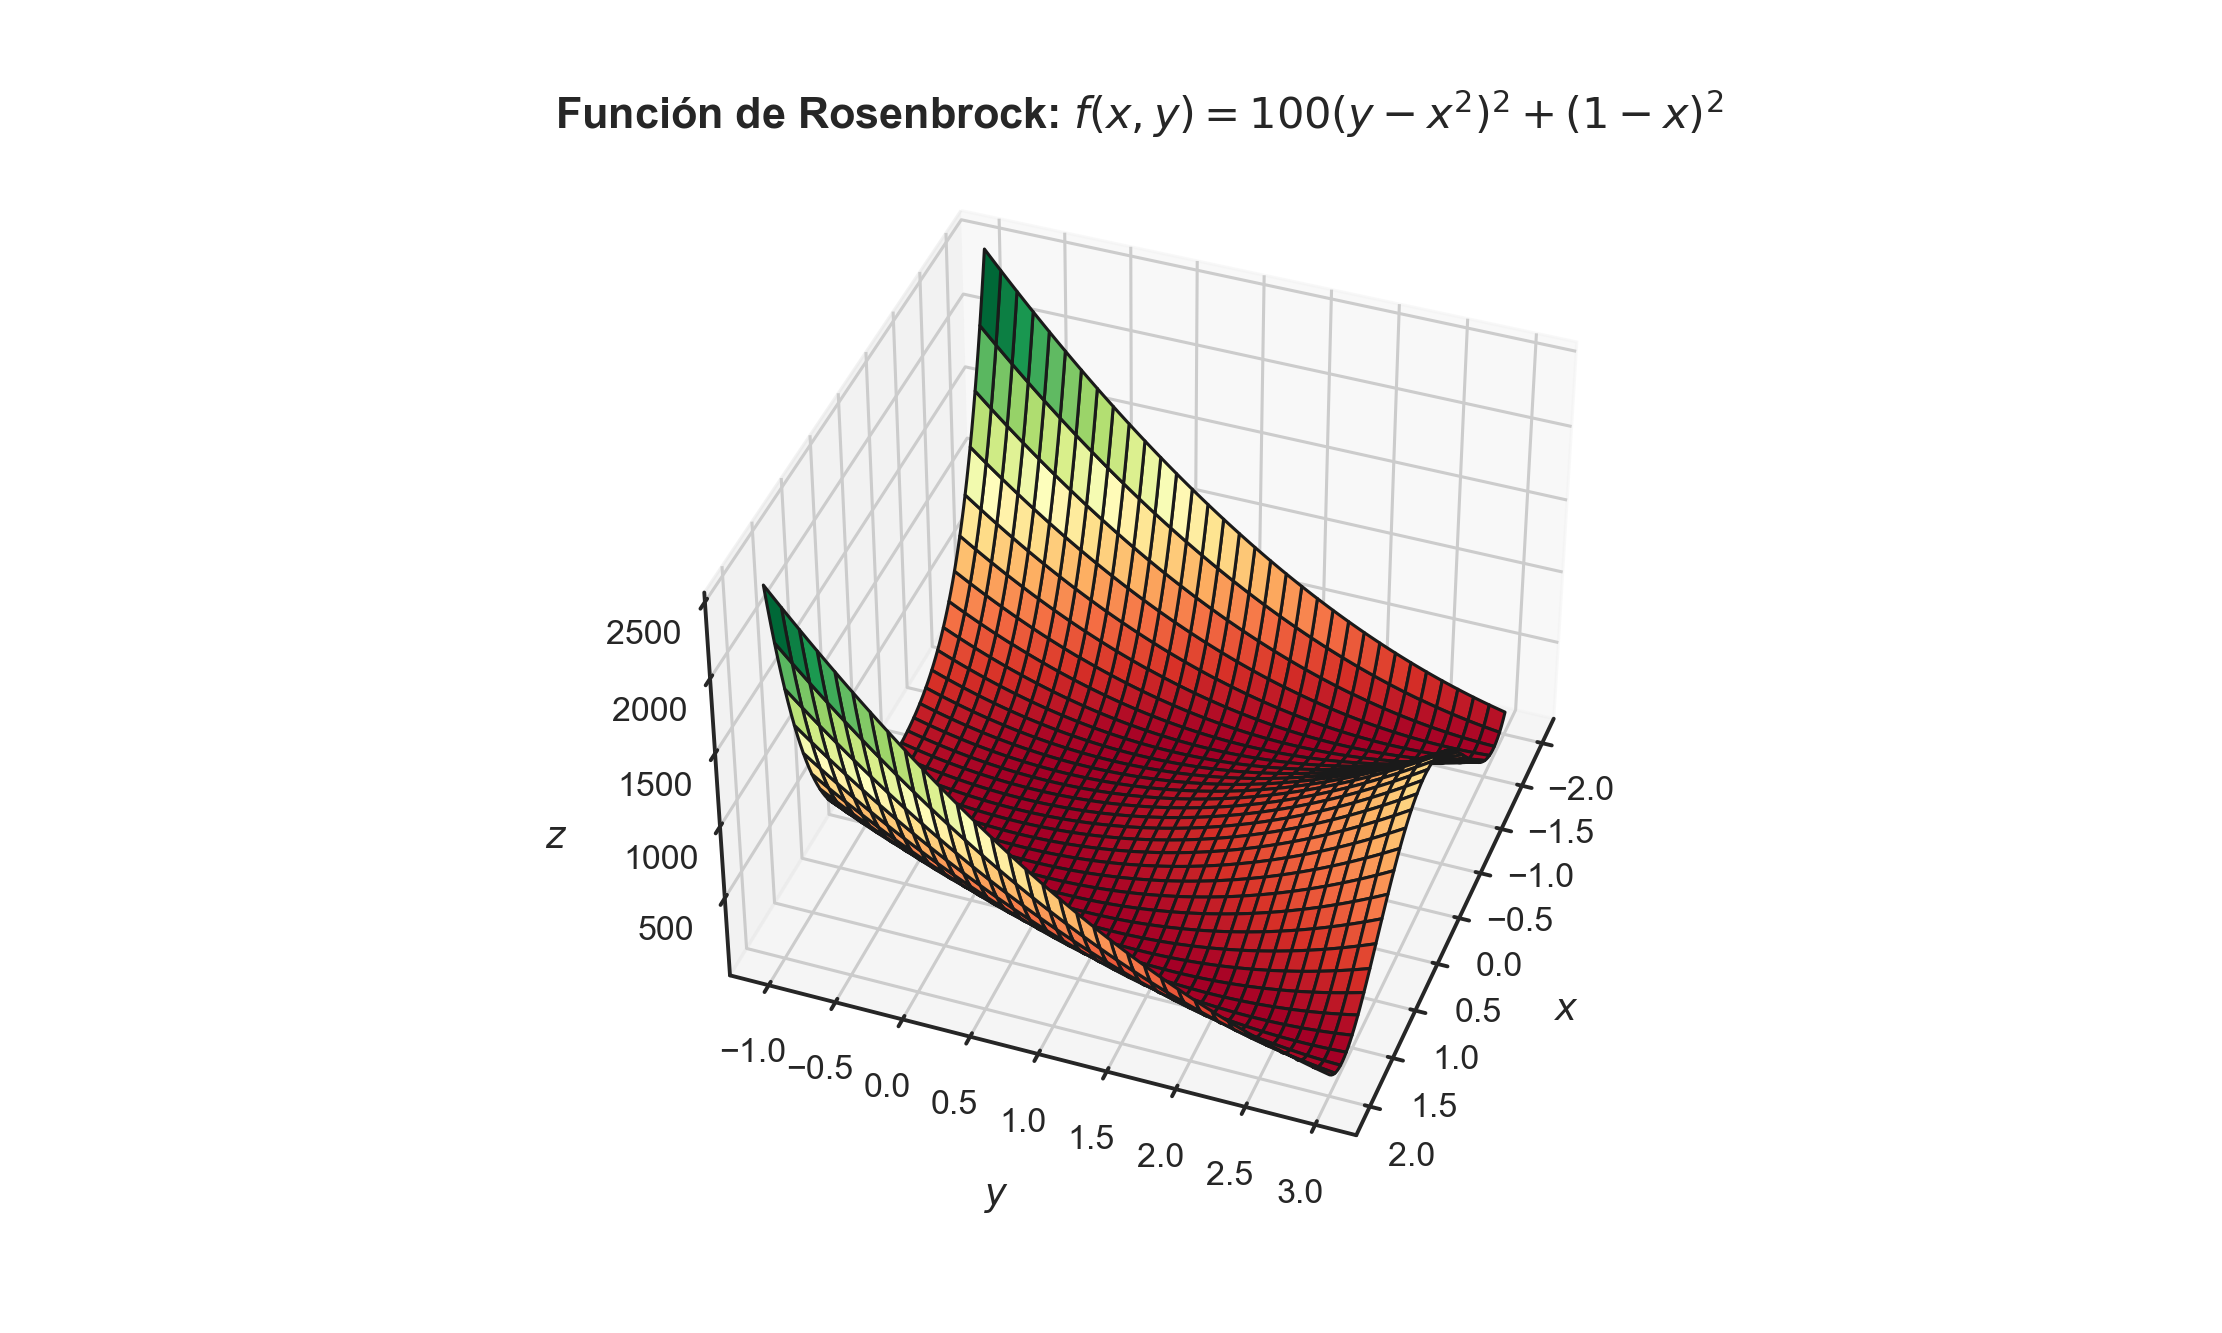

In [28]:
# Graficamos la superficie resultante de esta función.
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, cmap='RdYlGn', edgecolor='k')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$", fontsize=12, labelpad=10)
ax.set_title(
    r'Función de Rosenbrock: $f(x,y)=100(y-x^{2})^{2}+(1-x)^{2}$', 
    fontsize=14, fontweight="bold", pad=10
)
ax.view_init(40, 20);

<IPython.core.display.Javascript object>


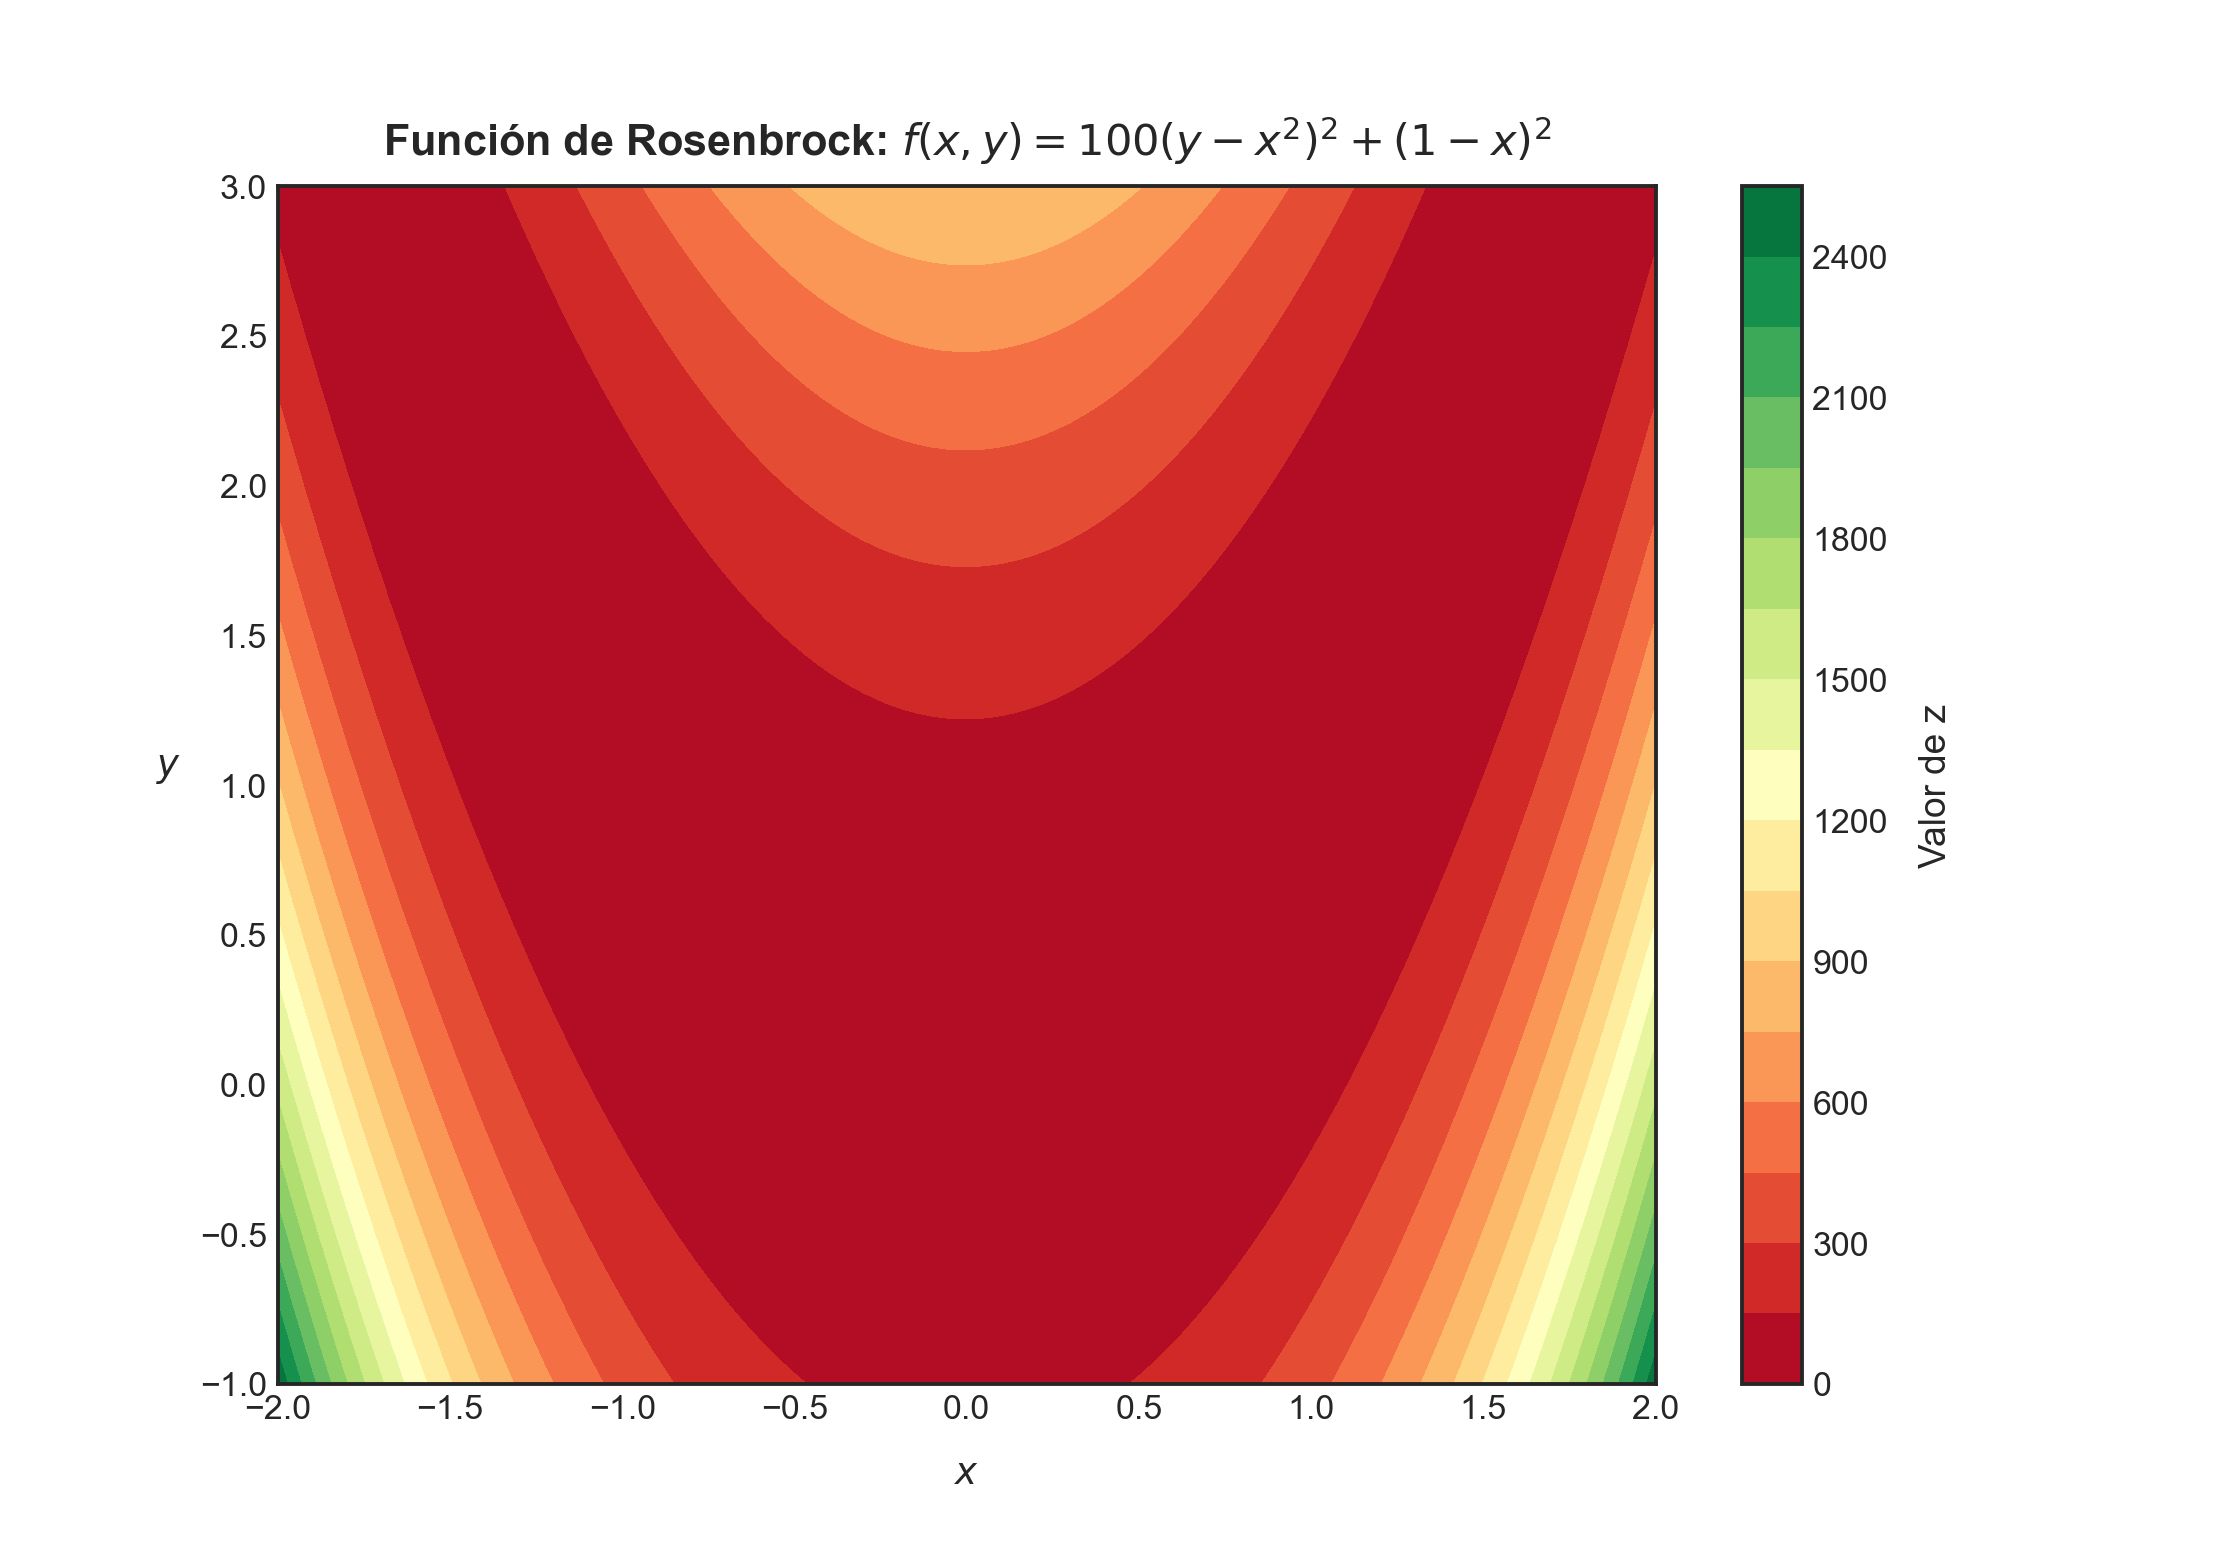

In [29]:
# Y creamos un gráfico de contorno completo para visualizar este mínimo global en 2D.
fig, ax = plt.subplots(figsize=(10, 7))
p = ax.contourf(X, Y, Z, levels=20, cmap='RdYlGn')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10, rotation=0)
ax.set_title(
    r'Función de Rosenbrock: $f(x,y)=100(y-x^{2})^{2}+(1-x)^{2}$', 
    fontsize=14, fontweight="bold", pad=10
)
cb = plt.colorbar(p)
cb.set_label("Valor de z", fontsize=12, labelpad=10);

Otra función muy utilizada en el benchmark de algoritmos de optimización, y sin duda mucho más exigente, corresponde a la función de Rastrigin, que puede definirse como

$$f\left( \mathbf{x} \right)  =10n + \displaystyle \sum^{n}_{i=1} \left[ x^{2}_{i}-10\cos \left( 2\pi x_{i}\right)  \right]  $$
</p> <p style="text-align: right;">$(3.17)$</p>

De la misma forma que en el caso de la función de Rosenbrock, definiremos manualmente esta función para hacer evaluaciones de arreglos unidimensionales como sigue:

In [30]:
# Definimos la función de Rastrigin.
def rastrigin(x):
    return 10*x.shape[0] + np.sum(x**2 - 10*np.cos(2*x*np.pi))

Notemos que para $n=2$, la función de Rastrigin toma la forma $f\left( x,y\right)  =20+x^{2}+y^{2}-10\left( \cos \left( 2\pi x\right)  +\cos \left( 2\pi y\right)  \right)$. Se trata de una función no convexa y de tipo multimodal; es decir, con una cantidad enorme de extremos locales que dificultan los procedimientos de búsqueda de algoritmos de optimización de baja complejidad que, efectivamente, buscan valores óptimos en entornos locales. Si graficamos la función de Rastrigin en un entorno de $\mathbb{R}^{2}$, observaremos inmediatamente porqué dicha función se ha ganado a pulso el apodo de *la caja de huevos*:

In [31]:
# Definimos una grilla de búsqueda.
x = np.linspace(start=-5.14, stop=5.14, num=100)
y = np.linspace(start=-5.14, stop=5.14, num=100)
X, Y = np.meshgrid(x, y)

In [32]:
# Calculamos los valores de la función de Rastrigin sobre la grilla.
Z = 20 + X**2 + Y**2 - 10*(np.cos(2*np.pi*X) + np.cos(2*np.pi*Y))

<IPython.core.display.Javascript object>


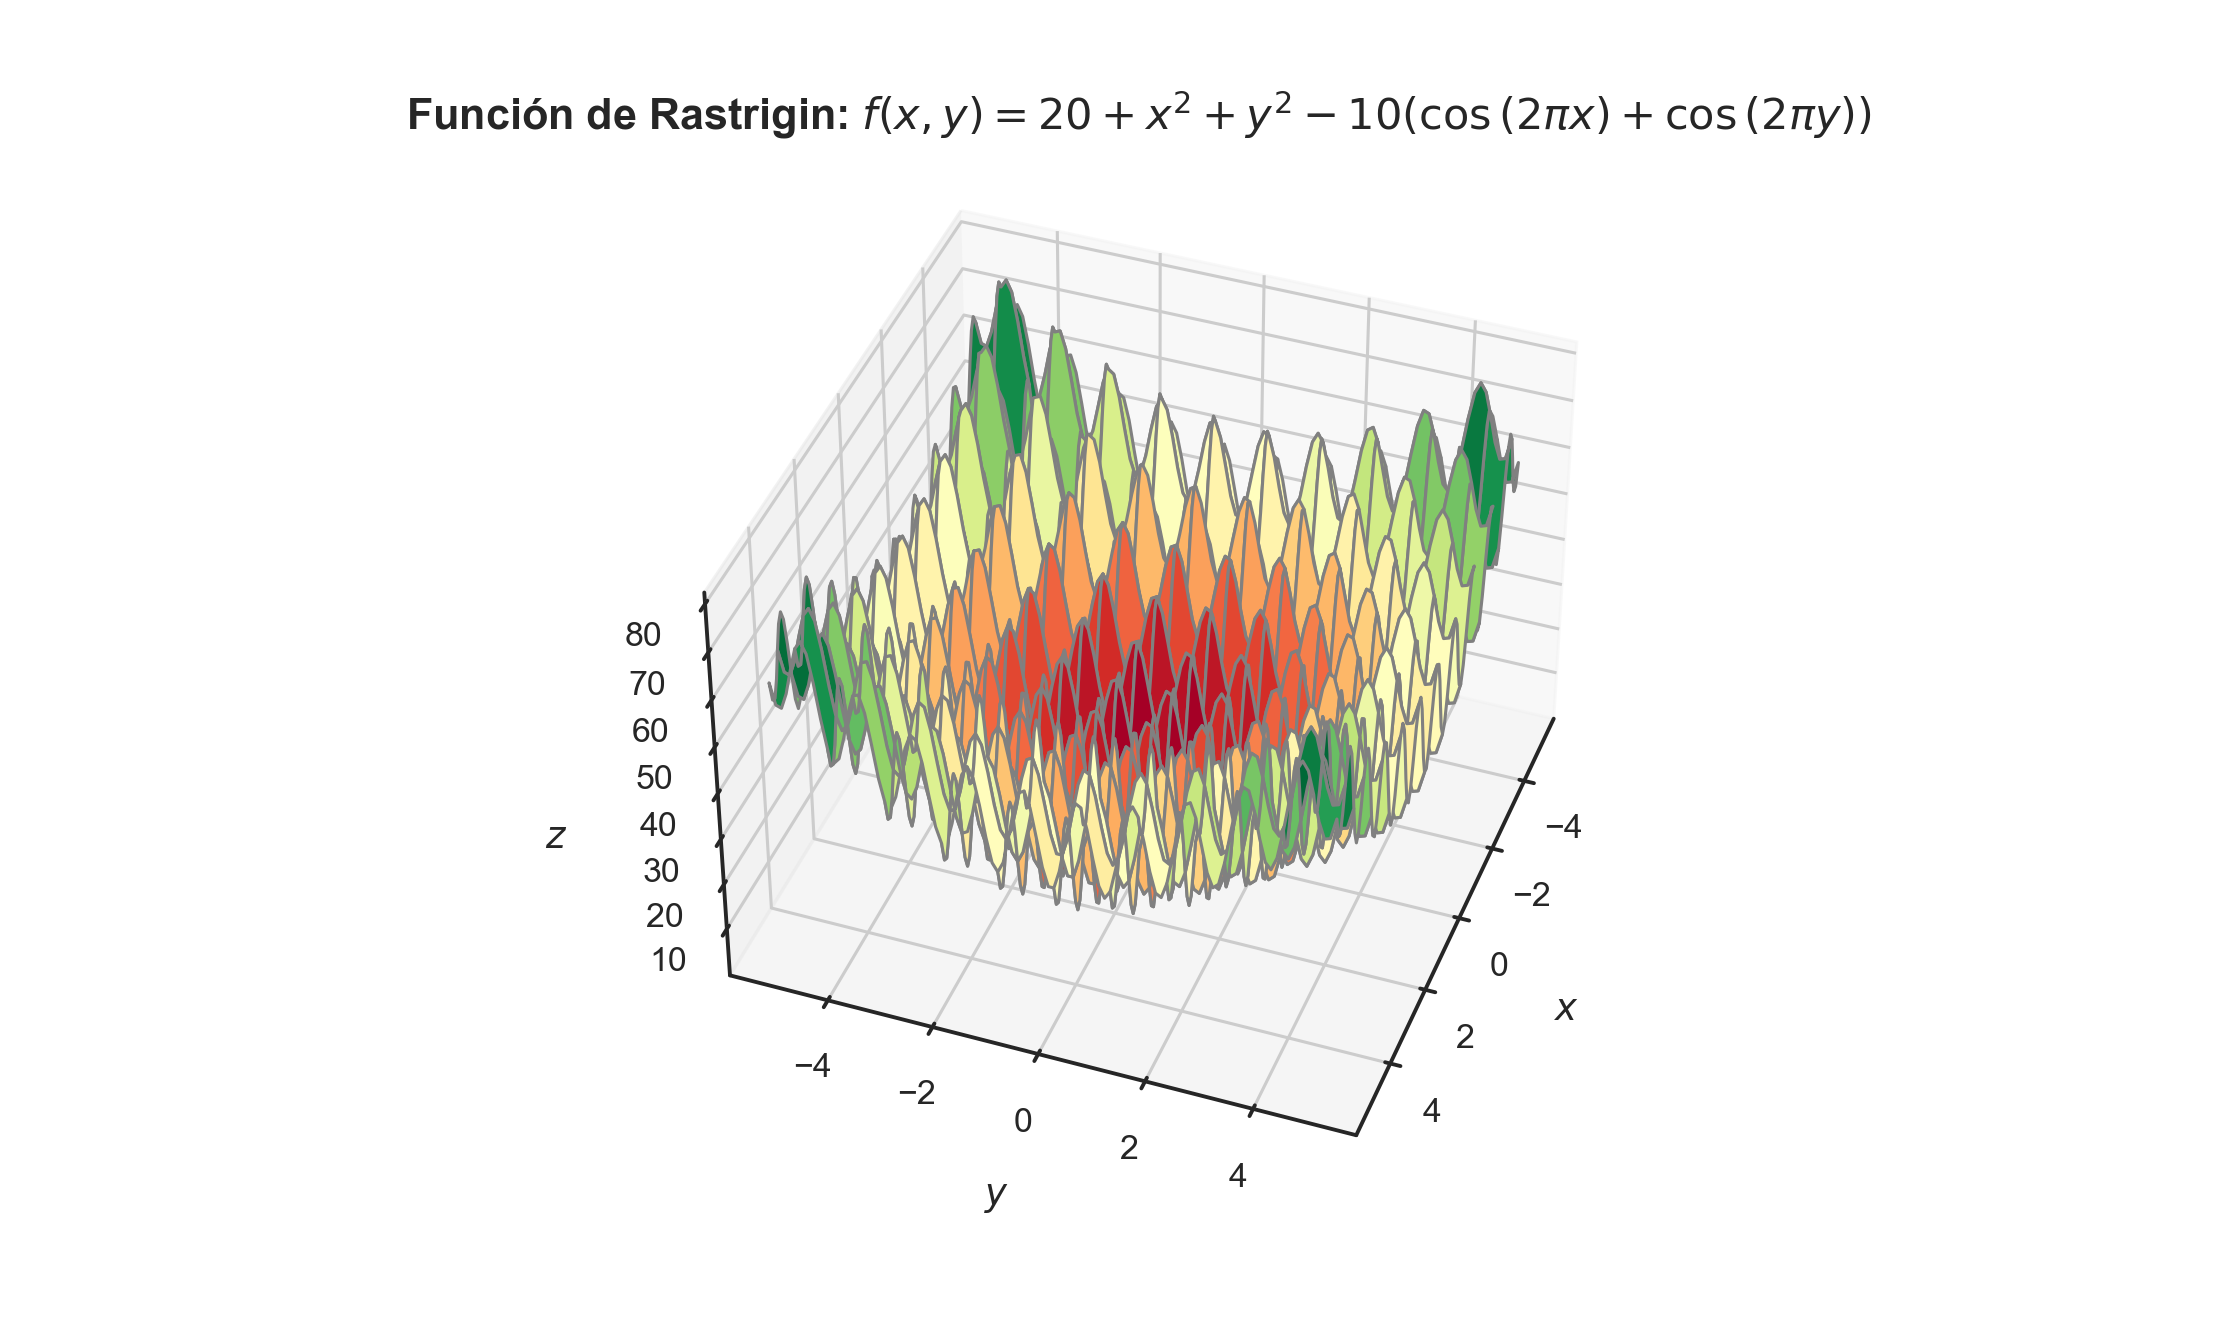

In [33]:
# Graficamos la superficie resultante de esta función.
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=5, cstride=5, edgecolor="gray", cmap='RdYlGn')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$", fontsize=12, labelpad=10)
ax.set_title(
    r'Función de Rastrigin: $f\left( x,y\right)  =20+x^{2}+y^{2}-10\left( \cos \left( 2\pi x\right)  +\cos \left( 2\pi y\right)  \right)$', 
    fontsize=14, fontweight="bold", pad=10
)
ax.view_init(40, 20);

<IPython.core.display.Javascript object>


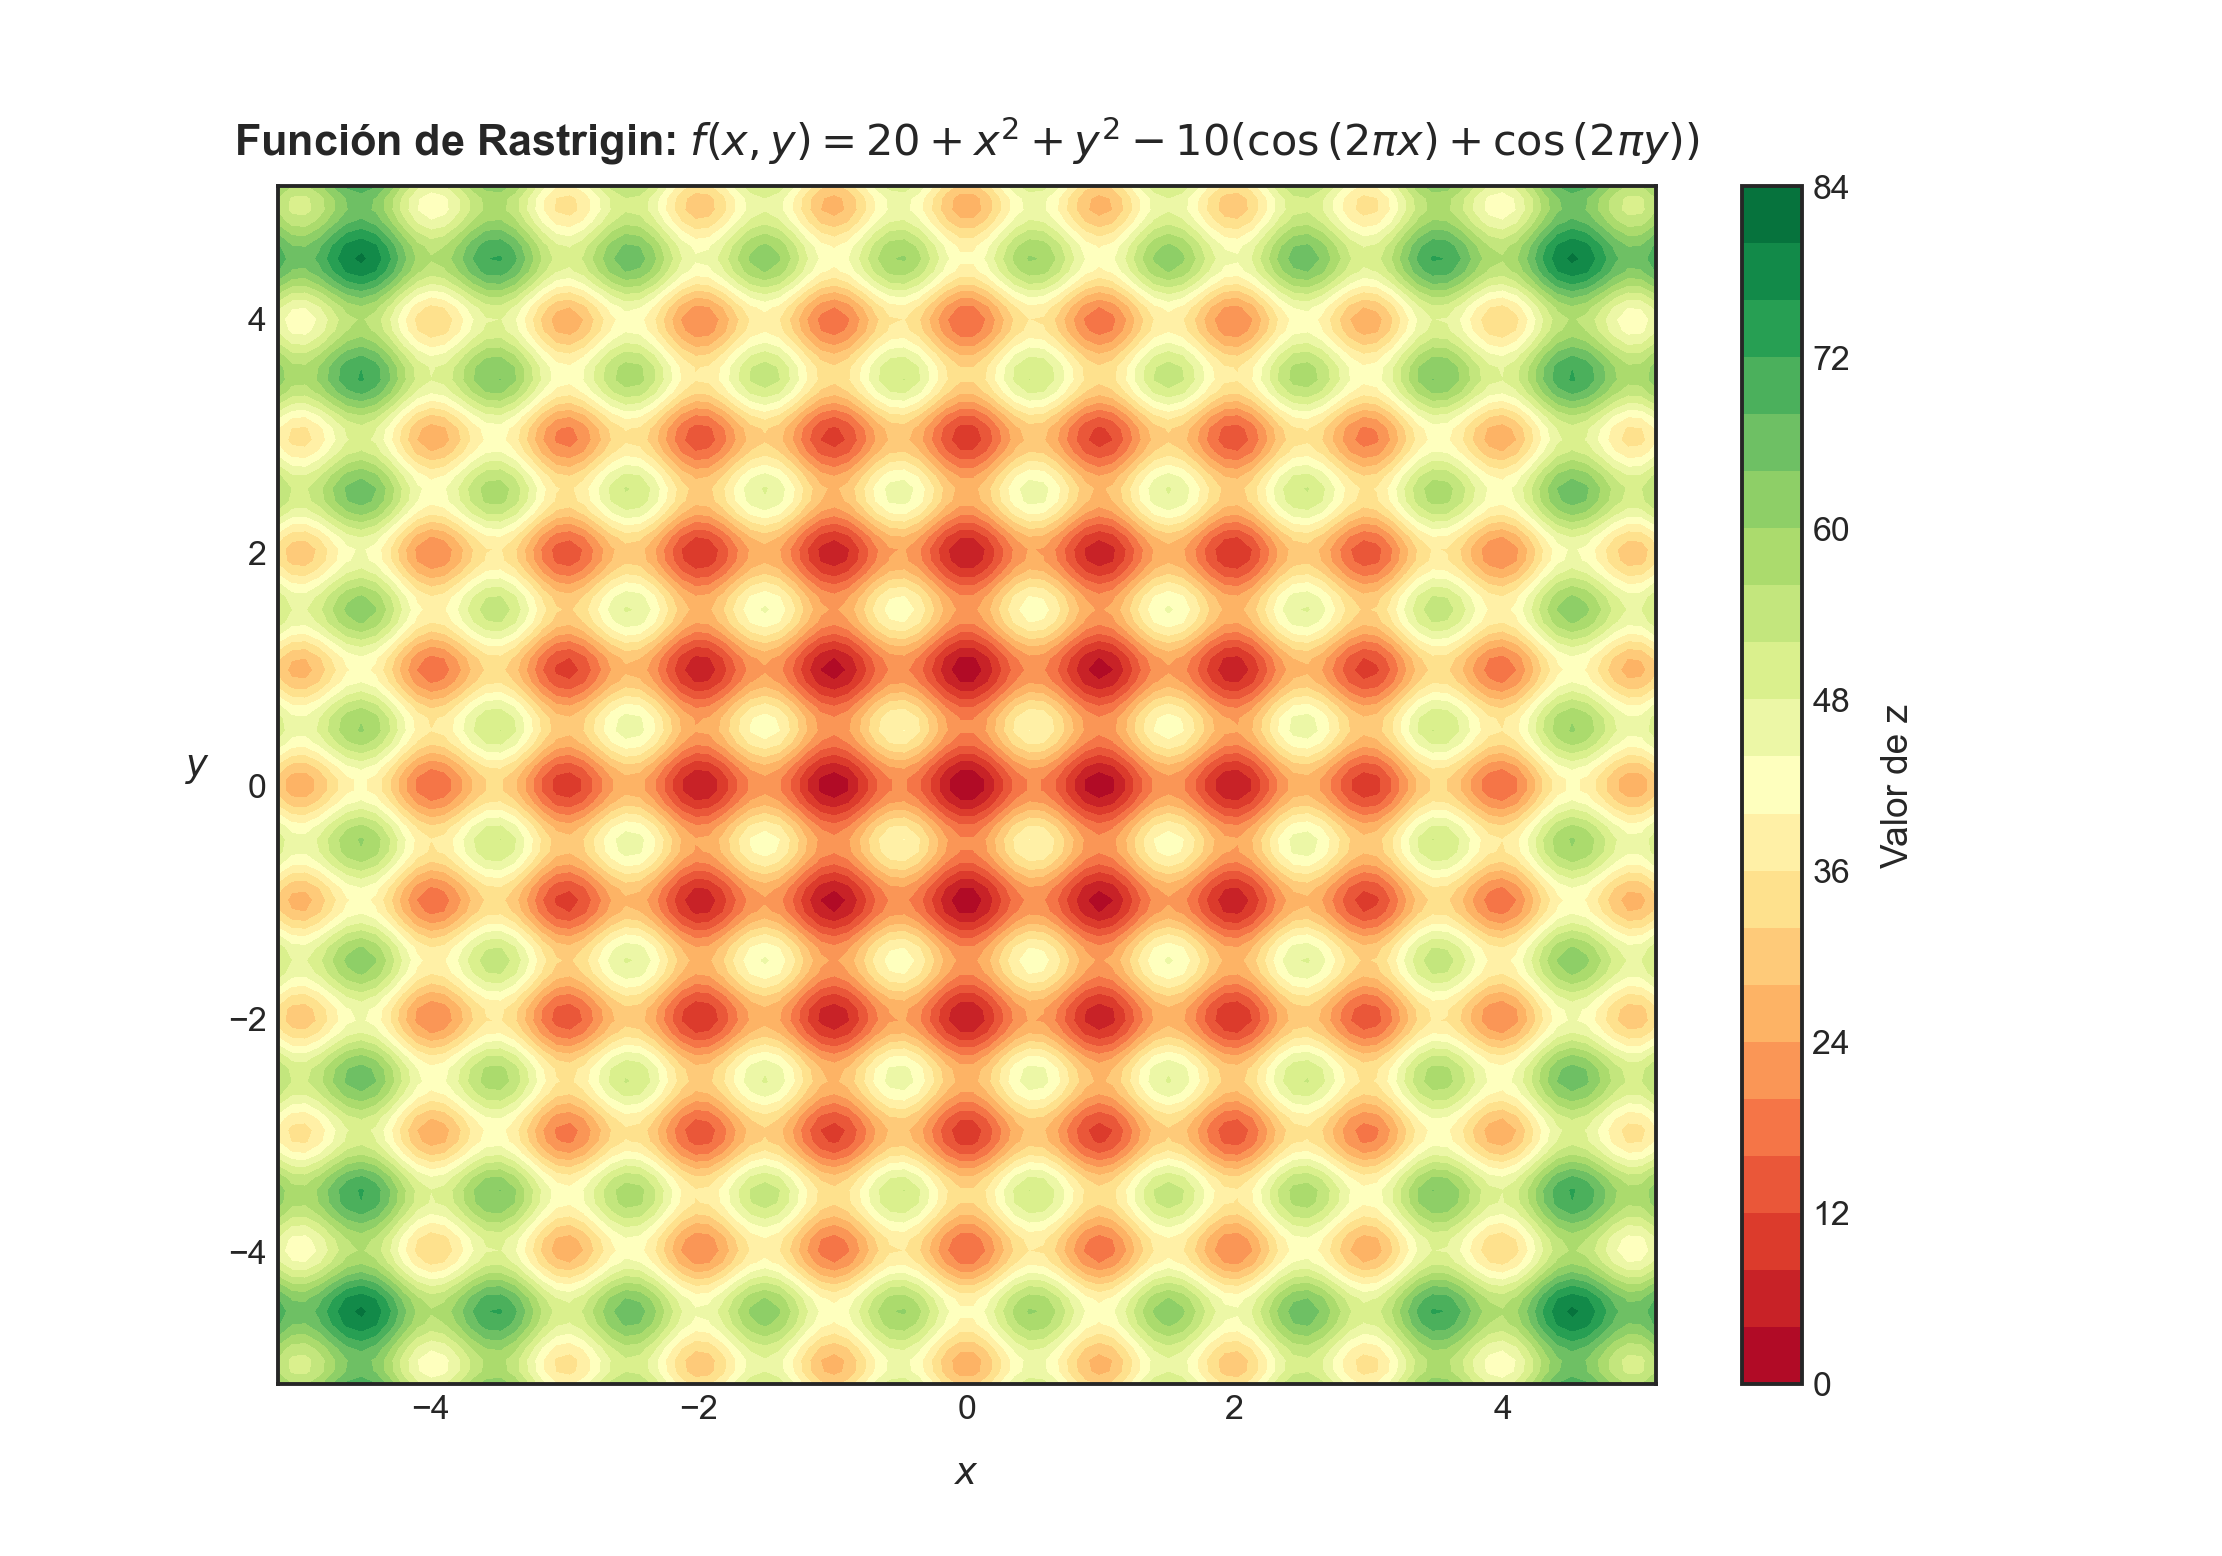

In [34]:
# Y creamos un gráfico de contorno completo para visualizar este mínimo global en 2D.
fig, ax = plt.subplots(figsize=(10, 7))
p = ax.contourf(X, Y, Z, levels=20, cmap='RdYlGn')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10, rotation=0)
ax.set_title(
    r'Función de Rastrigin: $f\left( x,y\right)  =20+x^{2}+y^{2}-10\left( \cos \left( 2\pi x\right)  +\cos \left( 2\pi y\right)  \right)$', 
    fontsize=14, fontweight="bold", pad=10
)
cb = plt.colorbar(p)
cb.set_label("Valor de z", fontsize=12, labelpad=10);

### La función `scipy.optimize.minimize()`.
En el módulo `scipy.optimize`, la función encargada de resolver problemas de optimización corresponde, en términos generales, a `scipy.optimize.minimize()` (en adelante, sólo `minimize()`). De esta manera, cualquier problema de interés que queramos resolver por medio del uso de esta función deberá ser tal que su función objetivo siempre sea de minimización. Esto no representa ningún problema, puesto que, como comentamos antes, para problemas de maximización, siempre podremos realizar la conversión $\max(f)=-\min(f)$, para toda función $f$.

La función `minimize()` trabaja con varios argumentos, muchos de los cuales son opcionales debido a que no siempre será sencillo computar algunos de ellos. Como mínimo, debemos proveer dos parámetros:

- `fun`: La función objetivo a evaluar. En este caso, proveemos la función directamente, ya que este argumento es de tipo `callable`. Por ejemplo, si la función objetivo fuera la función de Rastrigin que definimos previamente, bastará con usar su `callable` como argumento. Es decir, `rastrigin`. La función `fun` siempre debe ser del tipo `fun(x, **args)`, donde `x` es un arreglo de **Numpy** de geometría `(n,)` (`n` es el total de elementos del arreglo), y `**args` corresponde a una tupla de parámetros estáticos que permiten especificar ciertos elementos de la función (y que, por extensión, resultan opcionales).
- `x0`: Corresponde a lo que formalmente se conoce como **solución inicial**. Los algoritmos de **Scipy** realizan una búsqueda sistemática de la solución óptima de un problema en un espacio determinado (llamado **espacio de búsqueda**). El valor `x0` corresponde al punto en el cual se inicia dicha búsqueda. En general, mientras más cercano esté dicho punto a la solución óptima, más sencillo le será al algoritmo alcanzar dicha solución.

Sumado a estos parámetros, hay varios argumentos opcionales que son de interés. El primero corresponde a `method`, y que detalla el tipo de algoritmo de optimización que se implementará para resolver nuestro problema. Existen muchos algoritmos que podemos escoger, y que podemos revisar en la correspondiente [documentación](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html). Algunos algoritmos detallados en el parámetro `method` admiten, además, la imputación de las derivadas parciales de la función objetivo cuando éstas son factibles de calcular, en la forma de la correspondiente matriz Jacobiana (que agrupa todas las derivadas parciales de primer orden de una función) y la matriz Hessiana, usando los parámetros `jac` y `hess`, respectivamente.

Hay otros argumentos que serán de interés cuando agreguemos algo de complejidad a los problemas que deseemos resolver. Por el momento, para problemas no restringidos, ésto debería ser suficiente.

Ejemplifiquemos todo esto. Vamos a implementar la función `minimize()` para determinar el mínimo global de la función de Rosenbrock, definida previamente. Esto es tan sencillo como imputar la función como un `callable` y una solución inicial. Como sabemos el mínimo de la función de Rosenbrock se alcanza en el punto $\mathbf{x^\star}=(1,...,1)\in \mathbb{R}^{n}$, tomaremos como solución inicial el punto $\mathbf{x}_{0}=(2, 2, 2, 2, 2)$ y minimizaremos la función de Rosenbrock para el caso $n=5$:

In [35]:
# Importamos la función que utilizaremos para resolver este problema.
from scipy.optimize import minimize

In [36]:
# Resolvemos el problema usando el algoritmo simplex de Nelder-Mead.
x0 = (2, 2, 2, 2, 2)
result = minimize(fun=rosen, x0=x0, method="Nelder-Mead")

La función `minimize()` entrega siempre sus resultados en un objeto del tipo `scipy.optimize.OptimizeResult`, y que es una especie de diccionario que aglutina toda la información relativa a la solución óptima encontrada por nuestro algoritmo. Por ejemplo, mediante la llave `"x"`, podemos consultar la solución óptima encontrada por el algoritmo. Mediante la llave `"fun"`, podemos consultar el valor mínimo de la función (evaluada en la solución óptima encontrada):

In [37]:
# Solución óptima y valor mínimo determinados por el algoritmo.
print(f"Solución óptima encontrada: {result['x']}")
print(f"Valor mínimo estimado: {result['fun']}")

Solución óptima encontrada: [1.00000047 1.00000079 1.0000027  1.00000292 1.00000473]
Valor mínimo estimado: 8.815615550892453e-10


Es claro que el algoritmo fue exitoso en su cometido, ya que ha encontrado la solución óptima del problema que hemos consultado. El estado del algoritmo podemos consultarlo siempre mediante la llave `"status"`, y que corresponde a un número entero cuya codificación depende del algoritmo utilizado. Siempre podremos traducir este estado a palabras simples usando la llave `"message"`:

In [38]:
# Estado del algoritmo.
print(f"Código de estado: {result['status']}")
print(f"Condición: {result['message']}")

Código de estado: 0
Condición: Optimization terminated successfully.


Finalmente, las llaves `"nit"` y `"nfev"` nos permiten consultar el número de iteraciones realizadas por el algoritmo respectivo y el número de evaluaciones de la función objetivo efectuadas en la búsqueda:

In [39]:
# Número de iteraciones y evaluaciones.
print(f"Número de iteraciones: {result['nit']}")
print(f"Número de evaluaciones: {result['nfev']}")

Número de iteraciones: 423
Número de evaluaciones: 683


Como dijimos peviamente, la cercanía de la solución inicial al mínimo global de la función objetivo influye en la calidad de la solución que el algoritmo es capaz de estimar:

In [40]:
# Probaremos distintas soluciones iniciales.
x01 = (2, 2, 2, 2, 2)
x02 = (6, 6, 6, 6, 6)
x03 = (20, 20, 20, 20, 20)
x04 = (60, 60, 60, 60, 60)

In [41]:
# Verificamos nuestros resultados.
for j, x0j in enumerate([x01, x02, x03, x04]):
    result_j = minimize(fun=rosen, x0=x0j, method="Nelder-Mead")
    print(f"Solución óptima {j}: {result_j['x']}")

Solución óptima 0: [1.00000047 1.00000079 1.0000027  1.00000292 1.00000473]
Solución óptima 1: [0.99999936 0.99999217 0.99998191 0.99996442 0.99993143]
Solución óptima 2: [1.06233645 1.1353297  1.27020696 1.59939078 2.5358918 ]
Solución óptima 3: [  1.37904725   1.90288845   3.62261092  13.12679896 172.31749093]


Notemos que el algoritmo implementado es capaz de aproximar razonablemente la solución óptima de nuestro problema únicamente cuando la solución inicial no es muy lejana al mínimo global de la función objetivo. Cuando es muy lejana, los resultados obtenidos son absolutamente incorrectos.

Lo anterior ocurre porque el algoritmo implementado es extremadamente sensible a la existencia de mínimos locales. Como resultado, es muy común que no sea capaz de hallar un mínimo global cuando la función objetivo es multimodal y, además, es también razonable que diverja. Por ejemplo, sabiendo que el mínimo global de la función de Rastrigin está en el origen, apliquemos el algoritmo simplex de Nelder-Mead a fin de verificar si es posible hallar dicho valor:

In [42]:
# Implementación del algoritmo simplex de Nelder-Mead sobre la función de Rastrigin.
result = minimize(fun=rastrigin, x0=x01, method="Nelder-Mead")

In [43]:
# Mostramos la solución óptima en pantalla.
print(f"Solución óptima: {result['x']}")
print(f"Valor mínimo de la función objetivo: {result['fun']}")

Solución óptima: [1.98989201 1.98990361 1.98989773 1.98997022 1.98993487]
Valor mínimo de la función objetivo: 19.899156857239156


Nuestro algoritmo de optimización ha fallado incluso cuando la solución inicial estaba muy cerca del óptimo.

Lo anterior ocurre porque el algoritmo simplex de Nelder-Mead es extremadamente sensible a la existencia de mínimos locales. Como resultado, es muy común que no sea capaz de hallar un mínimo global cuando la función objetivo es multimodal y, además, es también razonable que diverja. 

Otros algoritmos pueden resultar más útiles en escenarios más desafiantes. Por ejemplo, el algoritmo BFGS (acrónimo de *Broyden-Fletcher-Goldfarb-Shanno*) puede aproximar el mínimo global de la función de Rosenbrock sin muchos problemas, incluso si el procedimiento de búsqueda del óptimo parte muy lejos de él:

In [44]:
# Verificamos nuestros resultados.
for j, x0j in enumerate([x01, x02, x03, x04]):
    result_j = minimize(fun=rosen, x0=x0j, method="BFGS")
    print(f"Solución óptima {j}: {result_j['x']}")

Solución óptima 0: [0.99999919 0.9999984  0.99999681 0.99999363 0.99998725]
Solución óptima 1: [0.9999992  0.99999841 0.99999684 0.99999369 0.99998738]
Solución óptima 2: [0.99999935 0.99999891 0.99999768 0.99999533 0.99999053]
Solución óptima 3: [0.9999992  0.9999984  0.99999683 0.99999367 0.99998732]


Pero es incapaz de determinar el mínimo global de la función de Rastrigin, porque tampoco es un algoritmo efectivo cuando la función objetivo es multimodal:

In [45]:
# Implementación del algoritmo BFGS sobre la función de Rastrigin.
result = minimize(fun=rastrigin, x0=x01, method="BFGS")

In [46]:
# Mostramos la solución óptima en pantalla.
print(f"Solución óptima: {np.around(result['x'], 3)}")
print(f"Valor mínimo de la función objetivo: {result['fun']}")

Solución óptima: [1.99 1.99 1.99 1.99 1.99]
Valor mínimo de la función objetivo: 19.899155952770485


El algoritmo BFGS, no obstante, nos ofrece más opciones que el algoritmo simplex a la hora de resolver un problema, a fin de poder mejorar la calidad de las soluciones determinadas, e incluso mejorar los correspondientes tiempos de ejecución. Por ejemplo, si la función objetivo tiene una descripción explícita, podemos calcular sus derivadas parciales correspondientes y agruparlas en un arreglo que hará las funciones de gradiente de la misma. Recordemos de los cursos de cálculo que, para una función $f:U\subseteq \mathbb{R}^{n} \longrightarrow \mathbb{R}$ definida en un conjunto abierto $U$ de $\mathbb{R}^{n}$, el gradiente de $f$ es un vector compuesto por las derivadas parciales de $f$:

$$\nabla f\left( \mathbf{x} \right)  =\left( \frac{\partial f}{\partial x_{1}} ,\frac{\partial f}{\partial x_{2}} ,\  ...\  ,\frac{\partial f}{\partial x_{n}} \right)$$
</p> <p style="text-align: right;">$(3.18)$</p>

Para el caso de la función de Rosenbrock, sus derivadas parciales pueden calcularse (con algo de esfuerzo) separando la suma que define a dicha función entre sus términos extremos ($i=1$ e $i=n$) y sus términos intermedios ($1<i<n$). De esta manera, para $i=1$, tenemos que

$$\begin{array}{lll}\displaystyle \frac{\partial f}{\partial x_{1}} &=&\displaystyle \frac{\partial }{\partial x_{1}} \left( 100\left( x_{2}-x^{2}_{1}\right)^{2}  +\left( 1-x_{1}\right)^{2}  \right)  \\ &=&-400x_{1}\left( x_{2}-x^{2}_{1}\right)  -2\left( 1-x_{1}\right)  \end{array}$$
</p> <p style="text-align: right;">$(3.19)$</p>

Por otro lado, para $i=n$,

$$\begin{array}{lll}\displaystyle \frac{\partial f}{\partial x_{n}} &=&\displaystyle \frac{\partial }{\partial x_{n}} \left( 100\left( x_{n}-x^{2}_{n-1}\right)^{2}  \right)  \\ &=&200\left( x_{n}-x^{2}_{n-1}\right)  \end{array}$$
</p> <p style="text-align: right;">$(3.20)$</p>

Finalmente, para $1<i<n$,

$$\begin{array}{lll}\displaystyle \frac{\partial f}{\partial x_{i}} &=&\displaystyle \frac{\partial }{\partial x_{i}} \left( 100\left( x_{i+1}-x^{2}_{i}\right)^{2}  +\left( 1-x_{i}\right)^{2}  +100\left( x_{i}-x^{2}_{i-1}\right)^{2}  \right)  \\ &=&-400x_{i}\left( x_{i+1}-x^{2}_{i}\right)  -2\left( 1-x_{i}\right)  +200\left( x_{i}-x^{2}_{i-1}\right)  \end{array}$$
</p> <p style="text-align: right;">$(3.21)$</p>

En resumen, juntando todo en una única expresión, tenemos que

$$\frac{\partial f}{\partial x_{i}} =\begin{cases}-400x_{1}\left( x_{2}-x^{2}_{1}\right)  -2\left( 1-x_{1}\right)  &;\  \mathrm{s} \mathrm{i} \  i=1\\ -400x_{i}\left( x_{i+1}-x^{2}_{i}\right)  -2\left( 1-x_{i}\right)  +200\left( x_{i}-x^{2}_{i-1}\right)  &;\  \mathrm{s} \mathrm{i} \  1<i<n\\ 200\left( x_{n}-x^{2}_{n-1}\right)  &;\  \mathrm{s} \mathrm{i} \  i=n\end{cases}$$
</p> <p style="text-align: right;">$(3.22)$</p>

Y ya tenemos una expresión general para las derivadas parciales de nuestra función objetivo. Por lo tanto, podemos construir una función de Python que permita calcular el gradiente completo de la función de Rosenbrock como sigue:

In [47]:
# Una función que computa el gradiente de la función de Rosenbrock.
def rosen_grad(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    diff = np.zeros_like(x)
    diff[1:-1] = 200*(xm - xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1 - xm)
    diff[0] = -400*x[0]*(x[1] - x[0]**2) - 2*(1 - x[0])
    diff[-1] = 200*(x[-1] - x[-2]**2)
    
    return diff

Y con esto, ya podemos incorporar esta información al algoritmo BFGS al buscar el mínimo global de la función de Rosenbrock:

In [48]:
# Implementación del algoritmo BFGS sobre la función de Rosenbrock, usando el gradiente de
# dicha función.
result = minimize(fun=rosen, x0=x01, method="BFGS", jac=rosen_grad)

In [49]:
# Mostramos la solución óptima en pantalla.
print(f"Solución óptima: {np.around(result['x'], 3)}")
print(f"Valor mínimo de la función objetivo: {result['fun']}")

Solución óptima: [1. 1. 1. 1. 1.]
Valor mínimo de la función objetivo: 2.4374758679761786e-14


La solución óptima ahora es exacta gracias a esta nueva información.

La incorporación de los gradientes en el algoritmo de optimización no sólo permite asegurar, en el caso del algoritmo BFGS, una mejor solución, sino que además, un menor tiempo de ejecución:

In [50]:
%timeit result = minimize(fun=rosen, x0=x01, method="BFGS")
%timeit result = minimize(fun=rosen, x0=x01, method="BFGS", jac=rosen_grad)

11.8 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.57 ms ± 134 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


En general, los algoritmos de optimización que son sensibles a la existencia de mínimos locales no mejorarán sus estimaciones cuando les incorporamos más información relativa a la función objetivo. El objetivo de la adición de información adicional, como el caso de gradientes (o matrices jacobianas, cuando la función objetivo es un campo vectorial) es llegar al óptimo más rápido, en menos iteraciones o con una menor cantidad de evaluaciones de la función objetivo.

Hay algoritmos que también nos exigen más información para resolver un problema de optimización. Un ejemplo es el algoritmo de gradiente conjugado de Newton (que, en el caso de la función `minimize()`, se expresa como `"Newton-CG"`). Dicho algoritmo plantea un procedimiento iterativo basado en la expresión

$$\mathbf{x}^{\star}=\mathbf{x}_{0}-\mathbf{H}^{-1}(\mathbf{x})\nabla f(\mathbf{x})$$
</p> <p style="text-align: right;">$(3.22)$</p>

Donde $\mathbf{x}_{0}$ es la solución inicial del algoritmo y $\mathbf{H}(\mathbf{x})$ es la matriz Hessiana de $f$ evaluada en el vector $\mathbf{x}$.

La matriz Hessiana es el resultado de un cálculo que muchas veces eleva demasiado la complejidad de un problema de optimización. Para una función del tipo $f:U\subseteq \mathbb{R}^{n} \longrightarrow \mathbb{R}$, definida en un conjunto abierto $U$ de $\mathbb{R}^{n}$, la matriz Hessiana estará compuesta por un total de $n^{2}$ entradas que representarán las derivadas parciales de segundo orden de $f$. Si nuestra función objetivo tiene 10 variables, calcular su matriz Hessiana implicará generar un arreglo con 100 entradas en total. Por lo tanto, podemos incluso pensar en la matriz Hessiana como un lujo que pocas veces nos podremos permitir pagar.

Para el caso de la función de Rosenbrock, podemos seguir un procedimiento similar al del gradiente para calcular las derivadas parciales de segundo orden que componen las entradas de la matriz Hessiana. En este caso, es buena idea derivar los casos para la primera fila, la última fila, y el resto de las filas de esta matriz. Luego, para la primera fila (es decir, para $i=1$):

- Elemento diagonal ($i=j=1$): 

$$\begin{array}{lll}\displaystyle \frac{\partial^{2} f}{\partial x^{2}_{1}} &=&\displaystyle \frac{\partial }{\partial x_{1}} \left( -400x_{1}\left( x_{2}-x^{2}_{1}\right)  -2\left( 1-x_{1}\right)  \right)  \\ &=&1200x^{2}_{1}-400x_{2}+2\end{array} $$
</p> <p style="text-align: right;">$(3.23)$</p>

- Elemento no diagonal ($j=2$):

$$\begin{array}{lll}\displaystyle \frac{\partial^{2} f}{\partial x_{1}\partial x_{2}} &=&\displaystyle \frac{\partial }{\partial x_{2}} \left( -400x_{1}\left( x_{2}-x^{2}_{1}\right)  \right)  \\ &=&-400x_{1}\end{array}$$
</p> <p style="text-align: right;">$(3.24)$</p>

Para la última fila ($i=n$):

- Elemento diagonal ($j=n$):

$$\begin{array}{lll}\displaystyle \frac{\partial^{2} f}{\partial x^{2}_{n}} &=&\displaystyle \frac{\partial }{\partial x_{n}} \left( 200\left( x_{n}-x^{2}_{n-1}\right)  \right)  \\ &=&200\end{array}$$
</p> <p style="text-align: right;">$(3.25)$</p>

- Elemento no diagonal ($j=n-1$):

$$\begin{array}{lll}\displaystyle \frac{\partial^{2} f}{\partial x_{n}\partial x_{n-1}} &=&\displaystyle \frac{\partial }{\partial x_{n-1}} \left( 200\left( x_{n}-x^{2}_{n-1}\right)  \right)  \\ &=&-400x_{n-1}\end{array}$$
</p> <p style="text-align: right;">$(3.26)$</p>

Para el resto de las filas ($1<j<n$):

- Elemento diagonal ($i=j$):

$$\begin{array}{lll}\displaystyle \frac{\partial^{2} f}{\partial x^{2}_{i}} &=&\displaystyle \frac{\partial }{\partial x_{i}} \left( -400x_{i}\left( x_{i+1}-x^{2}_{i}\right)  -2\left( 1-x_{i}\right)  +200\left( x_{i}-x^{2}_{i-1}\right)  \right)  \\ &=&1200x^{2}_{i}-400x_{i+1}+202\end{array}$$
</p> <p style="text-align: right;">$(3.27)$</p>

- Elemento no diagonal ($j=i-1$):

$$\begin{array}{lll}\displaystyle \frac{\partial^{2} f}{\partial x_{i}x_{i-1}} &=&\displaystyle \frac{\partial }{\partial x_{i-1}} \left( 200\left( x_{i}-x^{2}_{i-1}\right)  \right)  \\ &=&-400x_{i-1}\end{array}$$
</p> <p style="text-align: right;">$(3.28)$</p>

- Elemento no diagonal ($j=i+1$):

$$\begin{array}{lll}\displaystyle \frac{\partial^{2} f}{\partial x_{i}x_{i+1}} &=&\displaystyle \frac{\partial }{\partial x_{i+1}} \left( -400x_{i}\left( x_{i+1}-x^{2}_{i}\right)  \right)  \\ &=&-400x_{i}\end{array}$$
</p> <p style="text-align: right;">$(3.29)$</p>

Juntando todo, podemos escribir finalmente la matriz Hessiana de la función de Rosenbrock como sigue:

$$\mathbf{H} \left( \mathbf{x} \right)  =\left( \begin{array}{ccccc}1200x^{2}_{1}-400x_{2}+2&-400x_{1}&0&\cdots &0\\ -400x_{1}&1200x^{2}_{2}-400x_{3}+202&-400x_{2}&\cdots &0\\ 0&-400x_{2}&1200x^{2}_{3}-400x_{4}+202&\cdots &0\\ \vdots &\vdots &\vdots &\ddots &\vdots \\ 0&0&0&\cdots &200\end{array} \right)$$
</p> <p style="text-align: right;">$(3.30)$</p>

Con esta información, ya podemos definir esta matriz Hessiana por medio de una función de Python:

In [51]:
# Definimos la matriz Hessiana de la función de Rosenbrock.
def rosen_hessian(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1], 1) - np.diag(400*x[:-1], -1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200 * x[0] ** 2 - 400 * x[1] + 2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200 * x[1:-1] ** 2 - 400 * x[2:]
    H = H + np.diag(diagonal)
    return H

Y podemos incorporarla a algoritmo conjugado de Newton para resolver el problema de determinar el mínimo global de la función de Rosenbrock. En esta oportunidad, añadiremos una impresión en pantalla de los resultados completos de la optimización por medio del argumento `options`, el cual corresponde a un diccionario que permite incorporar varias opciones adicionales que pueden resultar de interés en la resolución de nuestro problema. Una de ellas es la impresión en pantalla de los resultados de la optimización, vía el parámetro Booleano `disp`:

In [52]:
# Implementación del algoritmo conjugado de Newton sobre la función de Rosenbrock, usando el gradiente y
# la matriz Hessiana de dicha función.
result = minimize(
    fun=rosen, x0=x01, method="Newton-CG", jac=rosen_grad, 
    hess=rosen_hessian, options={'disp': True}
)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 31
         Function evaluations: 45
         Gradient evaluations: 45
         Hessian evaluations: 31


In [53]:
# Mostramos la solución óptima en pantalla.
print(f"Solución óptima: {np.around(result['x'], 3)}")
print(f"Valor mínimo de la función objetivo: {result['fun']}")

Solución óptima: [1. 1. 1. 1. 1.]
Valor mínimo de la función objetivo: 6.320424295238026e-10


La incorporación de la matriz Hessiana permite ahorrar tiempo en la ejecución de un algoritmo de optimización, aunque no demasiado:

In [54]:
%timeit result = minimize(fun=rosen, x0=x01, method="Newton-CG", jac=rosen_grad)
%timeit result = minimize(fun=rosen, x0=x01, method="Newton-CG", jac=rosen_grad, hess=rosen_hessian)

9.14 ms ± 251 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.37 ms ± 208 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


En general, los algoritmos de optimización implementados por defecto en la función `minimize()` no son capaces de garantizar la convergencia de tales procedimientos al mínimo global de la función objetivo. Por esta razón, para problemas no restringidos, los algoritmos simplex de Nelder-Mead, BFGS y de gradiente conjugado de Newton suelen constituir líneas base respecto de las cuales generamos contrastes en relación a algoritmos mucho más potentes, muchos de las cuales tienen su propia implementación en `scipy.optimize`. Ya nos ocuparemos de algunas implementaciones un poco más adelante. Por el momento, finalizaremos esta primera implementación de la función `minimize()` comentando que un algoritmo útil para la resolución de problemas de optimización con funciones objetivo multimodales es el método secuencial de programación vía mínimos cuadrados (*sequental least squares programming*, o SLSQP) y que es capaz de determinar el mínimo global de la función de Rastrigin en un espacio de búsqueda amplio. Recordemos que la función de Rastrigin tiene su mínimo global en el origen, y es igual a cero:

In [55]:
# Probaremos distintas soluciones iniciales.
x01 = (2, 2, 2, 2, 2)
x02 = (6, 6, 6, 6, 6)
x03 = (20, 20, 20, 20, 20)
x04 = (60, 60, 60, 60, 60)

In [56]:
# Determinamos el mínimo global de la función de Rastrigin mediante el algoritmo SLSQP para todas
# las soluciones iniciales anteriores.
for j, x0j in enumerate([x01, x02, x03, x04]):
    result_j = minimize(fun=rastrigin, x0=x0j, method="SLSQP")
    print(f"Solución óptima {j}: {np.around(result_j['x'], 3)}")

Solución óptima 0: [0. 0. 0. 0. 0.]
Solución óptima 1: [0. 0. 0. 0. 0.]
Solución óptima 2: [0. 0. 0. 0. 0.]
Solución óptima 3: [0. 0. 0. 0. 0.]


En general, el algoritmo SLSQP es una buena opción cuando deseamos resolver un problema de optimización no restringido rápidamente y no contamos con las derivadas de la función objetivo, ya sea porque éstas son muy costosas de computar, o bien, porque no podemos hacerlo.

Por supuesto, las opciones a nuestra disposición pueden cambiar enormemente si el problema a resolver presenta restricciones. Esto es lo que abordaremos a continuación.

### Problemas restringidos.
Como cabría esperar, el asunto cambia completamente cuando queremos resolver problemas de optimización que cuentan con un número arbitrario de restricciones. En un caso así, dependiendo del algoritmo escogido, tendremos que definir ciertos objetos que jugarán el papel de dichas restricciones.

Para este caso, vamos a intentar resolver el siguiente problema, donde la función objetivo es la función de Rosenbrock en dos dimensiones:

$$\begin{array}{ll}\displaystyle \min_{\left( x_{1},x_{2}\right)  } &100\left( x_{2}-x^{2}_{1}\right)^{2}  +\left( 1-x_{1}\right)^{2}  \\ \mathrm{s} .\mathrm{a} .:&x_{1}+2x_{2}\leq 1\\ &x^{2}_{1}+x_{2}\leq 1\\ &x^{2}_{1}-x_{2}\leq 1\\ &2x_{1}+x_{2}=1\\ &0\leq x_{1}\leq 1\\ &-\frac{1}{2} \leq x_{2}\leq 2\end{array}$$
</p> <p style="text-align: right;">$(3.31)$</p>

A fin de entender el efecto de todas las restricciones, construiremos un gráfico que permite identificar el espacio de soluciones factibles del problema (3.31):

In [57]:
# Generamos una grilla donde evaluaremos la función objetivo y sus restricciones.
x1 = np.linspace(start=-3, stop=3, num=100)
x2 = np.linspace(start=-3, stop=3, num=100)
X1, X2 = np.meshgrid(x1, x2)

In [58]:
# Definimos mediante funciones simples las restricciones de desigualdad.
F1 = X1 + 2 * X2 - 1
F2 = X1**2 + X2 - 1
F3 = X1**2 - X2 - 1

In [59]:
# Evaluamos la función objetivo sobre la grilla.
Z = 100*(X2 - X1**2)**2 + (1 - X1)**2

<IPython.core.display.Javascript object>


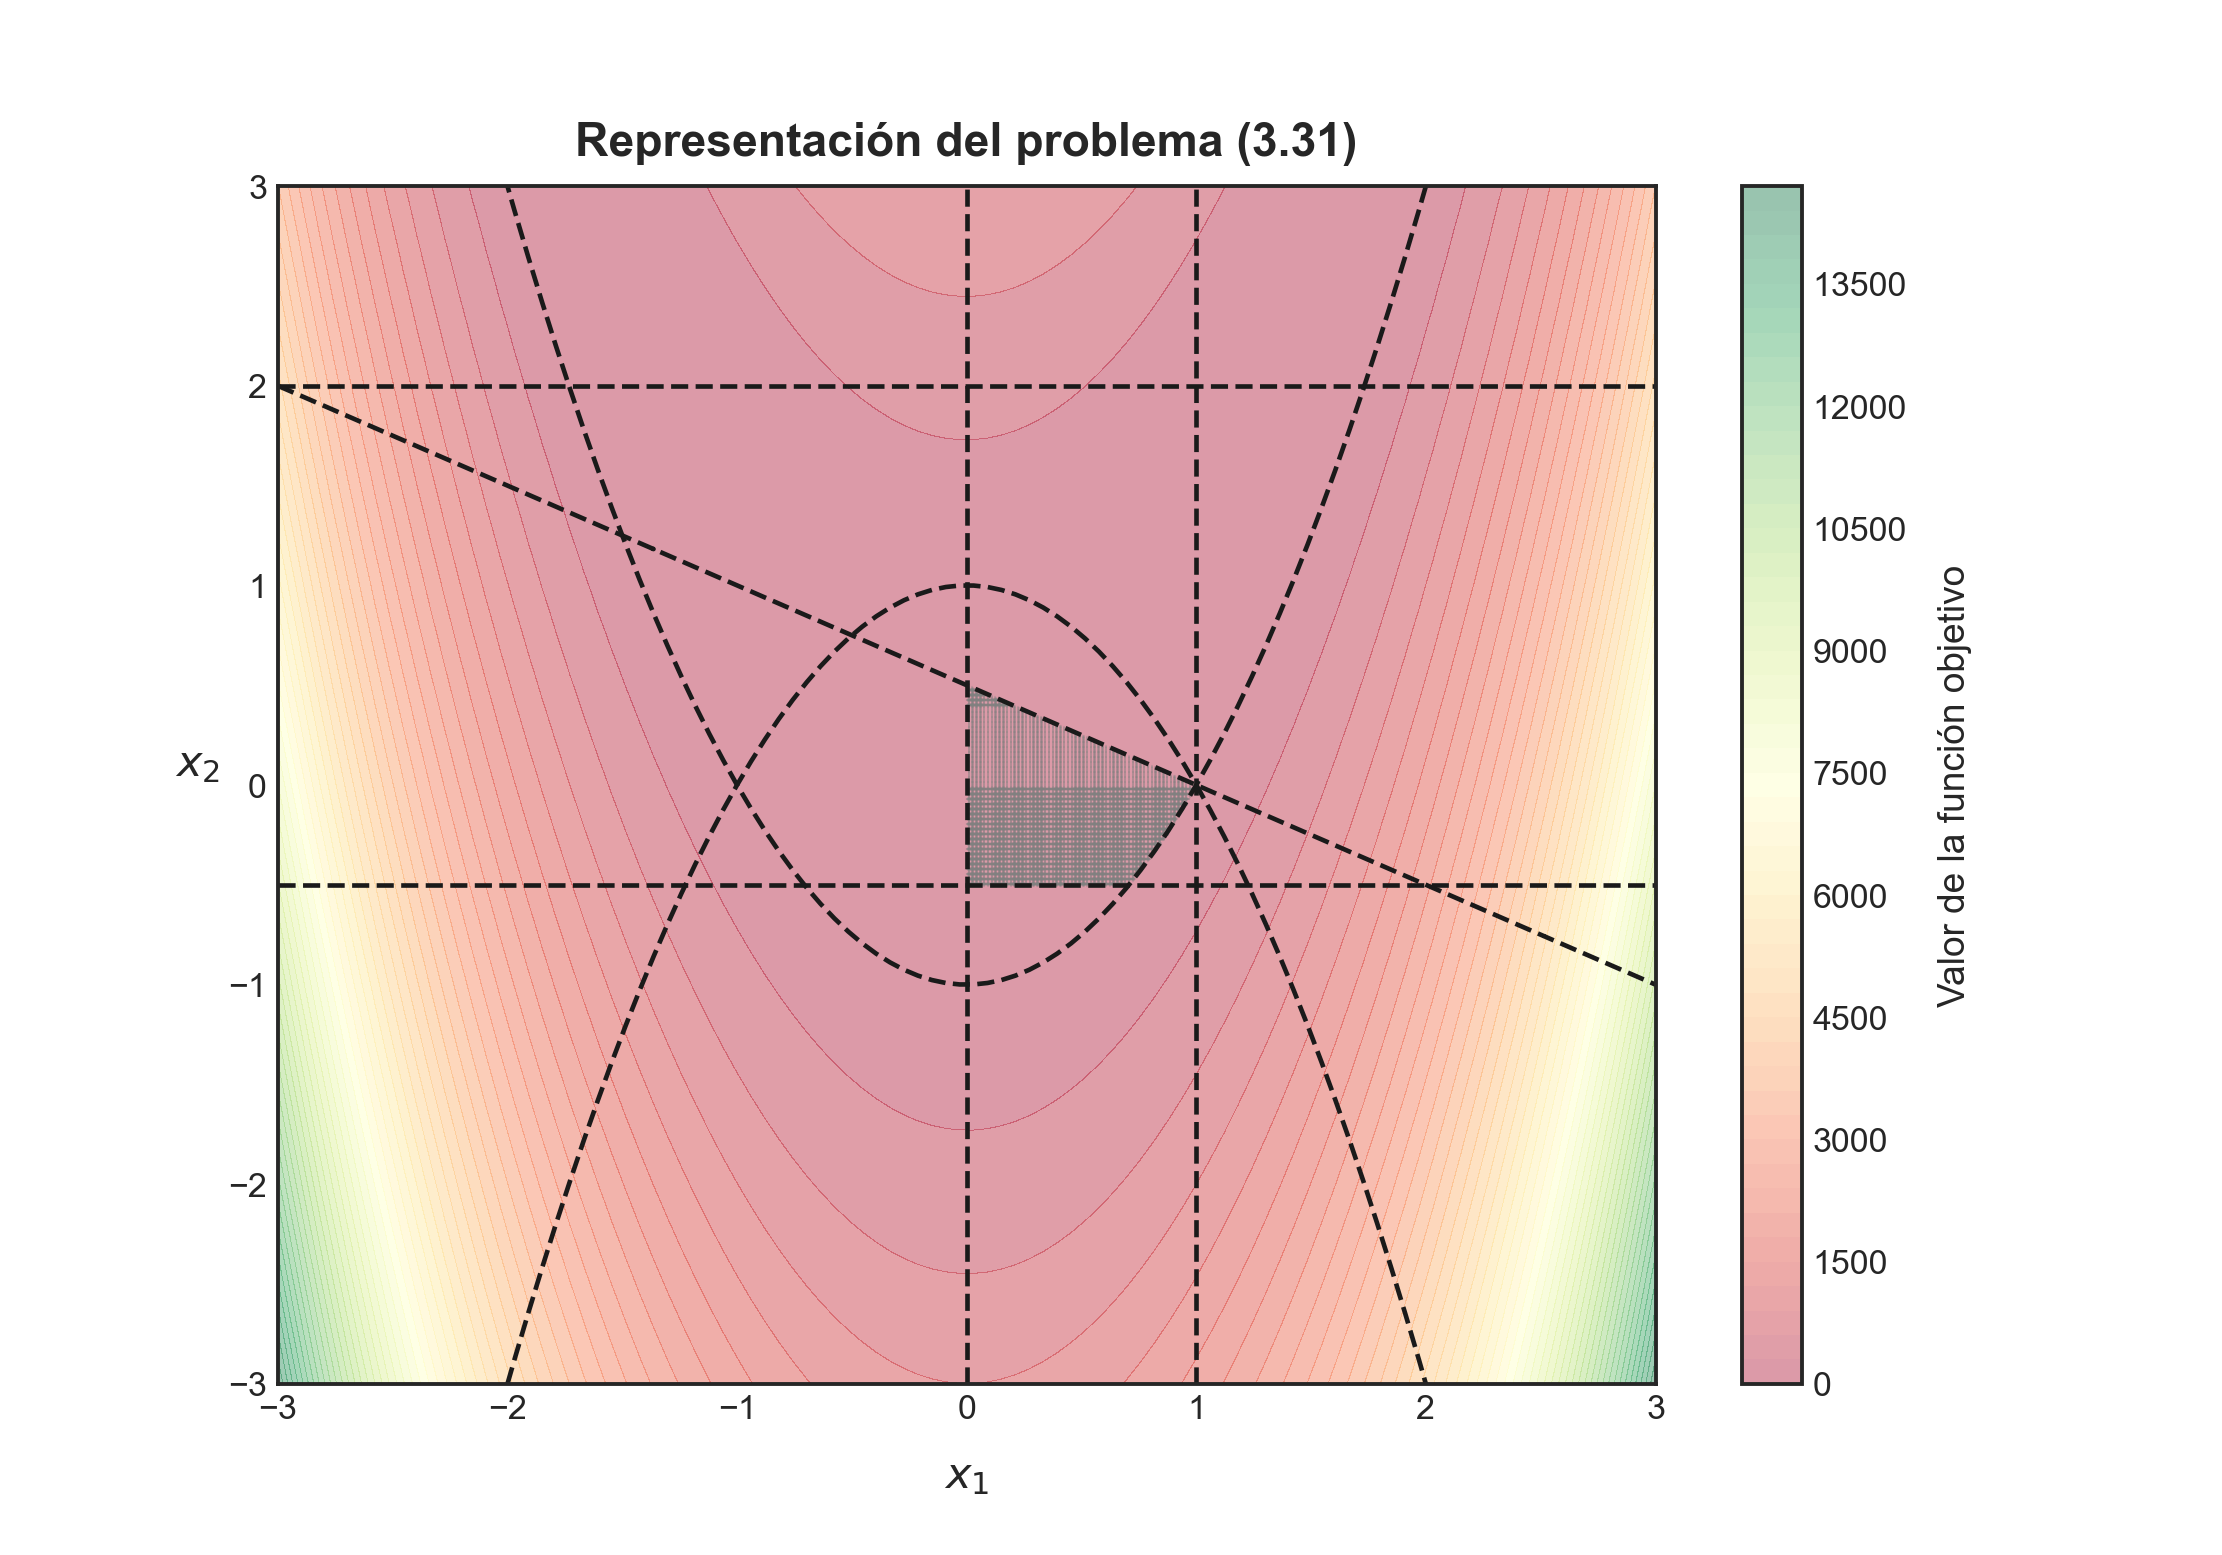

In [60]:
# Construimos los contornos que representan a las restricciones.
# Advertencia: Este bloque de código tarda un poco en ejecutarse.
fig, ax = plt.subplots(figsize=(10, 7))
p = ax.contourf(X1, X2, Z, levels=50, cmap="RdYlGn", alpha=0.4)
ax.contour(X1, X2, F1, levels=[0], colors='k', linestyles='dashed')
ax.contour(X1, X2, F2, levels=[0], colors='k', linestyles='dashed')
ax.contour(X1, X2, F3, levels=[0], colors='k', linestyles='dashed')
ax.axhline(y=2, color='k', linestyle='dashed')
ax.axhline(y=-0.5, color='k', linestyle='dashed')
ax.axvline(x=0, color='k', linestyle='dashed')
ax.axvline(x=1, color='k', linestyle='dashed')
cb = plt.colorbar(p)
cb.set_label("Valor de la función objetivo", fontsize=12, labelpad=10)

# Creamos una máscara para contener la región que representan las desigualdades.
mask = (F1 <= 0) & (F2 <= 0) & (F3 <= 0)

# Llenamos la región de color gris.
x1_fill = np.linspace(0, 1, 400)
x2_fill = np.linspace(-0.5, 2, 400)

for x1_val in x1_fill:
    for x2_val in x2_fill:
        if (x1_val + 2 * x2_val <= 1) and (x1_val**2 + x2_val <= 1) and (x1_val**2 - x2_val <= 1):
            ax.fill_between([x1_val, x1_val + 1e-3], x2_val, x2_val + 1e-3, color='gray', alpha=0.5)

# Etiquetamos los ejes del gráfico.
ax.set_xlabel("$x_1$", fontsize=14, labelpad=10)
ax.set_ylabel("$x_2$", fontsize=14, labelpad=10, rotation=0)
ax.set_title("Representación del problema (3.31)", fontsize=15, fontweight="bold", pad=10);

El gráfico anterior da cuenta de que varias de las restricciones planteadas en el problema son redundantes. Sólo aquellas que limitan el espacio de soluciones factibles serán aquellas que cualquier algoritmo utilizará como base para la búsqueda de una solución óptima. El resto pueden ser ignoradas (y, en la práctica, se denominan restricciones redundantes).

La solución óptima de este problema es $(x_{1}, x_{2})=(0.4149, 0.1701)$.

Para la resolución de un problema restringido mediante la función `minimize()`, es bueno separar los casos en función de la información de la que dispongamos. En algunos casos (como el del presente ejemplo), podremos computar varios elementos matriciales requeridos por algunos algoritmos de optimización. En otros casos, no será tan sencillo. Por esa razón, es buena idea fragmentar nuestro problema y reconocer los tipos de restricciones asociadas a él.

**(a) Condiciones de frontera:** Las condiciones de frontera permiten limitar el espacio de soluciones factibles de un problema de optimización mediante el uso de constantes y son del tipo $a_{i}\leq x_{i}\leq b_{i}$. En el problema (3.31) hay dos de estas restricciones: $0\leq x_{1}\leq 1$ y $-\frac{1}{2}\leq x_{2}\leq 2$. En `scipy.optimize`, tales restricciones se pueden expresar mediante el uso de la clase `Bounds`, imputando en un formato de listas las cotas inferiores de cada una, y luego las cotas superiores:

In [61]:
# Importamos la clase Bounds.
from scipy.optimize import Bounds

In [62]:
# Definimos las condiciones de frontera.
bounds = Bounds([0.0, -0.5], [1.0, 2.0])

**(b) Restricciones lineales:** Las restricciones lineales pueden escribirse conforme una notación matricial, de manera similar a como escribimos matricialmente un sistema de ecuaciones lineales. De esta manera, para el caso del problema (3.31), las dos restricciones lineales existentes pueden escribirse como sigue:

$$\begin{array}{rll}x_{1}+2x_{2}&\leq &1\\ 2x_{1}+x_{2}&=&1\end{array} \  \Longrightarrow \  \left( \begin{array}{c}-\infty \\ 1\end{array} \right)  \leq \left( \begin{array}{cc}1&2\\ 2&1\end{array} \right)  \left( \begin{array}{c}x_{1}\\ x_{2}\end{array} \right)  \leq \left( \begin{array}{c}1\\ 1\end{array} \right)$$
</p> <p style="text-align: right;">$(3.32)$</p>

Dada la expresión matricial anterior, es posible imputar las restricciones lineales de un problema de optimización mediante el uso de la clase `LinearConstraint`:

In [63]:
# Importamos el objeto LinearConstraint.
from scipy.optimize import LinearConstraint

In [64]:
# Definimos las restricciones lineales del problema.
linear_constraint = LinearConstraint([[1, 2], [2, 1]], [-np.inf, 1], [1, 1])

Notemos que el orden de imputación de las restricciones, considerando la notación matricial (3.32), es: Matriz de coeficientes de las restricciones, cotas inferiores, cotas superiores.

**(c) Restricciones no lineales:** Para el caso de restricciones no lineales, cuando éstas son de tipo polinómicas, también es posible reescribirlas matricialmente, de la misma forma que lo haríamos para un sistema no lineal de ecuaciones. De esta manera, para el caso del problema (3.31), las dos restricciones no lineales existentes pueden escribirse como:

$$c(x_{1}, x_{2})  =\left( \begin{array}{c}x^{2}_{1}+x_{2}\\ x^{2}_{1}-x_{2}\end{array} \right)  \leq \left( \begin{array}{c}1\\ 1\end{array} \right)$$
</p> <p style="text-align: right;">$(3.33)$</p>

Cuya matriz jacobiana $\mathbf{J}(x_{1},x_{2})$ es

$$\mathbf{J} \left( x_{1},x_{2}\right)  =\left( \begin{array}{cc}\displaystyle \frac{\partial c_{1}\left( x_{1},x_{2}\right)  }{\partial x_{1}} &\displaystyle \frac{\partial c_{1}\left( x_{1},x_{2}\right)  }{\partial x_{2}} \\ \displaystyle \frac{\partial c_{2}\left( x_{1},x_{2}\right)  }{\partial x_{1}} &\displaystyle \frac{\partial c_{2}\left( x_{1},x_{2}\right)  }{\partial x_{2}} \end{array} \right)  =\left( \begin{array}{cc}2x_{1}&1\\ 2x_{1}&-1\end{array} \right)$$
</p> <p style="text-align: right;">$(3.34)$</p>

Por otro lado, la matriz Hessiana de $c(x_{1},x_{2})$ puede generarse a partir de la siguiente combinación lineal:

$$\mathbf{H} \left( \mathbf{v} ,\mathbf{x} \right)  =v_{1}\underbrace{\nabla^{2} c_{1}\left( x_{1},x_{2}\right)  }_{\frac{\partial^{2} c_{1}\left( x_{1},x_{2}\right)  }{\partial x^{2}_{1}} +\frac{\partial^{2} c_{1}\left( x_{1},x_{2}\right)  }{\partial x^{2}_{2}} } +v_{2}\underbrace{\nabla^{2} c_{2}\left( x_{1},x_{2}\right)  }_{\frac{\partial^{2} c_{2}\left( x_{1},x_{2}\right)  }{\partial x^{2}_{1}} +\frac{\partial^{2} c_{2}\left( x_{1},x_{2}\right)  }{\partial x^{2}_{2}} } =v_{1}\left( \begin{array}{cc}2&0\\ 0&0\end{array} \right)  +v_{2}\left( \begin{array}{cc}2&0\\ 0&0\end{array} \right)$$
</p> <p style="text-align: right;">$(3.35)$</p>

Dados los cálculos anteriores, podemos imputar las restricciones no lineales del problema por medio del objeto `NonlinearConstraint` de `scipy.optimize`, definiendo previamente las funciones anteriores en Python: 

In [65]:
# Definimos explícitamente las restricciones no lineales, por medio de su ecuación matricial,
# su matriz Jacobiana y su matriz Hessiana.
def cons_f(x):
    return [x[0]**2 + x[1], x[0]**2 - x[1]]

def cons_J(x):
    return [[2*x[0], 1], [2*x[0], -1]]

def cons_H(x, v):
    return v[0]*np.array([[2, 0], [0, 0]]) + v[1]*np.array([[2, 0], [0, 0]])

In [66]:
# Importamos el objeto NonlinearConstraint.
from scipy.optimize import NonlinearConstraint

In [67]:
# Y definimos nuestra restricción no lineal.
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac=cons_J, hess=cons_H)

Y ya estamos en condiciones de resolver el problema (3.31) por medio de la función `minimize()`. Optaremos en este caso por un algoritmo de resolución conocido como **optimización basada en regiones de confianza** (en inglés, *trust-region optimization*), y que suele emplearse para la resolución de problemas no lineales generales definiendo primeramente un entorno alrededor del mínimo global de la función objetivo, llamado *región de confianza*, en cada iteración:

In [68]:
# Definimos la solución de inicio.
x0 = np.array([0, 0.5])

In [69]:
# Resolvemos el problema.
result = minimize(
    fun=rosen, x0=x0, method="trust-constr",
    jac=rosen_grad, hess=rosen_hessian,
    constraints=[linear_constraint, nonlinear_constraint],
    options={"verbose": 1}, bounds=bounds
)

`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 8, CG iterations: 7, optimality: 2.99e-09, constraint violation: 0.00e+00, execution time: 0.043 s.


In [70]:
# Mostramos la solución óptima del problema.
print(f"Solución óptima: {np.around(result['x'], 4)}")
print(f"Valor mínimo de la función objetivo: {np.around(result['fun'], 4)}")

Solución óptima: [0.4149 0.1701]
Valor mínimo de la función objetivo: 0.3427


Y ahí lo tenemos. Hemos resuelto nuestro problema.

Las definiciones anteriores de las restricciones fueron indudablemente un tanto engorrosas, pero necesarias para describir el problema de optimización a cabalidad. Sin embargo, es posible ahorrarnos algo de trabajo si nos vemos enfrentados a un problema cuyas restricciones no lineales tengan una matriz Hessiana muy costosa (en términos computacionales) de evaluar. Para ello, podemos hacer uso de estrategias de aproximación de esta matriz que están disponibles en `scipy.optimize`. Un ejemplo es la estrategia BFGS (sí, de los mismos autores del algoritmo BFGS):

In [71]:
# Importamos el objeto BFGS para actualizar la matriz Hessiana.
from scipy.optimize import BFGS

In [72]:
# Redefinimos nuestras restricciones no lineales.
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac=cons_J, hess=BFGS())

In [73]:
# Resolvemos el problema.
result = minimize(
    fun=rosen, x0=x0, method="trust-constr",
    jac=rosen_grad, hess=rosen_hessian,
    constraints=[linear_constraint, nonlinear_constraint],
    options={"verbose": 1}, bounds=bounds
)

`gtol` termination condition is satisfied.
Number of iterations: 13, function evaluations: 9, CG iterations: 8, optimality: 2.99e-09, constraint violation: 0.00e+00, execution time: 0.03 s.


In [74]:
# Mostramos la solución óptima del problema.
print(f"Solución óptima: {np.around(result['x'], 4)}")
print(f"Valor mínimo de la función objetivo: {np.around(result['fun'], 4)}")

Solución óptima: [0.4149 0.1701]
Valor mínimo de la función objetivo: 0.3427


Otra estrategia corresponde a la actualización de la matriz Hessiana por medio de diferencias finitas en 2D, lo que es posible directamente sobre el objeto `NonlinearConstraint`:

In [75]:
# Redefinimos nuestras restricciones no lineales.
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac=cons_J, hess="2-point")

In [76]:
# Resolvemos el problema.
result = minimize(
    fun=rosen, x0=x0, method="trust-constr",
    jac=rosen_grad, hess=rosen_hessian,
    constraints=[linear_constraint, nonlinear_constraint],
    options={"verbose": 1}, bounds=bounds
)

`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 8, CG iterations: 7, optimality: 2.99e-09, constraint violation: 0.00e+00, execution time: 0.03 s.


In [77]:
# Mostramos la solución óptima del problema.
print(f"Solución óptima: {np.around(result['x'], 4)}")
print(f"Valor mínimo de la función objetivo: {np.around(result['fun'], 4)}")

Solución óptima: [0.4149 0.1701]
Valor mínimo de la función objetivo: 0.3427


En ambos casos, hemos resuelto el problema (3.13).

La matriz Jacobiana asociada a las restricciones no lineales también puede aproximarse por medio de diferencias finitas 2D. Sin embargo, si lo hacemos, ya no podremos aproximar la matriz Hessiana mediante dicho medio y tendremos que recurrir al uso del objeto `BFGS` usado en primera instancia:

In [78]:
# Redefinimos nuestras restricciones no lineales.
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac="2-point", hess=BFGS())

In [79]:
# Resolvemos el problema.
result = minimize(
    fun=rosen, x0=x0, method="trust-constr",
    jac=rosen_grad, hess=rosen_hessian,
    constraints=[linear_constraint, nonlinear_constraint],
    options={"verbose": 1}, bounds=bounds
)

`gtol` termination condition is satisfied.
Number of iterations: 13, function evaluations: 9, CG iterations: 8, optimality: 2.99e-09, constraint violation: 0.00e+00, execution time: 0.027 s.


In [80]:
# Mostramos la solución óptima del problema.
print(f"Solución óptima: {np.around(result['x'], 4)}")
print(f"Valor mínimo de la función objetivo: {np.around(result['fun'], 4)}")

Solución óptima: [0.4149 0.1701]
Valor mínimo de la función objetivo: 0.3427


Y con esto, también hemos resuelto el problema (3.13).

Alternativamente, también es posible aproximar las derivadas de la función objetivo (representadas por su gradiente y matriz Hessiana, respectivamente) mediante estrategias similares. Por ejemplo, podemos usar diferencias finitas para aproximar el gradiente, y una estrategia de actualización de tipo SR1 (aproximación matricial simétrica de rango 1) para la matriz Hessiana:

In [81]:
# Importamos la estrategia SR1.
from scipy.optimize import SR1

In [82]:
# Resolvemos el problema mediante aproximaciones del gradiente y la matriz Hessiana de la
# función objetivo.
result = minimize(
    fun=rosen, x0=x0, method="trust-constr",
    jac="2-point", hess=SR1(),
    constraints=[linear_constraint, nonlinear_constraint],
    options={"verbose": 1}, bounds=bounds
)

`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 24, CG iterations: 7, optimality: 4.24e-09, constraint violation: 0.00e+00, execution time: 0.027 s.


In [83]:
# Mostramos la solución óptima del problema.
print(f"Solución óptima: {np.around(result['x'], 4)}")
print(f"Valor mínimo de la función objetivo: {np.around(result['fun'], 4)}")

Solución óptima: [0.4149 0.1701]
Valor mínimo de la función objetivo: 0.3427


Y con esto también hemos resuelto el problema (3.13).

Si nos resulta un tanto complicado definir las restricciones como lo hicimos previamente, hay otros algoritmos que permiten estandarizar más fácilmente tales definiciones. Un ejemplo es el algoritmo SLSQP, que nos exige definir las restricciones de igualdad y desigualdad del problema por medio de diccionarios cuyas llaves son: `"type"`, que corresponde al tipo de restricción (`"eq"` para las restricciones de igualdad, e `"ineq"` para las restricciones de desigualdad); `"fun"`, que corresponde a un arreglo que define las ecuaciones que representan cada restricción (fila a fila); y `"jac"`, que corresponde a la matriz Jacobiana asociada a las restricciones:

In [84]:
# Restricciones de desigualdad.
ineq_cons = {
    'type': 'ineq',
    'fun' : lambda x: np.array(
        [
            1 - x[0] - 2*x[1],
            1 - x[0]**2 - x[1],
            1 - x[0]**2 + x[1]
        ]
    ),
    'jac' : lambda x: np.array(
        [
            [-1.0, -2.0],
            [-2*x[0], -1.0],
            [-2*x[0], 1.0]
        ]
    )
}

In [85]:
# Restricciones de igualdad.
eq_cons = {
    'type': 'eq',
    'fun' : lambda x: np.array([2*x[0] + x[1] - 1]),
    'jac' : lambda x: np.array([2.0, 1.0])
}

Y ya podemos resolver nuestro problema:

In [86]:
# Resolvemos el problema.
result = minimize(
    fun=rosen, x0=x0, method="SLSQP",
    jac="2-point", constraints=[eq_cons, ineq_cons],
    options={"disp": True}, bounds=bounds
)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.34271757487328197
            Iterations: 5
            Function evaluations: 19
            Gradient evaluations: 5


In [87]:
# Mostramos la solución óptima del problema.
print(f"Solución óptima: {np.around(result['x'], 4)}")
print(f"Valor mínimo de la función objetivo: {np.around(result['fun'], 4)}")

Solución óptima: [0.4149 0.1701]
Valor mínimo de la función objetivo: 0.3427


Y ahí lo tenemos. Problema resuelto, con mucho menos trabajo.

## Optimización de tipo "black-box".
La optimización de tipo *black-box* corresponde a una rama de la optimización matemática que prescinde de utilizar la información relativa a las derivadas parciales de una función objetivo a fin de determinar su óptimo global, utilizando en vez de ello ciertas estrategias de búsqueda que obedecen lógicas de diversa naturaleza. Como tales, si bien en muchos casos se trata de alternativas que requieren una mínima información y suelen ser computacionalmente muy poderosas, no garantizan su convergencia al óptimo global de la correspondiente función objetivo.

Vamos a revisar algunos de estos algoritmos y los probaremos todos en dos tipos de problema: Uno no restringido, donde intentaremos determinar el mínimo global de las funciones de Rastrigin (Ec. (3.17)) y de Ackley, definida como

$$f\left( \mathbf{x} \right)  =-20\exp \left[ -\frac{1}{5} \left( \frac{1}{2} \sum^{n}_{i=1} x^{2}_{i}\right)^{\frac{1}{2} }  \right]  -\exp \left[ \frac{1}{2} \sum^{n}_{i=1} \cos \left( 2\pi x_{i}\right)  \right]+e+20$$
</p> <p style="text-align: right;">$(3.36)$</p>

En el espacio $\mathbb{R}^{3}$, esta función puede visualizarse en Python como sigue:

In [88]:
# Definimos la función de Ackley para un vector (x, y).
def ackley(x, y):
    return -20.0*np.exp(
        -0.2*np.sqrt(0.5*(x**2 + y**2))
    ) - np.exp(
        0.5*(np.cos(2*np.pi*x) + np.cos(2*np.pi*y))
    ) + np.e + 20

In [89]:
# Construimos una grilla de evaluación para esta función.
x = np.linspace(start=-5, stop=5, num=100)
y = np.linspace(start=-5, stop=5, num=100)
X, Y = np.meshgrid(x, y)

In [90]:
# Evaluamos la función de Ackley.
Z = ackley(X, Y)

<IPython.core.display.Javascript object>


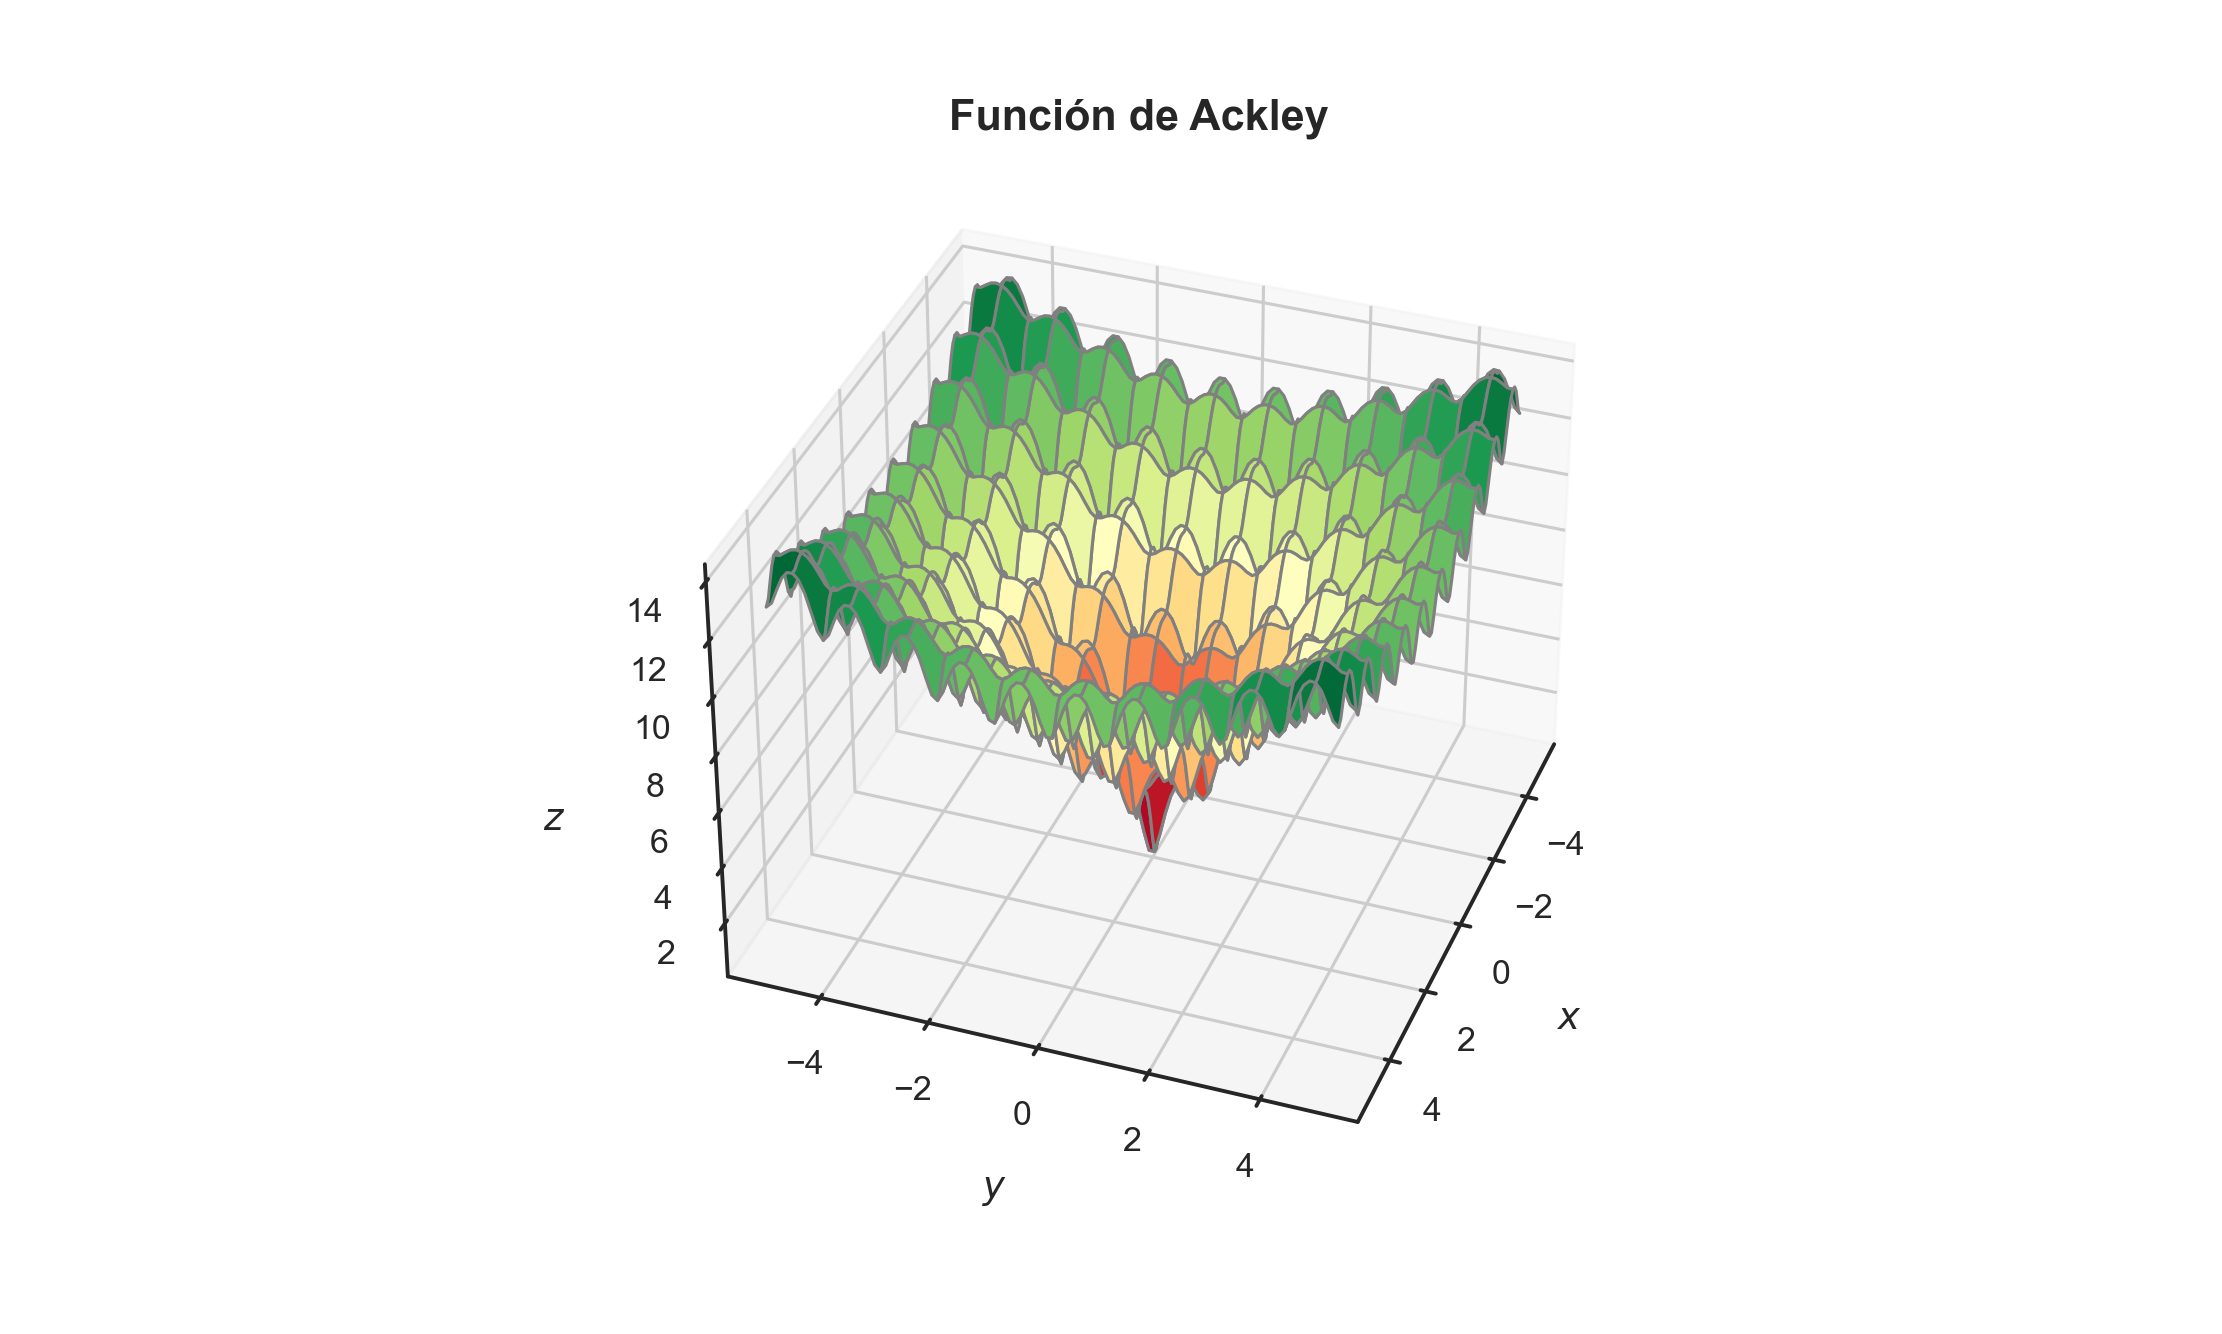

In [91]:
# Graficamos la superficie resultante de esta función.
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=5, cstride=5, edgecolor="gray", cmap='RdYlGn')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$", fontsize=12, labelpad=10)
ax.set_title(
    'Función de Ackley', fontsize=14, fontweight="bold", pad=10
)
ax.view_init(35, 20);

<IPython.core.display.Javascript object>


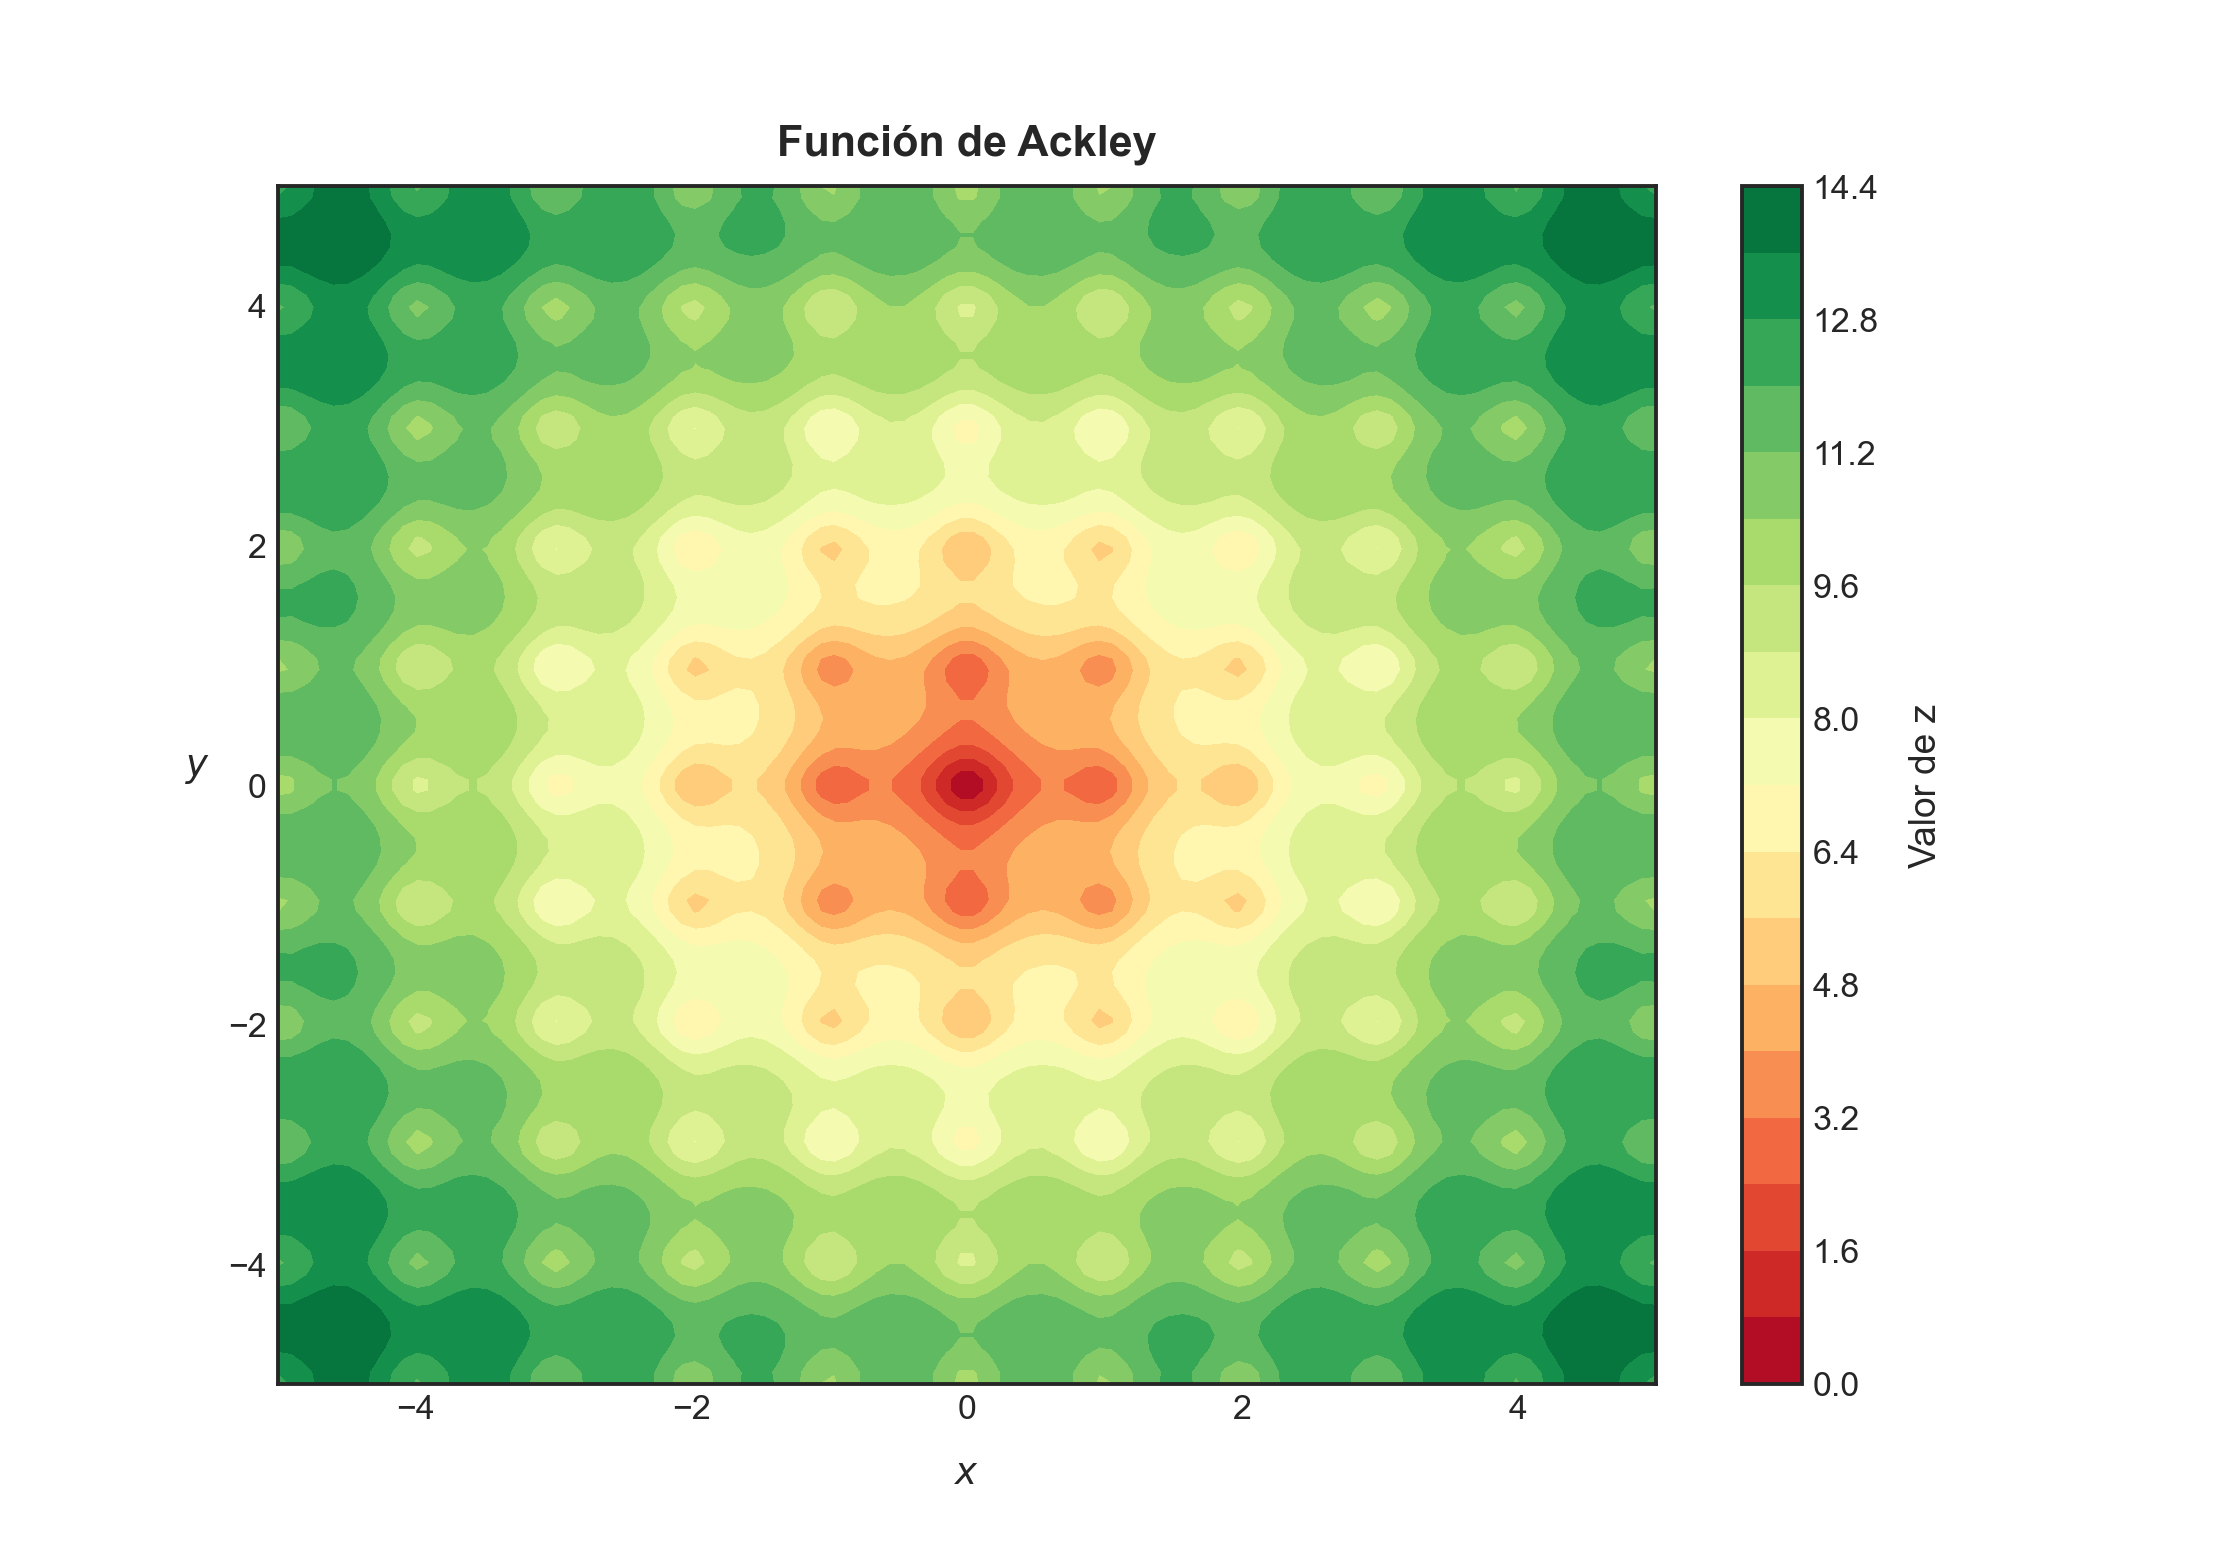

In [92]:
# Y creamos un gráfico de contorno completo para visualizar este mínimo global en 2D.
fig, ax = plt.subplots(figsize=(10, 7))
p = ax.contourf(X, Y, Z, levels=20, cmap='RdYlGn')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10, rotation=0)
ax.set_title(
    'Función de Ackley', fontsize=14, fontweight="bold", pad=10
)
cb = plt.colorbar(p)
cb.set_label("Valor de z", fontsize=12, labelpad=10);

Como podemos observar, la función de Ackley tiene su mínimo global en el origen, con un valor igual a cero, y una enorme cantidad de mínimos locales. Nuestra tarea será probar una serie de algoritmos particulares sobre esta función, a modo de benchmarking, a fin de comparar su rendimiento y sacar algunas conclusiones con respecto a sus ventajas y desventajas. También probaremos estos algoritmos en varios problemas restringidos que son famosos en el ámbito de la optimización matemática (como el *problema del vendedor viajero*).

### Algoritmo de evolución diferencial.
El algoritmo de evolución diferencial (DE, del inglés *differential evolution*) corresponde a una metaheurística que permite determinar el mínimo global de una función objetivo por medio del mejoramiento por etapas de un conjunto de soluciones candidatas, sin realizar ningún tipo de supuesto (o muy pocos) con respecto al problema subyacente, y sobre un espacio de búsqueda arbitrariamente grande.

El algoritmo de evolución diferencial tiene varias variantes, pero su versión más básica consta de un conjunto finito de soluciones candidatas (es decir, puntos en $\mathbb{R}^{n}$) que suelen denominarse como *agentes*. Dado un espacio de búsqueda, que a su vez corresponde a un entorno finito relativo al mínimo global de una función objetivo, se define un *itinerario* de movimiento de estos agentes mediante el uso de ecuaciones que permiten actualizar sus posiciones, iteración a iteración. Si la posición $k+1$ de un agente es *mejor* que la posición $k$ (es decir, la función objetivo retorna un valor menor, en el caso de un problema de minimización, o mayor, en el caso de un problema de maximización), dicha posición se acepta y pasa a formar parte de la *población* de agentes. De lo contrario, es descartada. Este proceso se repite una y otra vez hasta que, eventualmente, el algoritmo converja al extremo global de la función objetivo (o, al menos, eso esperamos).

Formalmente, sea $f:U\subseteq \mathbb{R}^{n} \longrightarrow \mathbb{R}$ una función definida en un conjunto abierto $U$ de $\mathbb{R}^{n}$, que deseamos minimizar. Esta función toma como argumento una solución candidata y retorna un valor que indica la calidad de dicha solución. Asumimos que las derivadas parciales de $f$ no son conocidas (o son computacionalmente infactibles de ser evaluadas). Nuestro objetivo es encontrar un valor $\mathbf{m}\in U$ para el cual $f(\mathbf{m})\leq f(\mathbf{p})$ para todo $\mathbf{p}$ en el espacio de búsqueda.

Sea $\mathbf{x}\in U$ una solución candidata (agente) en una población de dichas soluciones. La versión más sencilla del algoritmo de evolución diferencial puede entonces describirse como sigue:

- **Paso 1:** Escogemos los siguientes hiperparámetros: $\mathrm{NP}\geq 4$, $\mathrm{CR}\in [0, 1]$ y $F\in [0, 2]$. $\mathrm{NP}$ es el tamaño de la población de agentes, siendo $10n$ un valor típico para este hiperparámetro, donde $n$ es la dimensión del dominio de la función objetivo; $\mathrm{CR}$ es un hiperparámetro conocido como *probabilidad de cruza* o *crossover*, cuyo valor típicamente se setea en $\mathrm{CR}=0.7$; y $F$ es un hipeparámetro conocido como *peso diferencial* o *factor de mutación*, cuyo valor suele setearse en $F=0.8$. La tasa de convergencia (y la misma convergencia) del algoritmo de evolución diferencial dependen enormemente de la elección de estos hiperparámetros.

- **Paso 2:** Inicializamos los agentes en una posición aleatoria en el espacio de búsqueda.

- **Paso 3:** Hasta que se satisfaga un criterio de detención (por ejemplo, un número máximo de iteraciones, o un valor de tolerancia diferencial entre una secuencia de soluciones alcanzadas en un número seguido de iteraciones), seguimos los siguientes pasos:

    - Para cada agente $\mathbf{x}$, tenemos:
        - Escogemos aleatoriamente tres agentes $\mathbf{a}, \mathbf{b}$ y $\mathbf{c}$, todos distintos entre ellos y el agente $\mathbf{x}$. En este setting, $\mathbf{a}$ es denominado *vector base* del algoritmo.
        - Escogemos un índice aleatorio, digamos $R\in \left\{ 1,...,n\right\}$, donde $n$ es la dimensión del dominio de la función objetivo $f$.
        - Calculamos la posición actualizada del agente, digamos $\mathbf{y}=(y_{1},\dots ,y_{n})$, como sigue:
            - Para cada $i\in \left\{ 1,...,n\right\}$, escogemos un número uniformemente distribuido $r_{i}\sim U\left( 0,1\right)$.
            - Si $r_{i}<\mathrm{CR}$ o $i=R$, entonces seteamos $y_{i}=a_{i}+F(b_{i}-c_{i})$. De otro modo, ponemos $y_{i}=x_{i}$.
        - Si $f(\mathbf{y})\leq f(\mathbf{x})$, entonces reemplazamos el agente $\mathbf{x}$ con la solución candidata mejorada (o equivalente) $\mathbf{y}$.
- **Paso 4:** Seleccionamos el agente que entregue los mejores resultados para $f$ (es decir, el que retorne un menor valor de todos ellos), y lo retornamos como la mejor solución candidata durante esta iteración.

**Ejemplo 3.2 - Una implementación desde cero del algoritmo de evolución diferencial:** Algo fascinante del algoritmo de evolución diferencial, además, por supuesto, de su potencia, es su simplicidad, ya que si bien existen librerías que incluyen dentro del típico toolbox de optimización a este algoritmo (`scipy.optimize` es una de ellas), puede implementarse desde cero en sólo unas pocas líneas de código. En el bloque de código siguiente, mostraremos su implementación utilizando un esquema conocido como *rand/1/bin* (que comentaremos después), usando como base solamente a la librería **Numpy**. Para ello, definiremos la función de Ackley en Python de forma tal que ésta únicamente reciba a un objeto de tipo `numpy.ndarray` como entrada:

In [93]:
# Definimos la función de Ackley, evaluable para un input de dimensión arbitraria x.
def ackley(x):
    
    # Recuperamos los parámetros geométricos asociados a la función de Ackley.
    x = np.array(x)
    n = len(x)
    c = 2*np.pi
    
    # Fragmentamos las sumas que componen esta función.
    sum1 = np.sum(x**2)
    sum2 = np.sum(np.cos(c*x))
    
    # Y armamos los términos subyacentes.
    term1 = -20 * np.exp(-0.2 * np.sqrt(sum1/n))
    term2 = -np.exp(sum2/n)
    
    # Y construimos el resultado final.
    z = 20 + np.exp(1) + term1 + term2
    return z

A fin de hermosear un poco nuestra implementación le agregaremos una barra de progreso al procedimiento iterativo por medio de la función `tqdm.tqdm()`, y usaremos el objeto `Callable` del módulo **Typing** para darle sentido a la documentación de los tipos de argumento que imputaremos a nuestra función:

In [94]:
# Importamos algunas funciones para hermosear nuestra función.
from tqdm import tqdm
from typing import Callable

In [95]:
# Definimos una función que emulará el trabajo del algoritmo de evolución diferencial.
def differential_evolution(
    fobj: Callable, 
    bounds: list, 
    mut: float=0.8, 
    crossp: float=0.7, 
    popsize: int=20, 
    its: int=1000,
):
    """
    Una función que replica la aplicación de un caso sencillo del algoritmo de evolución diferencial.
    Es aplicable a problemas no restringidos y también restringidos, siempre que las restricciones
    del problema sean condiciones de frontera.
    
    Parámetros:
    -----------
    fobj : Función objetivo a minimizar, en forma de callable. Puede ser una función definida por el
    usuario o una función anónima, siempre que tenga como único argumento un arreglo unidimensional
    de valores.
    bounds : Una lista que contiene tantas tuplas como restricciones apliquen al problema. Las tuplas
    serán del tipo (ai, bi), donde ai y bi representan las cotas inferior y superior, respectivamente,
    que definen a estas restricciones.
    mut : Valor del factor de mutación.
    crossp : Valor de la probabilidad de crossover.
    popsize : Valor del número total de agentes que hacen de soluciones candidatas al problema.
    its : Número de iteraciones a realizar por el algoritmo.
    
    Retorna:
    --------
    Un generador a partir del cual podemos estudiar los resultados obtenidos por el algoritmo.
    """
    #########################################
    ########### 1. Inicialización ###########
    #########################################
    
    # Determinamos el total de restricciones.
    dimensions = len(bounds)
    
    # Generamos la población inicial de soluciones candidatas.
    pop = np.random.rand(popsize, dimensions)
    
    # Caracterizamos los límites del espacio de soluciones factibles.
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    
    #########################################
    ############# 2. Evaluación #############
    #########################################
    
    # Normalización de la población inicial.
    pop_denorm = min_b + pop * diff
    
    # Evaluación de la función objetivo sobre los agentes.
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    
    # Escogemos el agente que nos da el mínimo valor de la función objetivo.
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    
    # Generamos nuestra estrategia de mejora de las soluciones por medio de un ciclo.
    for i in tqdm(range(its), desc="Generando búsqueda de solución óptima"):
        for j in range(popsize):
            
            #########################################
            ###### 3. Mutación y recombinación ######
            #########################################
            
            # Ordenamos los índices que componen nuestro set de agentes.
            idxs = [idx for idx in range(popsize) if idx != j]
            
            # Seleccionamos aleatoriamente tres de estos agentes.
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
            
            # Aplicamos el factor de mutación, a fin de crear un vector 'mutante'.
            mutant = np.clip(a + mut * (b - c), 0, 1)
            
            # Creamos un vector de ensayo aplicando nuestra porbabilidad de crossover.
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            
            #########################################
            ############# 4. Reemplazo ##############
            #########################################
            
            # Normalizamos el vector de ensayo y evaluamos la función objetivo sobre las
            # nuevas soluciones candidatas.
            trial_denorm = min_b + trial * diff
            f = fobj(trial_denorm)
            
            # Chequeamos la calidad de las nuevas soluciones y procedemos.
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
                    
        yield best, fitness[best_idx]

Vamos a explicar línea por línea el código anterior. Sin embargo, a fin de tener una idea del resultado al que llegaremos, probaremos nuestra implementación de inmediato. Determinaremos el mínimo global de la función de Ackley, considerando un problema restringido tal que $-5<x_{i}<5$, donde $x_{i}$ es la $i$-ésima componente del vector $\mathbf{x}\in \mathbb{R}^{n}$ que es la entrada de la función de Ackley. Puntualmente, resolveremos el caso $n=8$, que ya de por sí es bastante complicado a nivel de cálculo simbólico:

In [96]:
# Determinamos el mínimo global de la función de Ackley en un espacio de 8 dimensiones,
# considerando 8 condiciones de frontera: -5 < xi < 5, donde xi es la i-ésima coordenada
# del vector x.
result = list(
    differential_evolution(
        fobj=ackley,
        bounds=[(-5, 5)]*8,
        its=5000
    )
)

Generando búsqueda de solución óptima: 100%|███| 5000/5000 [00:08<00:00, 583.39it/s]


In [97]:
# Mostramos la solución esitmada en pantalla.
print(f"Solución óptima: {np.around(result[-1][0], 4)}")
print(f"Valor de la función objetivo: {np.around(result[-1][1], 3)}")

Solución óptima: [ 0.  0.  0. -0.  0.  0. -0.  0.]
Valor de la función objetivo: 0.0


Vemos pues que nuestra sencilla implementación del algoritmo de evolución diferencial ha logrado determinar el mínimo global de la función de Ackley, incluso a pesar de la enorme cantidad de mínimos locales existentes en su recorrido. Algo que, ciertamente, puede resultar extremadamente difícil usando la función `minimize()` del módulo `scipy.optimize`.

Para entender la potencia del algoritmo y de la implementación que hemos diseñado, vamos a mostrar la progresión del proceso de búsqueda del óptimo del mismo considerando los casos $n=\left\{ 8,16,32,64\right\}$ para la función de Ackley, aprovechando que la función que hemos construido retorna un generador:

<IPython.core.display.Javascript object>


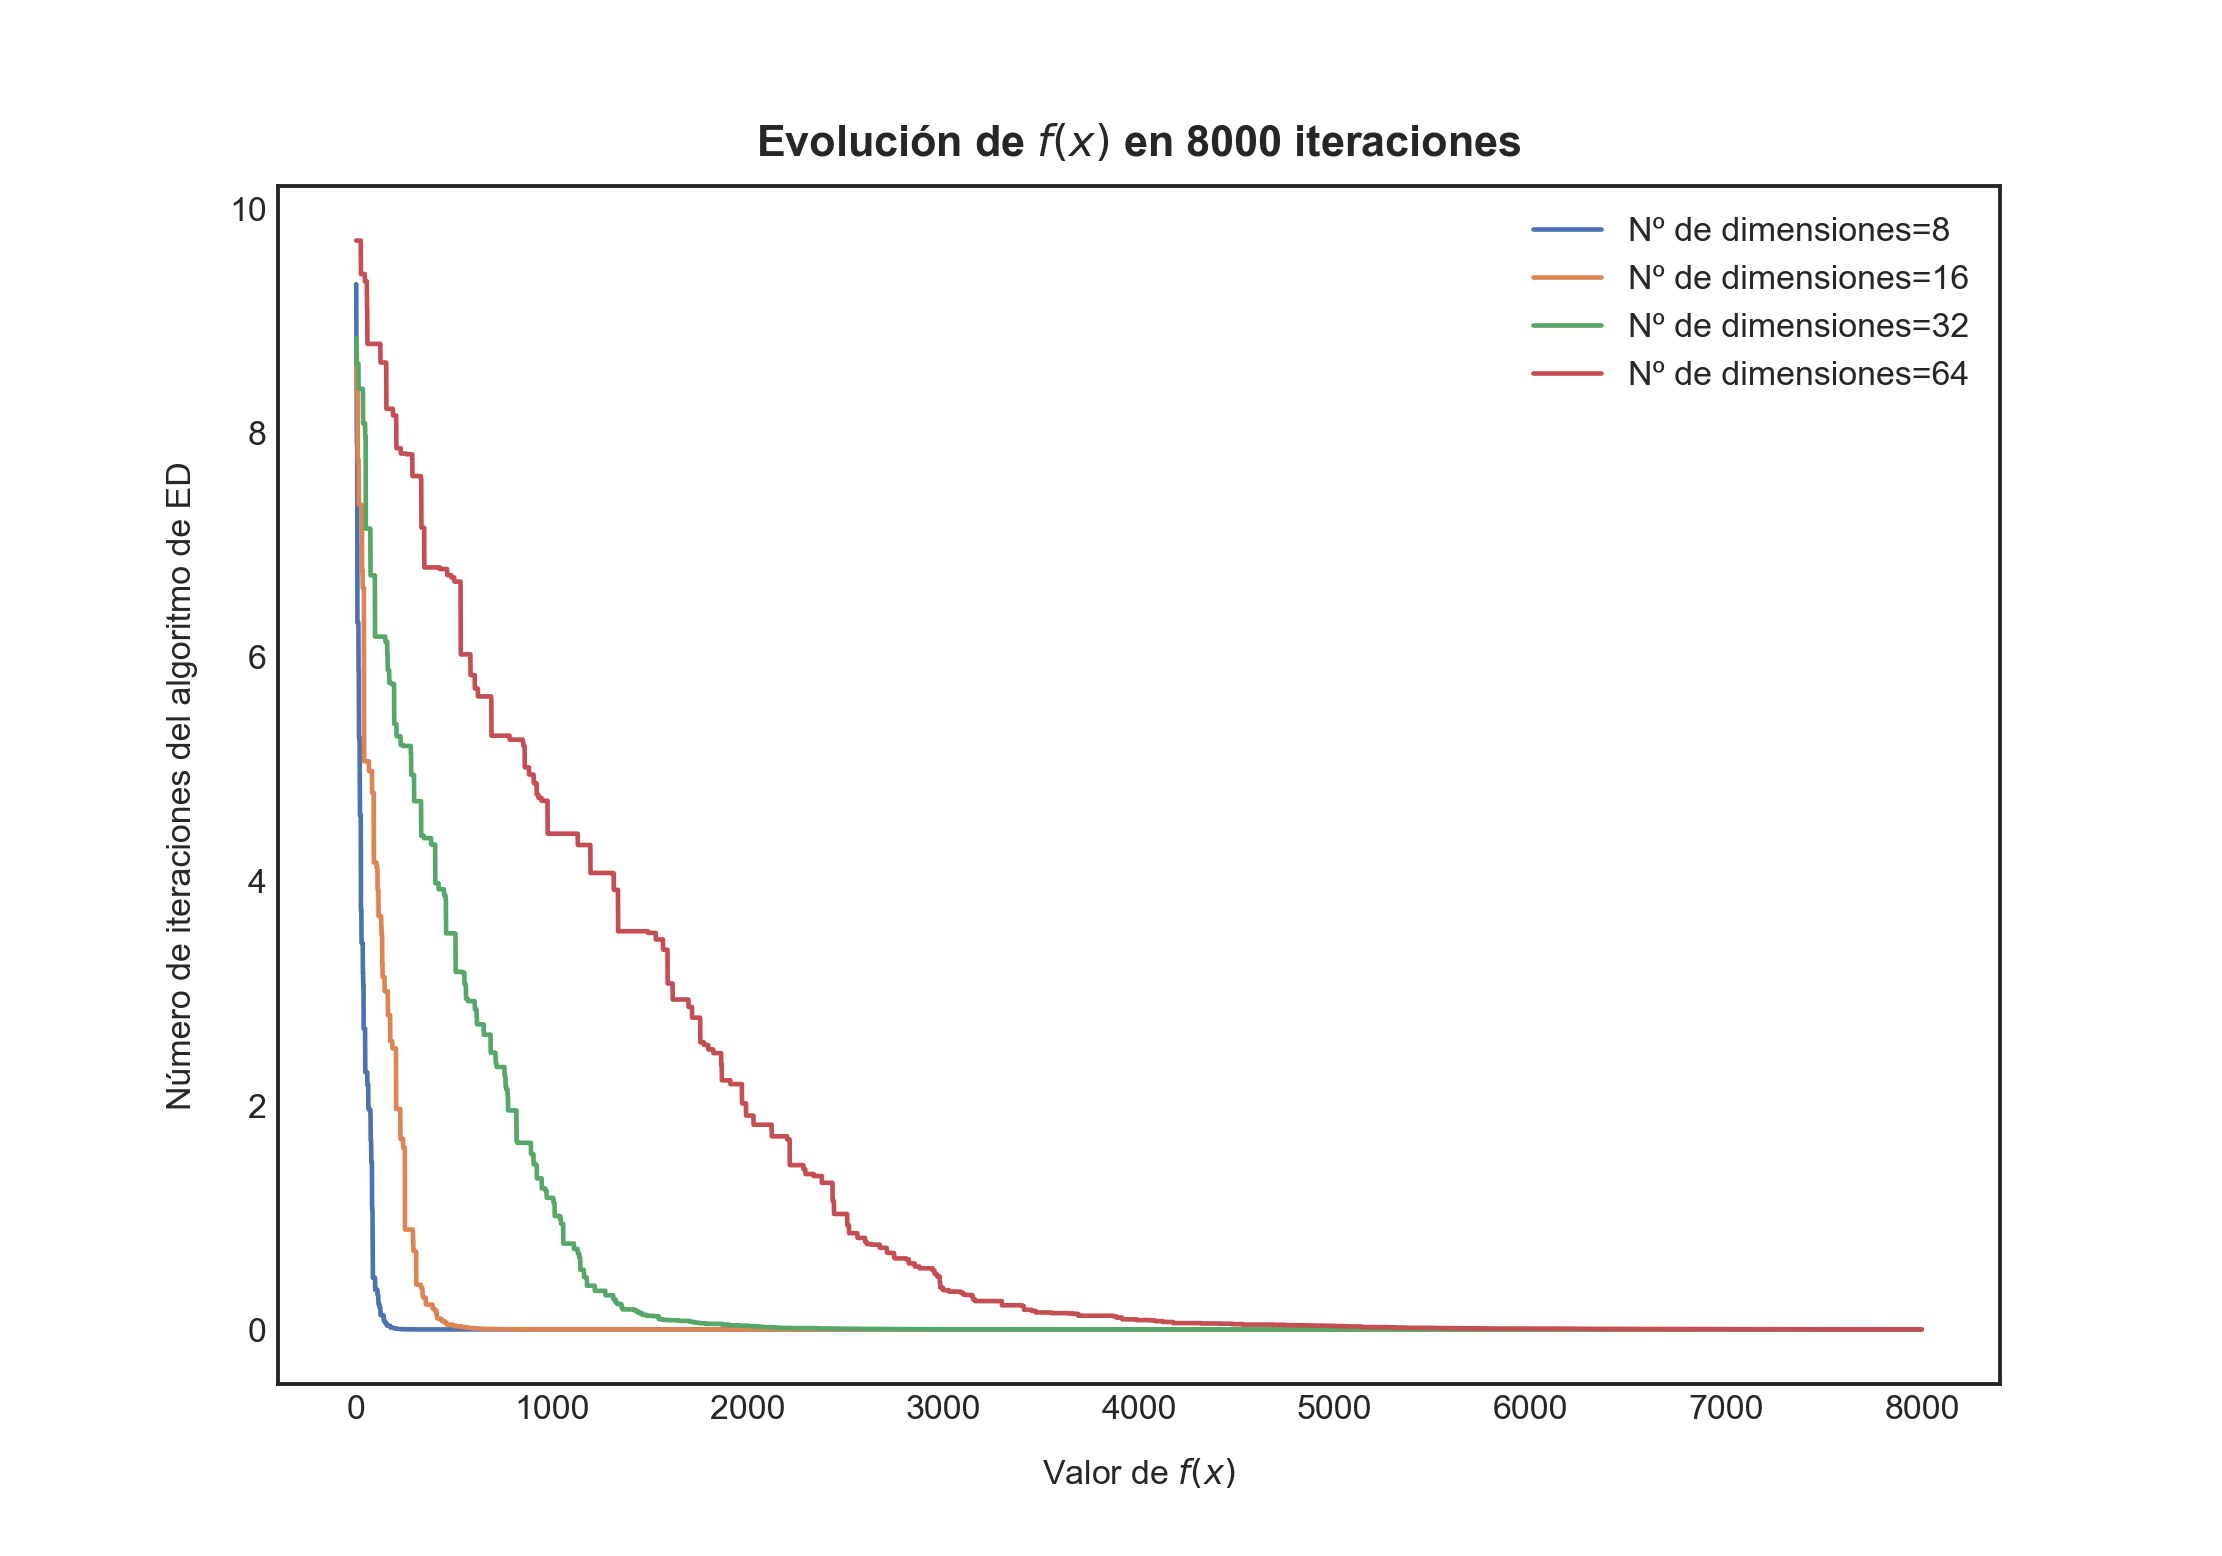

Generando búsqueda de solución óptima: 100%|███| 8000/8000 [00:14<00:00, 568.97it/s]


In [98]:
# Graficamos la progresión de nuestro algoritmo considerando los casos para los cuales la
# función de Ackley se define sobre un dominio de 8, 16, 32 y 64 dimensiones. El espacio de
# búsqueda es, nuevamente, -5 < xi < 5.
plt.figure(figsize=(10, 7))
for dj in [8, 16, 32, 64]:
    result_j = list(differential_evolution(ackley, [(-5, 5)] * dj, its=8000))    
    x, f = zip(*result_j)
    plt.plot(f, label='Nº de dimensiones={}'.format(dj))
plt.legend(loc="best")
plt.title(r"Evolución de ${f(x)}$ en 8000 iteraciones", fontsize=14, fontweight="bold", pad=10)
plt.xlabel(r"Valor de ${f(x)}$", labelpad=10, fontsize=11)
plt.ylabel("Número de iteraciones del algoritmo de ED", labelpad=10, fontsize=11);

Podemos observar que el número de iteraciones necesarias para determinar el óptimo es altamente dependiente de la dimensión del dominio de la función objetivo. En todos los casos, el algoritmo de evolución diferencial es capaz de llegar al mínimo global de la función de Ackley.

Nuestra implementación del algoritmo de evolución diferencial merece una explicación. Observemos pues que, como mínimo, éste requiere de los argumentos `fobj` y `bounds`, que corresponden a la función 𝑓(𝑥) que deseamos optimizar, y a las restricciones del problema, y que están limitadas a ser únicamente condiciones de frontera. A nivel de código, `fobj` puede ser una función definida ya sea mediante el constructor `def`, o incluso anónimamente vía `lambda`. Por ejemplo, supongamos que queremos minimizar la función $f$, definida como $f\left( x_{1},...,x_{n}\right)  =\sum\nolimits^{n}_{i=1} x^{2}_{i}/n$. Si `x` es un arreglo de **Numpy**, podemos definir la variable `fobj` como:

`fobj = lambda x: sum(x**2)/len(x)`

Por otro lado, `bounds` corresponde a una lista con las cotas superior e inferior para cada uno de los parámetros que conforman la función objetivo. Por ejemplo, si `bounds` está definido por la lista `[(-5, 5), (-5, 5), (-5, 5), (-5, 5)]`, ello significa que cada variable $x_{i}$, para $i=1,...,4$, es tal que $-5\leq x_{i}\leq 5$.

El algoritmo de evolución diferencial, como su nombre sugiere, es un tipo método de computación evolutiva. Este tipo de algoritmos utilizan mecánicas inspiradas por la teoría de la evolución, en la cual los individuos más adecuados de una población (esto es, los más aptos para sobrevivir) son aquellos que generan una prole más numerosa, la cual, a su vez, hereda esta aptitud que tienen sus padres. Esto permite que la nueva generación sea también apta para sobrevivir y, de esta manera, la población mejora cada vez, generación tras generación. Esto es posible debido a los diferentes mecanismos intrínsecos a la naturaleza propiamente tal, tales como mutaciones, recombinaciones y selecciones, entre otras. Los algoritmos evolutivos aplican algunos de estos principios a fin de que una solución inicial de un problema evolucione a otra mejor.

De esta manera, en el algoritmo de evolución de diferencial, las soluciones son representadas como poblaciones de individuos (o vectores), donde cada individuo es representado por un conjunto de números reales. Tales números reales son los valores de los parámetros que constituyen una función objetivo que queremos minimizar, y dicha función mide qué tan bueno es un individuo. Los pasos principales del algoritmo de evolución diferencial son: Inicialización de la población, mutación, recombinación, reemplazo y evaluación. Veremos como funcionan cada uno de estos pasos ejemplificando su aplicación en la minimización de la función $f\left( x_{1},...,x_{n}\right)  =\sum\nolimits^{n}_{i=1} x^{2}_{i}/n$ para $n=4$. Para este ejemplo, consideraremos las restricciones $-5\leq x_{i}\leq 5$.

Las componentes de nuestro problema son:

In [99]:
# Función objetivo.
fobj = lambda x: sum(x**2)/len(x)

In [100]:
# Restricciones.
bounds = [(-5, 5)] * 4

**I.- Inicialización:** El primer paso en cualquier algoritmo evolutivo es la creación de una población con una cantidad determinada de individuos, que denominamos en nuestro código como `popsize`. Un individuo es sólo una instanciación de los parámetros de la función `fobj`. Al comienzo, el algoritmo inicializa los individuos mediante la generación de valores aleatorios para cada parámetro dentro de los límites definidos por las restricciones. Por conveniencia, en esta implementación se generan números aleatorios entre 0 y 1, y luego se escalan los valores de cada variable para obtener las evaluaciones correspondientes:

In [101]:
# Primeras líneas del algoritmo.
popsize = 10
dimensions = 4
pop = np.random.rand(popsize, dimensions)

In [102]:
# La población inicial de agentes (10 en total).
pop

array([[0.32017308, 0.79081752, 0.72226904, 0.0854453 ],
       [0.35882562, 0.42897061, 0.1858728 , 0.60675022],
       [0.340925  , 0.0763342 , 0.86131233, 0.90736329],
       [0.45014274, 0.88380808, 0.76164755, 0.9414862 ],
       [0.12538769, 0.5536423 , 0.91075782, 0.31436915],
       [0.80803995, 0.92965643, 0.71878893, 0.19216089],
       [0.57499576, 0.73844686, 0.47499265, 0.30193148],
       [0.45125476, 0.68815941, 0.03230203, 0.98684938],
       [0.29065321, 0.80662577, 0.7652287 , 0.01988999],
       [0.9036467 , 0.75370586, 0.5826416 , 0.79570953]])

Esto genera nuestra población inicial de 10 vectores aleatorios. Cada componente `x[i]` está normalizada entre 0 y 1. Utilizaremos las cotas que definen las restricciones del problema de optimización para de-normalizar cada componente, solamente para evaluarlas con `fobj`.

**II.- Evaluación:** El siguiente paso es aplicar una transformación lineal a fin de convertir cada componente desde el rango $[0, 1]$ al rango `[min, max]`. Esto es necesario solamente para evaluar cada vector en la función objetivo `fobj`:

In [103]:
# De-normalización.
min_b, max_b = np.asarray(bounds).T
diff = np.fabs(min_b - max_b)
pop_denorm = min_b + pop * diff

In [104]:
# Los agentes de-normalizados.
pop_denorm

array([[-1.79826925,  2.90817517,  2.22269044, -4.14554699],
       [-1.41174378, -0.71029389, -3.14127204,  1.06750219],
       [-1.59074997, -4.23665797,  3.61312327,  4.07363288],
       [-0.49857263,  3.83808075,  2.61647549,  4.41486198],
       [-3.74612311,  0.536423  ,  4.1075782 , -1.85630855],
       [ 3.08039946,  4.29656435,  2.18788931, -3.07839108],
       [ 0.7499576 ,  2.38446858, -0.25007355, -1.9806852 ],
       [-0.48745238,  1.88159407, -4.67697968,  4.86849383],
       [-2.09346788,  3.06625771,  2.65228698, -4.80110007],
       [ 4.03646705,  2.53705863,  0.82641596,  2.95709534]])

En este punto, ya tenemos nuestra población inicial de 10 vectores, y podemos evaluarlos utilizando nuestra función objetivo `fobj`. Aunque estos puntos son esencialmente puntos aleatorios en el espacio definido por el dominio de la función, algunos de ellos son mejores que otros, en sentido de que generan valores más pequeños de $f(x_{1},...,x_{4})$. Evaluémoslos:

In [105]:
# Evaluación de la función objetivo.
for ind in pop_denorm:
    print(ind, fobj(ind))

[-1.79826925  2.90817517  2.22269044 -4.14554699] 8.454291940966204
[-1.41174378 -0.71029389 -3.14127204  1.06750219] 3.376172209330008
[-1.59074997 -4.23665797  3.61312327  4.07363288] 12.532225203917768
[-0.49857263  3.83808075  2.61647549  4.41486198] 10.32909720837701
[-3.74612311  0.536423    4.1075782  -1.85630855] 8.659817034595367
[ 3.08039946  4.29656435  2.18788931 -3.07839108] 10.553169306890126
[ 0.7499576   2.38446858 -0.25007355 -1.9806852 ] 2.558444373219105
[-0.48745238  1.88159407 -4.67697968  4.86849383] 12.338594277072534
[-2.09346788  3.06625771  2.65228698 -4.80110007] 10.967433052397272
[4.03646705 2.53705863 0.82641596 2.95709534] 8.039277216740622


Y nos quedamos con el punto que genera el menor valor de todos estos agentes:

In [106]:
# Obtenemos el valor mínimo de todos los evaluados.
fitness = np.asarray([fobj(ind) for ind in pop_denorm])
best_idx = np.argmin(fitness)
best = pop_denorm[best_idx]

In [107]:
# Mostramos el mejor de estos agentes en pantalla.
best

array([ 0.7499576 ,  2.38446858, -0.25007355, -1.9806852 ])

**III.- Mutación y recombinación:** ¿Cómo es posible que el algoritmo, a partir de esta solución inicial, encuentre una buena solución al problema general? Esta es, con toda razón, la parte interesante del algoritmo. Ahora, cada vector `pop[j]` en la población inicial (donde $0\leq$ `j` $\leq 9$), seleccionamos otros tres vectores que no sean el actual, y los denominamos como `a`, `b` y `c`. Así, empezamos con el primer vector, `pop[0]` (llamado vector objetivo) y, a fin de seleccionar `a`, `b` y `c`, lo que hacemos primero es generar una lista con los índices que describen las posiciones de cada vector en la población inicial, excluyendo el actual (`j = 0`):

In [108]:
# Escogemos nuestro vector objetivo.
j = 0
target = pop[j] # (j = 0)
idxs = [idx for idx in range(popsize) if idx != j] # (j = 0)

In [109]:
# Mostramos los índices en pantalla.
idxs

Y luego, se escogen aleatoriamente tres de estos índices (sin repetición):

In [110]:
# Seleccionamos al alzar tres de estos índices.
selected = np.random.choice(idxs, 3, replace=False)

In [111]:
# Mostramos la selección en pantalla.
selected

array([6, 7, 5])

Aquí tenemos a nuestros candidatos (tomados de la población normalizada):

In [112]:
# Mostramos los candidatos.
pop[selected]

array([[0.57499576, 0.73844686, 0.47499265, 0.30193148],
       [0.45125476, 0.68815941, 0.03230203, 0.98684938],
       [0.80803995, 0.92965643, 0.71878893, 0.19216089]])

In [113]:
# Y los asignamos a las variables a, b y c.
a, b, c = pop[selected]

Ahora podemos crear un vector mutante combinando `a`, `b` y `c` ¿Cómo? Calculando la diferencia (lo que justifica el nombre de evolución diferencial) entre `b` y `c`, y sumando esas diferencias a a después de multiplicarlas por una constante llamada **factor de mutación** (o peso diferencial) (definido por la variable `mut`). Un factor de mutación mayor incrementa el radio de búsqueda del algoritmo, pero puede generar ralentizaciones importantes en su velocidad de convergencia. Los valores para `mut`, en general, suelen escogerse a partir de un intervalo aproximado de `[0.5, 2.0]`. Para este ejemplo en particular, utilizamos el valor `mut = 0.8`:

In [114]:
# Creamos un vector mutante.
mut = 0.8
mutant = a + mut * (b - c)
mutant

array([ 0.28956761,  0.54524924, -0.07419687,  0.93768227])

Notemos que, después de esta operación, podemos terminar con un vector que no se encuentra normalizado. El siguiente paso es arreglar este problema, y para ello existen dos técnicas en general: Ya sea mediante la generación de un nuevo valor aleatorio en el intervalo `[0, 1]`, o bien, quitando al número (o los números) no normalizado del intervalo, de manera tal que los valores mayores que 1 sean iguales a 1, y los valores menores que 0 sean iguales a 0. La segunda opción, en una implementación desde cero del algoritmo, es preferible, ya que puede hacerse mediante una única línea de código vía la función `np.clip()` de **Numpy**:

In [115]:
# Clipping de valores no normalizados.
np.clip(mutant, 0, 1)

array([0.28956761, 0.54524924, 0.        , 0.93768227])

Ahora que ya tenemos nuestro vector mutante, el siguiente paso es la recombinación, el cual se trata fundamentalmente de mezclar la información de este mutante con la información del vector original para crear un **vector de ensayo**. Para cada posición, decidimos (con alguna probabilidad adjunta, que denominamos **probabilidad de crossover o cruza** y en nuestra implementación se ha nombrado como `crossp`) si un determinado número será reemplazado o no por un mutante en la misma posición. Para generar estos llamados puntos de cruza (o crossover). Este método se conoce en la práctica como **crossover binomial**, ya que el número de posiciones seleccionadas sigue una distribución binomial:

In [116]:
# Buscamos los puntos de cruza.
crossp = 0.7
cross_points = np.random.rand(dimensions) < crossp
cross_points

array([False,  True,  True,  True])

Todas las posiciones que cumplen con un valor Booleano `True` son las que reemplazaremos por las mutaciones correspondientes. Para realizar este reemplazo, utilizamos la función `np.where()` de **Numpy**:

In [117]:
# Creamos un vector de ensayo.
trial = np.where(cross_points, mutant, pop[j]) # j = 0

In [118]:
# Mostramos dicho vector en pantalla.
trial

array([ 0.32017308,  0.54524924, -0.07419687,  0.93768227])

**IV.- Reemplazo:** Después de generar nuestro nuevo vector de ensayo, necesitamos de-normalizarlo y evaluarlo para verificar qué tan bueno es en relación al objetivo del problema (minimizar el valor de la función objetivo). Si este mutante es mejor que el vector actual (`pop[0]`), entonces lo reemplazamos por dicho mutante:

In [119]:
# Vector de ensayo de-normalizado.
trial_denorm = min_b + trial * diff

In [120]:
# Mostramos este vector.
trial_denorm

array([-1.79826925,  0.45249237, -5.74196873,  4.37682272])

In [121]:
# Evaluamos la función objetivo en este punto.
fobj(trial_denorm)

En este caso, el vector de ensayo nos arroja un valor que puede ser peor o mejor que el valor original. En caso de ser peor, se preserva el vector objetivo y se descarta el vector de ensayo. Luego, todos los pasos anteriores se repiten para las posiciones restantes del vector de población (del 1 al 9), lo que completa la primera iteración del algoritmo. Después de este proceso, algunos de los vectores originales de la población serán reemplazados por otros vectores mutados mejores, y luego de muchas iteraciones, la población completa, eventualmente (o eso esperamos...), convergerá a la solución. ◼

Por supuesto, existen variaciones del algoritmo de evolución diferencial, cada una de las cuales tiene sus pros y contras. El esquema utilizado en nuestra implementación desde cero es llamado `rand/1/bin` porque los vectores que constituyen la población inicial son escogidos aleatoriamente, utilizamos solamente una diferencia vectorial y aplicamos una estrategia de cruza que sigue una distribución binomial. Pero hay otras variantes, que pueden definirse en términos del esquema de mutación:

- `rand/1`: $y_{i}=a_{i}+F\left( b_{i}-c_{i}\right)$.
- `rand/2`: $y_{i}=a_{i}+F\left( b_{i}-c_{i}+d_{i}-e_{i}\right)$.
- `best/1`: $y_{i}=x^{\star }+F\left( b_{i}-c_{i}\right)$.
- `best/2`: $y_{i}=x^{\star }+F\left( b_{i}-c_{i}+d_{i}-e_{i}\right)$.
- `rand-to-best/1`: $y_{i}=a_{i}+F_{1}\left( b_{i}-c_{i}\right)  +F_{2}\left( x^{\star }-a_{i}\right)$.

Donde $x^{\star }$ es el agente que produce la mejor solución en la población, $d_{i}$ y $e_{i}$ son más agentes, y $F_{1}$ y $F_{2}$ son dos factores de mutuación implementados en la estrategia `rand-to-best/1`. O bien, mediante el esquema de cruza o crossover:

- Binomial (`bin`): Cruza debido a experimentos binomiales independientes. Cada componente del vector tiene una probabilidad $p$ ser reemplazado por la componente respectiva del vector mutante.
- Exponencial (`exp`): Corresponde a un operador de cruza de dos puntos, donde dos localizaciones del vector son escogidas aleatoriamente de manera que $n$ números consecutivos del vector (entre ambas localizaciones) se tomen del vector mutante.

La combinación de estos tipos de esquemas permite definir diferentes configuraciones para el algoritmo de evolución diferencial, tales como `rand/2/exp`, `best/1/exp`, `rand/2/bin`, etc. No existe una estrategia de optimización que permita manejar cualquier situación posible, por lo que el tipo de esquema es evidentemente un hiperparámetro asociado a la optimización, sumado, por supuesto, a la elección de las probabilidades asociadas de crossover, factores de mutación, etc.

**Ejemplo 3.3 - Implementación del algoritmo de evolución diferencial en `scipy.optimize`:** La implementación que hemos construido desde cero en el Ejemplo 3.2 es, de hecho, bastante eficiente y capaz de hacerle frente a una gran cantidad de problemas de optimización. Sin embargo, no podemos no detenernos a revisar el uso de la implementación de este algoritmo existente en el módulo `scipy.optimize`. Usaremos dicha implementación, igualmente, para determinar el mínimo global de la función de Ackley, considerando las restricciones $-5\leq x_{i}\leq 5$, para $i=\left\{ 1,2\right\}$.

En `scipy.optimize`, el algoritmo de evolución diferencial se implementa mediante la función `differential_evolution()`. Como tiene el mismo nombre que nuestra implementación casera, la importaremos con un alias:

In [122]:
# Importamos la implementación de scipy.optimize.
from scipy.optimize import differential_evolution as diff_ev

Esta función se comporta casi igual que `minimize()`, y funciona bajo la misma lógica:

In [123]:
# Definimos las restricciones del problema.
bounds = [[-5, 5], [-5, 5]]

In [124]:
# Resolvemos el problema.
result = diff_ev(func=ackley, bounds=bounds)

In [125]:
# Mostramos la solución óptima del problema.
print(f"Solución óptima: {np.around(result['x'], 4)}")
print(f"Valor mínimo de la función objetivo: {np.around(result['fun'], 4)}")

Solución óptima: [0. 0.]
Valor mínimo de la función objetivo: -0.0


Y hemos resuelto fácilmente el problema. ◼

Por supuesto, si deseamos un mayor control, la implementación del algoritmo de evolución diferencial de `scipy.optimize` cuenta con una serie de argumentos de utilidad para especificar varios de los hiperparámetros que hemos comentado previamente:


- `strategy`: Permite establecer la estrategia de optimización del algoritmo, comentada anteriormente. Por defecto, se implementa la estrategia de tipo `"best1bin"`. Sin embargo, también están disponibles otras como `"best1exp"`, `"rand1exp"`, etc., y que siguen ka lógica comentada previamente.
- `popsize`: Permite determinar el tamaño de la población de individuos o agentes donde se ejecuta el algoritmo. Por defecto, como establecimos en un principio, la población tiene un tamaño igual a `popsize * len(x)` individuos, donde `x` es el vector de variables que determina la dimensión del problema.
- `mutation`: El factor de mutación (o peso diferencial). Dicha constante, en la implementación de `scipy.optimize`, debe ser un valor entre 0 y 2. También puede especificarse por medio de una tupla del tipo `(min, max)`, para la cual el algoritmo escogerá cada factor por medio de una función de oscilación aleatoria entre dichos valores.
- `recombination`: La constante de recombinación, que equivale a la ya mencionada probabilidad de crossover. Dicha probabilidad es un número flotante entre 0 y 1.

### Algoritmo de optimización por enjambre de partículas (PSO).
El **algoritmo de optimización por enjambre de partículas** (abreviado como **PSO**, del inglés *Particle Swarm Optimization*) corresponde a una de esas raras herramientas modernas que son cómicamente sencillas, pero capaces de generar resultados increíblemente potentes. Desarrollado en 1995 por los investigadores norteamericanos James Kennedy y Russell Eberhart, el algoritmo PSO corresponde a una rutina de optimización inspirada, al igual que el algoritmo de evolución diferencial, en conceptos de naturaleza biológica relativos al comportamiento de las bandadas de pájaros o de los cardúmenes de peces. Es apto para cualquier tipo de problema, aunque es especialmente eficaz para aquellos relacionados con modelos de machine learning, donde deseamos optimizar el output de un modelo en función de ciertas variables de control.

Como todos los algoritmos de computación evolutiva, el algoritmo PSO no garantiza la convergencia a un mínimo global, pero es capaz de realizar un sólido trabajo a la hora de desafiar conjuntos de datos de alta dimensión, no convexos y discontinuos. Por lo cual, de la misma forma en que los hicimos con el algoritmo de evolución diferencial, generaremos una implementación desde cero de este algoritmo en su forma más simple, a fin de ilustrar sus capacidades.

A continuación se presentan las únicas dos ecuaciones que constituyen la base fundamental del algoritmo PSO. Como adelanto, señalaremos que $k$ se refiere a la iteración actual, por lo cual, $k+1$ hace referencia a la iteración siguiente, y así sucesivamente:

- Posición de una partícula: $x^{i}_{k+1}=x^{i}_{k}+v^{i}_{k+1}$.
- Velocidad de una partícula: $v^{i}_{k+1}=w_{k}v^{i}_{k}+c_{1}r_{1}\left( p^{i}_{k}-x^{i}_{k}\right)  +c_{2}r_{2}\left( p^{g}_{k}-x^{i}_{k}\right)$.

Donde $x_{k}^{i}$ es la posición de una partícula $i$-ésima, $v_{k}^{i}$ es su velocidad, $p_{k}^{i}$ su mejor posición individual, $p_{k}^{g}$ es la mejor posición colectiva del enjambre completo, y $w_{k}$, $c_{1}$ y $c_{2}$ son hiperparámetros conocidos como constante de inercia, parámetro cognitivo y parámetro social, respectivamente. Finalmente, $r_{1}$ y $r_{2}$ son números aleatorios entre 0 y 1.

En la ecuación donde se define la velocidad de una partícula $i$-ésima en la iteración $k$, podemos destacar dos grupos importantes:

1. El término social: $c_{2}r_{2}\left( p^{g}_{k}-x^{i}_{k}\right)$
2. El término cognitivo: $c_{1}r_{1}\left( p^{i}_{k}-x^{i}_{k}\right)$.

Usando estas dos sencillas ecuaciones, podemos describir el flujo completo de trabajo del algoritmo PSO como sigue:

**(a) Inicialización:**

- Seteamos los hiperparámetros $k_{\mathrm{max}}$, $w_{k}$, $c_{1}$ y $c_{2}$.
- Inicializamos aleatoriamente las posiciones de las partículas.
- Inicializamos aleatoriamente las velocidades de las partículas.
- Seteamos $k=1$ (cuantía de las iteraciones).

**(b) Optimización:**

- Evaluación la función de costo $f_{k}^{i}$ en cada una de las partículas $x_{k}^{i}$.
- Si $f_{k}^{i}\leq f_{\mathrm{best}}^{i}$, entonces $f_{\mathrm{best}}^{i}=f_{k}^{i}$ y $p_{k}^{i}=x_{k}^{i}$.
- Si $f_{k}^{i}\leq f_{\mathrm{best}}^{g}$, entonces $f_{\mathrm{best}}^{g}=f_{k}^{i}$ y $p_{k}^{g}=x_{k}^{i}$.
- Si el criterio de detención que hayamos establecido en primera instancia se satisface, vamos al paso (c).
- Actualizamos todas las velocidades en el enjambre de partículas.
- Actualizamos todas las posiciones en el enjambre de partículas.
- Incrementamos el valor de $k$.
- Pasamos al paso (b1).

**(c) Terminación:** ¡Y eso es todo! En realidad, es así de simple. El concepto principal que sustenta el algoritmo PSO, el cual resulta evidente a partir de la ecuación de velocidad, es que existe una constante de balance entre tres fuerzas distintas que generan una acción sobre partícula:

* La velocidad de la partícula previa (que llamamos **inercia**).
* La distancia relativa a la mejor posición de las partículas individuales (que llamamos **fuerza cognitiva**).
* La distancia relativa a la mejor posición del enjambre colectivo de partículas (que llamamos **fuerza social**).

Estas tres fuerzas están, por ende, ponderadas por $w_{k}$, $c_{1}$ y $c_{2}$ y perturbadas aleatoriamente por $r_{1}$ y $r_{2}$. Así, dependiendo de los ponderadores respectivos, la posición del enjambre colectivo completo $p_{k}^{g}$, o la posición individual de cada partícula $p_{k}^{i}$, generarán una mayor acción sobre la(s) partícula(s) respectiva(s) y definirán la dirección global de movimiento del enjambre. Esto ocurre, por supuesto, asumiendo que la velocidad inicial de las partículas (inercia) no generará que una determinada partícula oscile en primer lugar. Con frecuencia, puede ocurrir que notemos que el algoritmo no converge, y aquello puede deberse a que la constante de inercia tiene un valor demasiado alto, por lo que debería reducirse a fin de acelerar la tasa de convergencia del algoritmo. 

Debemos tener en consideración que la inercia de una partícula es similar a un arma de doble filo. Si estamos tratando con una función objetivo con alto nivel de ruido o con una elevada cantidad de mínimos locales, muy poca inercia podría resultar en que el enjambre de partículas quede atrapado en un mínimo local, siendo incapaz de moverse más allá.

En forma vectorial, estas tres fuerzas siguen el esquema de la Fig. (3.1), donde la magnitud del vector representa el valor de la fuerza respectiva.

<p style="text-align: center;"><img src="figures/fig_3_1.png" width="700"></p>
<p style="text-align: center;">Fig. (3.1): Situación de las fuerzas que gobiernan el enjambre de partículas cuando la inercia del enjambre tiene dominio sobre su comportamiento colectivo</p>

Podemos observar que el peso de la ponderación cognitiva y de la inercia de cada partícula sobrepasa en potencia a la ponderación del enjambre completo. En este escenario, la partícula continuará explorando el espacio de búsqueda en vez de converger hacia el enjambre. Por otro lado, en el ejemplo de la Fig. (3.2), se observa otro caso importante.

<p style="text-align: center;"><img src="figures/fig_3_2.png" width="700"></p>
<p style="text-align: center;">Fig. (3.2): Situación de las fuerzas que gobiernan el enjambre de partículas cuando la influencia social del enjambre tiene dominio sobre su inercia</p>

En este caso, la ponderación asignada a la influencia social del enjambre tiene mayor potencia que la inercia y la fase cognitiva de cada partícula. Esto resultará en una convergencia más rápida, al costo de no explorar completamente el espacio de búsqueda y encontrar una solución potencialmente mejor.

**Ejemplo 3.4 - Una implementación desde cero del algoritmo PSO:** La implementación de una rutina sencilla del algoritmo PSO en Python es relativamente directa. Para ello, utilizaremos la característica más distintiva de Python, que es la programación orientada a objetos, vía la construcción de una clase que defina al enjambre de partículas completo, y otra que genere la optimización respectiva:

In [126]:
# Importación de dependencias
from __future__ import division

In [127]:
# Clase para definir el enjambre.
class Particle:
    def __init__(self, x0):
        self.position_i = [] # Posición de la partícula.
        self.velocity_i = [] # Velocidad de la partícula.
        self.pos_best_i = [] # Mejor posición individual.
        self.err_best_i = -1 # Mejor error individual.
        self.err_i = -1 # Error individual.

        for i in range(0, num_dimensions):
            self.velocity_i.append(np.random.uniform(-1, 1))
            self.position_i.append(x0[i])

    # Evaluamos la calidad del ajuste actual.
    def evaluate(self, costFunc):
        self.err_i = costFunc(self.position_i)

        # Chequeamos si la posición actual es un óptimo individual.
        if self.err_i < self.err_best_i or self.err_best_i == -1:
            self.pos_best_i = self.position_i
            self.err_best_i = self.err_i

    # Actualizamos la nueva velocidad de la partícula.
    def update_velocity(self, pos_best_g):
        w = 0.8 # Constante de inercia (cuanto ponderamos la velocidad de partícula previa).
        c1 = 1  # Constante cognitiva.
        c2 = 2  # Constante social.

        for i in range(0, num_dimensions):
            r1 = np.random.random()
            r2 = np.random.random()

            vel_cognitive = c1*r1*(self.pos_best_i[i] - self.position_i[i])
            vel_social = c2*r2*(pos_best_g[i] - self.position_i[i])
            self.velocity_i[i] = w*self.velocity_i[i] + vel_cognitive + vel_social

    # Actualizamos la posición de la partícula basados en las actualizaciones de la velocidad.
    def update_position(self, bounds):
        for i in range(0, num_dimensions):
            self.position_i[i] = self.position_i[i] + self.velocity_i[i]

            # Ajustamos la posición máxima si es necesario.
            if self.position_i[i] > bounds[i][1]:
                self.position_i[i] = bounds[i][1]

            # Ajustamos la posición mínima si es necesario.
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i] = bounds[i][0]

In [128]:
# Algoritmo de optimización PSO.
class PSO():
    def __init__(self, fun, x0, bounds, num_particles, maxiter):
        global num_dimensions
        
        num_dimensions = len(x0)
        err_best_g = -1 # Mejor error para el enjambre.
        pos_best_g = [] # Mejor posición para el enjambre.

        # Estabilizamos el enjambre.
        swarm = []
        for i in range(0, num_particles):
            swarm.append(Particle(x0))

        # Comenzamos el bucle de optimización.
        i = 0
        while i < maxiter:
            # Ciclamos a través de las partículas en el enjambre y evaluamos la bondad de los ajustes.
            for j in range(0, num_particles):
                swarm[j].evaluate(fun)

                # Determinamos si la partícula actual es la mejor (globalmente).
                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g = list(swarm[j].position_i)
                    err_best_g = float(swarm[j].err_i)

            # Ciclamos a través del enjambre y actualizamos velocidades y posición.
            for j in range(0, num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i += 1

        # Imprimimos los resultados finales.
        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)

In [129]:
if __name__ == "__PSO__":
    main()

Vamos a implementar esta clase para determinar nuevamente el mínimo global de la función de Ackley, considerando las restricciones $-5\leq x_{i}\leq 5$, para $i=\left\{ 1,2\right\}$. Para ello, definimos la posición inicial del enjambre y las condiciones de frontera como sigue:

In [130]:
# Posición inicial del enjambre.
initial = np.array([2, 2])

In [131]:
# Condiciones de frontera.
bounds = [(-5, 5), (-5, 5)]

In [132]:
# Resolvemos el problema.
PSO(fun=ackley, x0=initial, bounds=bounds, num_particles=40, maxiter=3000)

FINAL:
[3.2756369125593565e-17, 2.29029316406185e-16]
-4.440892098500626e-16


Notemos que nuestra humilde implementación del algoritmo PSO ha sido capaz de determinar el mínimo global de la función de Ackley, así que ciertamente podemos sentirnos orgullosos de ella. Sin embargo, como cabría esperar, existen implementaciones mucho más sofisticadas de este algoritmo. A continuación revisaremos una de las más populares. ◼

#### Implementación del algoritmo PSO en PySwarms.

A falta de una implementación en `scipy.optimizae`, una de las librerías más poderosas en la implementación del algoritmo de optimización por enjambre de partículas corresponde a **PySwarms**. Dicha librería dispone de una serie de herramientas que permiten implementar esta técnica con el control de prácticamente la totalidad de los hiperparámetros involucrados en el algoritmo respectivo.

La instalación de **PySwarms** es muy sencilla. Basta con imputar la siguiente instrucción en nuestra terminal:

`pip install pyswarms`

Y tendremos instalada esta librería en sólo unos instantes.

Ejemplifiquemos de inmediato el uso de esta librería. Vamos a implementar la resolución de un sencillo problema de optimización de baja dimensión, usando las clases `GlobalBestPSO` y `LocalBestPSO` del módulo `pyswarms.single`, apto para la resolución de problemas de este tipo cuando las funciones objetivo tienen dominios en conjuntos abiertos y convexos de $\mathbb{R}^{n}$. La primera clase es un resolutor de tipo global, mientras que el segundo es local:

In [133]:
# Importación de PySwarms.
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx

**CASO 1: Optimización no restringida**.

Partiremos determinando el mínimo global de la función esfera, definida como

$$f\left( \mathbf{x} \right)  =\sum^{n}_{i=1} \frac{x^{2}_{i}}{n}$$
</p> <p style="text-align: right;">$(3.37)$</p>

Resolveremos el caso $n=3$. Por supuesto, sabemos que el mínimo global de $f$ está en el origen, y la buena noticia es que esta función, al ser un benchmarking típico de algoritmos de optimización, es directamente invocable desde el módulo `pyswarms.utils.functions`.

Como sabemos, el seteo del algoritmo PSO requiere de varios hiperparámetros, los cuales se establecerán en el argumento `options` de cada una de las clases que definen el algoritmo de optimización a utilizar, en la forma de un diccionariode Python. Tales hiperparámetros corresponden a los términos cognitivo y social, y al factor de inercia del enjambre. Definidos estos hiperparámetros, se tienen dos pasos a seguir:

- Crear una instancia del optimizador imputando el diccionario options junto con los argumentos necesarios de la clase.
- Invocar el método `optimize()`, y hacer que éste almacene el valor óptimo encontrado y la posición en una variable.

El método `optimize()` retorna una tupla de valores, uno de los cuales incluye el costo (valor) óptimo asociado y la posición una vez concluida la optimización. Podemos almacenar este resultado en una única variable y luego indexar los valores respectivos, o separar los valores utilizando asignaciones a varias variables según necesitemos. En este ejemplo, usaremos además el código mágico `%%time` para medir el desempeño de nuestros cálculos en términos del tiempo de procesamiento:

In [134]:
%%time
# Seteo de hiperparámetros.
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# Llamamos la instancia del algoritmo PSO.
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)

# Implementamos la optimización.
cost, pos = optimizer.optimize(fx.sphere, iters=1000)

2023-03-27 12:32:54,251 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|████████████████████|1000/1000, best_cost=1.85e-42
2023-03-27 12:32:55,212 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.847301741386299e-42, best pos: [-9.52827235e-24 -1.35912139e-21]


CPU times: user 777 ms, sys: 178 ms, total: 955 ms
Wall time: 967 ms


Podemos ver que los resultados de este proceso son efectivamente óptimos, ya que la salida del código indica un valor óptimo de la función objetivo (`best cost`) aproximadamente igual a cero, con parámetros (`best pos`) también iguales a cero, como esperábamos.

Si el reporte de resultados anterior nos resulta muy aparatoso, siempre podemos controlar su apariencia mediante el argumento `verbose` (que es un número entero que representa literalmente cuánta verborrea queremos para este reporte). De hecho, también podemos elegir si imprimimos en pantalla el número de iteraciones y los valores por iteración hallados por el algoritmo mediante el argumento `print_step`.

Ahora repitamos el ejercicio anterior, pero con un algoritmo local:

In [135]:
%%time
# Seteo de hiperparámetros. El método local exige más de estos hiperparámetros (ya explicaremos
# su significado).
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 2, 'p': 2}

# Llamamos la instancia del algoritmo PSO
optimizer = ps.single.LocalBestPSO(n_particles=10, dimensions=2, options=options)

# Implementamos la optimización
cost, pos = optimizer.optimize(fx.sphere, iters=1000)

2023-03-27 12:32:55,228 - pyswarms.single.local_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 2, 'p': 2}
pyswarms.single.local_best: 100%|█████████████████████|1000/1000, best_cost=1.35e-45
2023-03-27 12:32:56,694 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 1.349962619453314e-45, best pos: [ 3.56850543e-23 -8.74868661e-24]


CPU times: user 1.23 s, sys: 314 ms, total: 1.54 s
Wall time: 1.47 s


Nuevamente hemos llegado a la solución óptima. Sin embargo, la diferencia entre ambos métodos merece una explicación. Al comenzar a hablar del algoritmo PSO, no tuvimos problemas en ilustrar el funcionamiento global del mismo. Sin embargo, su versión local es ostensiblemente diferente en términos de estrategia: Parte de un conjunto de soluciones candidatas y llega al óptimo mediante la progresiva actualización de las posiciones y velocidades de las partículas del enjambre, pero restringiendo el movimiento de las mismas a uno tal que la topología de su movimiento tiene la forma de un anillo, viéndose por tanto siempre atraídas localmente a sus partículas vecinas.

Con esta lógica en mente, podemos definir la posición en un tiempo $t+1$ como

$$x_{i}\left( t+1\right)  =x_{i}\left( t\right)  +v_{i}\left( t+1\right)$$
</p> <p style="text-align: right;">$(3.38)$</p>

Donde la posición en el tiempo actual $t$ se actualiza usando la velocidad calculada en $t+1$. Luego, la velocidad actualizada, en el caso global, puede definirse como

$$v_{ij}\left( t+1\right)  =mv_{ij}\left( t\right)  +c_{1}r_{1j}\left( t\right)  \left[ y_{ij}\left( t\right)  -x_{ij}\left( t\right)  \right]  +c_{2}r_{2j}\left( t\right)  \left[ \hat{y}_{j} \left( t\right)  -x_{ij}\left( t\right)  \right]$$
</p> <p style="text-align: right;">$(3.39)$</p>

Sin embargo, en el caso local, una partícula no se compara con respecto al resto del enjambre en términos de su desempeño, sino con sus partículas vecinas más cercanas. Por lo tanto, esta estrategia implica una restricción topológica en la búsqueda del óptimo que induce un mayor tiempo de convergencia del algoritmo, pero con una cobertura mucho mejor del espacio de búsqueda. De esta manera, en el diccionario options que define los hiperparámetros del algoritmo, los argumentos `'k'` y `'p'` representan, respectivamente, el número de partículas vecinas más cercanas a considerar en la búsqueda, y la norma “p” de Minowski a utiizar, donde $p = 1$ representa una norma de tipo $\mathcal{l}_{1}$ y $p = 2$ representa una norma de tipo $\mathcal{l}_{2}$.

**CASO 2: Optimización restringida.**

Por supuesto, resulta natural el interés en imponer ciertas restricciones a nuestra solución, a fin de que los intervalos de variación de nuestra solución estén dentro de un rango determinado. Podemos lograr aquello simplemente pasando el argumento `bounds`, correspondiente a una tupla de valores representativos de estas restricciones, cuando creamos una instancia de nuestro enjambre. Ejemplificaremos una implementación de este tipo mediante el uso de la clase `GlobalBestPSO`, usando como benchmark nuestra siempre bien ponderada función de Ackley (la que podemos igualmente encontrar en el módulo `pyswarms.utils.functions`).

Nos enfocaremos en el espacio de búsqueda representado por las restricciones $-5\leq x_{i}\leq 5$, que es lo que hemos venido haciendo desde hace tiempo. Si pasamos al enjambre un conjunto de variables no acotadas, se nos devolverá un error de valor. Por lo tanto, el problema de encontrar el mínimo global de esta función requiere, por supuesto, que creemos esta restricción. A su vez, hay algunas cosas que es bueno recordar cuando creemos una restricción de este tipo:

- Una restricción debe estar siempre representada por una tupla de longitud 2.
- Dicha tupla debiese contener dos arreglos de Numpy, de manera que tengamos siempre una tupla con componentes del tipo `(min_bound, max_bound)`.
- Por supuesto, debemos chequear siempre que `max_bound > min_bound`.

Lo que haremos ahora es crear un enjambre bidimensional compuesto por 10 partículas. Esto significa que debemos setear nuestros rangos máximos y mínimos con una morfología similar (bidimensionales). Por lo tanto, cualquier enjambre de dimensión `n` siempre requerirá un rango `(min_bound, max_bound)` de tamaño igual a `n`. Una forma fácil de lograr esto es mediante el uso de la función `np.ones()`, con `n` de argumento, multiplicando el valor de esta función por un valor constante, como se ve en el siguiente ejemplo:

In [136]:
# Creamos las restricciones (el problema será bidimensional).
max_bound = 5.12 * np.ones(2)
min_bound = - max_bound
bounds = (min_bound, max_bound)

In [137]:
%%time
# Inicialización del enjambre
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.8}

# Llamamos la instancia del algoritmo PSO con el argumento bounds, a fin de implementar las
# correspondientes restricciones.
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=bounds)

# Implementamos la optimización.
cost, pos = optimizer.optimize(fx.ackley, iters=1000)

2023-03-27 12:32:56,716 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}
pyswarms.single.global_best: 100%|████████████████████|1000/1000, best_cost=4.44e-16
2023-03-27 12:32:57,768 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.440892098500626e-16, best pos: [ 8.20975712e-17 -6.57455830e-17]


CPU times: user 908 ms, sys: 186 ms, total: 1.09 s
Wall time: 1.06 s


Notemos que el algoritmo, en este caso, ha determinado la solución óptima de nuestro problema, ya que efectivamente el mínimo global de la función de Ackley está en el origen.

**CASO 3: Optimización paramétrica.**

La librería **PySwarms** es capaz igualmente de tratar con problemas de optimización cuyas funciones objetivo están definidas paramétricamente. Un ejemplo es la función de Rosenbrock, ya que ésta puede definirse para todo $\mathbf{x}\in \mathbb{R}^{n}$ como

$$f\left( \mathbf{x} \right)  =\sum^{n-1}_{i=1} \left( a-x_{i-1}\right)^{2}  +b\left( x_{i}-x^{2}_{i-1}\right)^{2}  +c$$
</p> <p style="text-align: right;">$(3.40)$</p>

Donde $a, b, c$ son parámetros positivos que modifican la geometría de la hipersuperficie descrita por $f$. Una implementación de la función de Rosenbrock así definida en Python puede construirse como sigue:

In [138]:
# Creamos una versión parametrizada de la función de Rosenbrock.
def rosenbrock_with_args(x, a, b, c=0):
    f = (a - x[:, 0]) ** 2 + b * (x[:, 1] - x[:, 0] ** 2) ** 2 + c
    return f

Los argumentos de la función objetivo pueden ser pasados a la función `optimize()` ya sea mediante el uso de tuplas o diccionarios de Python, usando el típico argumento `**kwargs`. Primero determinaremos el mínimo global de la función de Rosenbrock mediante el uso de argumentos de parámetros de este tipo. Notemos que, en la definición que hicimos de la función de Rosenbrock en el código anterior, hay dos argumentos que necesitan ser especificados además de las variables propias de la función, y un argumento opcional de tipo diccionari, con llaves `a`, `b` y `c`, respectivamente:

In [139]:
# Importamos el optimizador global de PySwarms.
from pyswarms.single.global_best import GlobalBestPSO

In [140]:
# Instanciamos este optimizador.
x_max = 10 * np.ones(2) # Valor máximo que toman las componentes de x.
x_min = -1 * x_max # Valor mínimo que toman las componentes de x.
bounds = (x_min, x_max) # Restricciones del problema.
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.8} # Hiperparámetros del algoritmo PSO.
optimizer = GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=bounds)

In [141]:
# Ahora corremos la optimización, pasando a=1 y b=100 como una tupla asignada a los argumentos 
# del método optimize.()
cost, pos = optimizer.optimize(rosenbrock_with_args, 1000, a=1, b=100, c=0)

2023-03-27 12:32:57,883 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}
pyswarms.single.global_best: 100%|███████████████████████|1000/1000, best_cost=0.112
2023-03-27 12:32:59,144 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.11180971527837391, best pos: [1.3342724  1.78112946]


Lo que resuelve aproximadamente el problema: El mínimo global de la función de Rosenbrock, como sabemos, esá ubicado en el punto $\mathbf{x}=(1, ..., 1)\in \mathbb{R}^{n}$.

También es posible pasar un diccionario con argumentos tipo llave usando previamente el decorador `**`:

In [142]:
# Pasamos un argumento tipo **kwargs al optimizador.
kwargs={"a": 1.0, "b": 100.0, "c": 0}
cost, pos = optimizer.optimize(rosenbrock_with_args, 1000, **kwargs)

2023-03-27 12:32:59,155 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}
pyswarms.single.global_best: 100%|███████████████████████|1000/1000, best_cost=0.112
2023-03-27 12:33:00,383 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.11180971527834575, best pos: [1.3342724  1.78112946]


Lo que también ha resuelto el problema.

#### Implementación de la API de bajo nivel de PySwarms.
A continuación usaremos el módulo `pyswarms.backend` para escribir nuestro propio bucle de optimización. Intentaremos recrear el algoritmo de enjambre global (que, recordemos, se instancia usando la clase `GlobalBestPSO`) usando el backend nativo de **PySwarms**. A fin de entender esta idea, nos referiremos al diagrama que se muestra en la Fig. (3.3).

<p style="text-align: center;"><img src="figures/fig_3_3.png" width="1000"></p>
<p style="text-align: center;">Fig. (3.3): Esquema que ilustra la construcción de bucles de optimización personalizados haciendo uso de la API de bajo nivel de PySwarms</p>

Algunas cosas que debemos notar: 

- Debemos iniciar siempre definiendo la topología del enjambre. Si suponemos (razonablemente) que existe un vínculo de información entre cada partícula y sus partículas adyacentes, el conjunto de estos vínculos constituye un grafo, una red de comunicación, que se denomina formalmente como **topología del enjambre**. La forma que caracteriza a esta topología depende de nuestro problema. Nosotros, para emular el caso global, implementaremos una topología de tipo estrella estocástica (SPSO), pero existen otras, como la de tipo anillo, apta para el caso local, y otras más complejas (topologías de von Neumann o de base piramidal, que podemos consultar en la documentación de **PySwarms**).

- Para ello, utilizaremos el módulo `pyswarms.backend.topology` para importar la clase `Star`, que permite iniciar un enjambre arbitrario con una topología de tipo estrella estocástica. Los métodos asociados a esta clase nos permitirán, además, operar sobre nuestro enjambre. Podemos también utilizar otros métodos para realizar algunas operaciones adicionales, dependiendo de las necesidades que tengamos.

De esta manera, para cada iteración: (i) Tomamos un atributo de la instancia que define al enjambre (que, en nuestro próximo ejemplo, la guardaremos en la variable `my_swarm`); (ii) Operamos sobre nuestro enjambre así definido, de acuerdo a las reglas que define la topología definida anteriormente para el mismo; (iii) Actualizamos nuestro enjambre con los nuevos atributos.

Partimos entonces con nuestras importaciones. En el siguiente caso de ejemplo, determinaremos el mínimo global de la función esfera, que ya habíamos definido previamente en la Ec. (3.37):

In [143]:
# Importación de módulo base
import numpy as np

# Importamos la función esfera para usarla como función objetivo.
from pyswarms.utils.functions.single_obj import sphere as f

# Importamos nuestros módulos requeridos desde el backend
import pyswarms.backend as P # El backend propiamente tal
from pyswarms.backend.topology import Star # La topología del enjambre

# Algunos códigos mágicos que permitirán que nuestro notebook de Jupyter recargue módulos externos a Python
# Para más información, véase http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Vamos a mostrar la estructura general de la implementación del algoritmo de PSO global en un metacódigo (no ejecutable, lo adaptaremos después):

In [144]:
'''
for i in range(iterations):
    for particle in swarm:
    
        # --- Parte 1: Si la posición actual es peor que la mejor posición individual --- #
        if f(current_position[particle]) < f(personal_best[particle]):
        
            # Actualizamos la mejor posición individual
            personal_best[particle] = current_position[particle]
            
        # --- Parte 2: Si el óptimo individual es mejor que el óptimo del enjambre --- #
        
        if f(personal_best[particle]) < f(global_best):
            # Actualizamos el óptimo del enjambre.
            global_best = personal_best[particle]
            
        # --- Parte 3: Actualizamos las matrices de posición y velocidad --- #
        update_velocity()
        update_position()
'''

'\nfor i in range(iterations):\n    for particle in swarm:\n    \n        # --- Parte 1: Si la posición actual es peor que la mejor posición individual --- #\n        if f(current_position[particle]) < f(personal_best[particle]):\n        \n            # Actualizamos la mejor posición individual\n            personal_best[particle] = current_position[particle]\n            \n        # --- Parte 2: Si el óptimo individual es mejor que el óptimo del enjambre --- #\n        \n        if f(personal_best[particle]) < f(global_best):\n            # Actualizamos el óptimo del enjambre.\n            global_best = personal_best[particle]\n            \n        # --- Parte 3: Actualizamos las matrices de posición y velocidad --- #\n        update_velocity()\n        update_position()\n'

Como podemos observar, la implementación estándar del algoritmo PSO tiene una estructura dividida en tres partes: Actualizamos el óptimo local de una partícula, actualizamos el óptimo global del enjambre completo, y luego actualizamos las respectivas matrices de posición y velocidad. Seguiremos al pie de la letra esta receta en nuestro ejemplo de implementación nativa del algoritmo PSO, usando el backend de **PySwarms**.

Construyamos un enjambre bidimensional de 50 partículas a fin de determinar el mínimo global de la función esfera. Para ello, sigamos nuestra receta ya definida e inicialicemos los atributos importantes de nuestro algoritmo:

In [145]:
# Defininos la estructura topológica completa del enjambre.
my_topology = Star() # La clase que define la topología del enjambre.
my_options = {'c1': 0.6, 'c2': 0.3, 'w': 0.8} # Hiperparámetros del enjambre (arbitrarios en este ejemplo).
my_swarm = P.create_swarm(n_particles=50, dimensions=2, options=my_options) # Instancia del enjambre.

In [146]:
# Imprimimos en pantalla todos los atributos de nuestro enjambre.
print('Los atributos de nuestro enjambre son los siguientes: {}'.format(my_swarm.__dict__.keys()))

Los atributos de nuestro enjambre son los siguientes: dict_keys(['position', 'velocity', 'n_particles', 'dimensions', 'options', 'pbest_pos', 'best_pos', 'pbest_cost', 'best_cost', 'current_cost'])


Ahora generaremos nuestro bucle de optimización:

In [147]:
# Bucle completo de optimización para nuestro problema.
iterations = 100 # Seteemos un total de 100 iteraciones.
for i in range(iterations):
    # Parte 1: Actualizamos el óptimo local (mejor partícula del enjambre).
    my_swarm.current_cost = f(my_swarm.position) # Evaluamos la func. objetivo actual.
    my_swarm.pbest_cost = f(my_swarm.pbest_pos)  # Calculamos la mejor posición individual.
    my_swarm.pbest_pos, my_swarm.pbest_cost = P.compute_pbest(my_swarm) # Actualizamos y guardamos.
    
    # Parte 2: Actualizamos el óptimo global del enjambre completo.
    # Notemos que el cálculo de gbest es dependiente de la topología de nuestro enjambre.
    if np.min(my_swarm.pbest_cost) < my_swarm.best_cost:
        my_swarm.best_pos, my_swarm.best_cost = my_topology.compute_gbest(my_swarm)

    # Imprimimos en pantalla nuestro resultado.
    if i%20 == 0: # Esta información se muestra cada 20 iteraciones
        print('Iteración: {} | my_swarm.best_cost: {:.4f}'.format(i+1, my_swarm.best_cost))

    # Parte 3: Actualizamos las matrices de posición y velocidad del enjambre.
    # Notemos que la posición y la velocidad son dependientes de la topología de nuestro enjambre.
    my_swarm.velocity = my_topology.compute_velocity(my_swarm)
    my_swarm.position = my_topology.compute_position(my_swarm)

Iteración: 1 | my_swarm.best_cost: 0.0570
Iteración: 21 | my_swarm.best_cost: 0.0000
Iteración: 41 | my_swarm.best_cost: 0.0000
Iteración: 61 | my_swarm.best_cost: 0.0000
Iteración: 81 | my_swarm.best_cost: 0.0000


In [148]:
# Mostramos en pantalla el resultado de nuestra implementación.
print('El mejor valor de costo encontrado por el enjambre es: {:.4f}'.format(my_swarm.best_cost))
print('La mejor posición determinada por enjambre es: {}'.format(my_swarm.best_pos))

El mejor valor de costo encontrado por el enjambre es: 0.0000
La mejor posición determinada por enjambre es: [-2.52329904e-07 -3.78987451e-07]


Y así de sencillo es construir el loop. Naturalmente, es mejorable, ya sea cambiando la topología del enjambre u otros hiperparámetros. Esta opción constituye la API de bajo nivel de **PySwarms** y, por extensión, permite un control mucho mayor de las opciones a nuestra mano para crear nuestras propias versiones personalizadas del algoritmo PSO. Notemos que, en efecto, hemos determinado la solución óptima de nuestro problema, ya que la función esfera tiene su mínimo global en el origen.

Por supuesto, la API de alto nivel de **PySwarms** es más sencilla, y también tiene muchísimas opciones que podemos controlar:

In [149]:
# Replicamos el problema usando la API de alto nivel de PySwarms.
optimizer = GlobalBestPSO(n_particles=50, dimensions=2, options=my_options) # Reusamos nuestras opciones previas
optimizer.optimize(f, iters=100)

2023-03-27 12:33:00,924 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.8}
pyswarms.single.global_best: 100%|██████████████████████|100/100, best_cost=1.73e-14
2023-03-27 12:33:01,008 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.7272186685689943e-14, best pos: [9.81083970e-08 8.74467216e-08]


(1.7272186685689943e-14, array([9.81083970e-08, 8.74467216e-08]))

Y hemos, igualmente, determinado la solución óptima de nuestro problema.

**Ejemplo 3.5 - Visualización de trayectorias de un enjambre:** La librería **PySwarms** dispone de herramientas que nos permiten visualizar el comportamiento de nuestro enjambre. Dichas herramientas están construidas sobre el backend de **Matplotlib**, por lo cual, naturalmente, necesitaremos de dicha librería para su utilización.

Vamos a revisar tres ejemplos de graficación implementados por **PySwarms**: `plot_cost_history()`, para graficar el desempeño de un enjambre en un número determinado de iteraciones; `plot_contour()`, para la graficación de las trayectorias de un enjambre bidimensional en un espacio también bidimensional; y `plot_surface()`, para la graficación de las trayectorias de un enjambre bidimensional en un espacio también tridimensional. En este ejemplo, construiremos la visualización de un enjambre de partículas en 2D.

Partimos entonces con la importación de librerías y funciones a utilizar:

In [150]:
# Nos apoyaremos del objeto Image de IPython para construir nuestras animaciones.
from IPython.display import Image

In [151]:
# Importación de herramientas de PySwarms para construir nuestras animaciones.
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history, plot_contour

Nuestro primer paso es entonces crear un optimizador. En este ejemplo, utilizaremos el algoritmo PSO global para encontrar el valor mínimo de nuestra ya conocida función esfera. Y como ya es usual, simplemente crearemos una instancia de su clase `GlobalBestPSO` pasando como argumentos los parámetros del enjambre que vamos a utilizar. Luego usaremos el método `optimize()` para ejecutar el algoritmo PSO en 100 iteraciones de búsqueda:

In [152]:
# Determinamos el mínimo global de la función esfera.
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.8}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options)
cost, pos = optimizer.optimize(fx.ackley, iters=100)

2023-03-27 12:33:01,239 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}
pyswarms.single.global_best: 100%|███████████████████████|100/100, best_cost=1.74e-6
2023-03-27 12:33:01,336 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.7383793040615103e-06, best pos: [-3.46980658e-07  5.07292202e-07]


**Paso 1 - Graficación del desempeño del algoritmo en los pasos e búsqueda:** Para graficar la historia de valores de la función de costo versus los pasos de búsqueda (iteraciones) del algoritmo, basta con obtener dicha historia a partir del atributo `cost_history` desde nuestro optimizador, y pasar dicho atributo como argumento a la función `plot_cost_history()` que hemos importado previamente. Dicha función también acepta un argumento `**kwargs`, el cual nos permite personalizar varias opciones del gráfico aprovechando la interfaz orientada a objetos de **Matplotlib**:

<IPython.core.display.Javascript object>


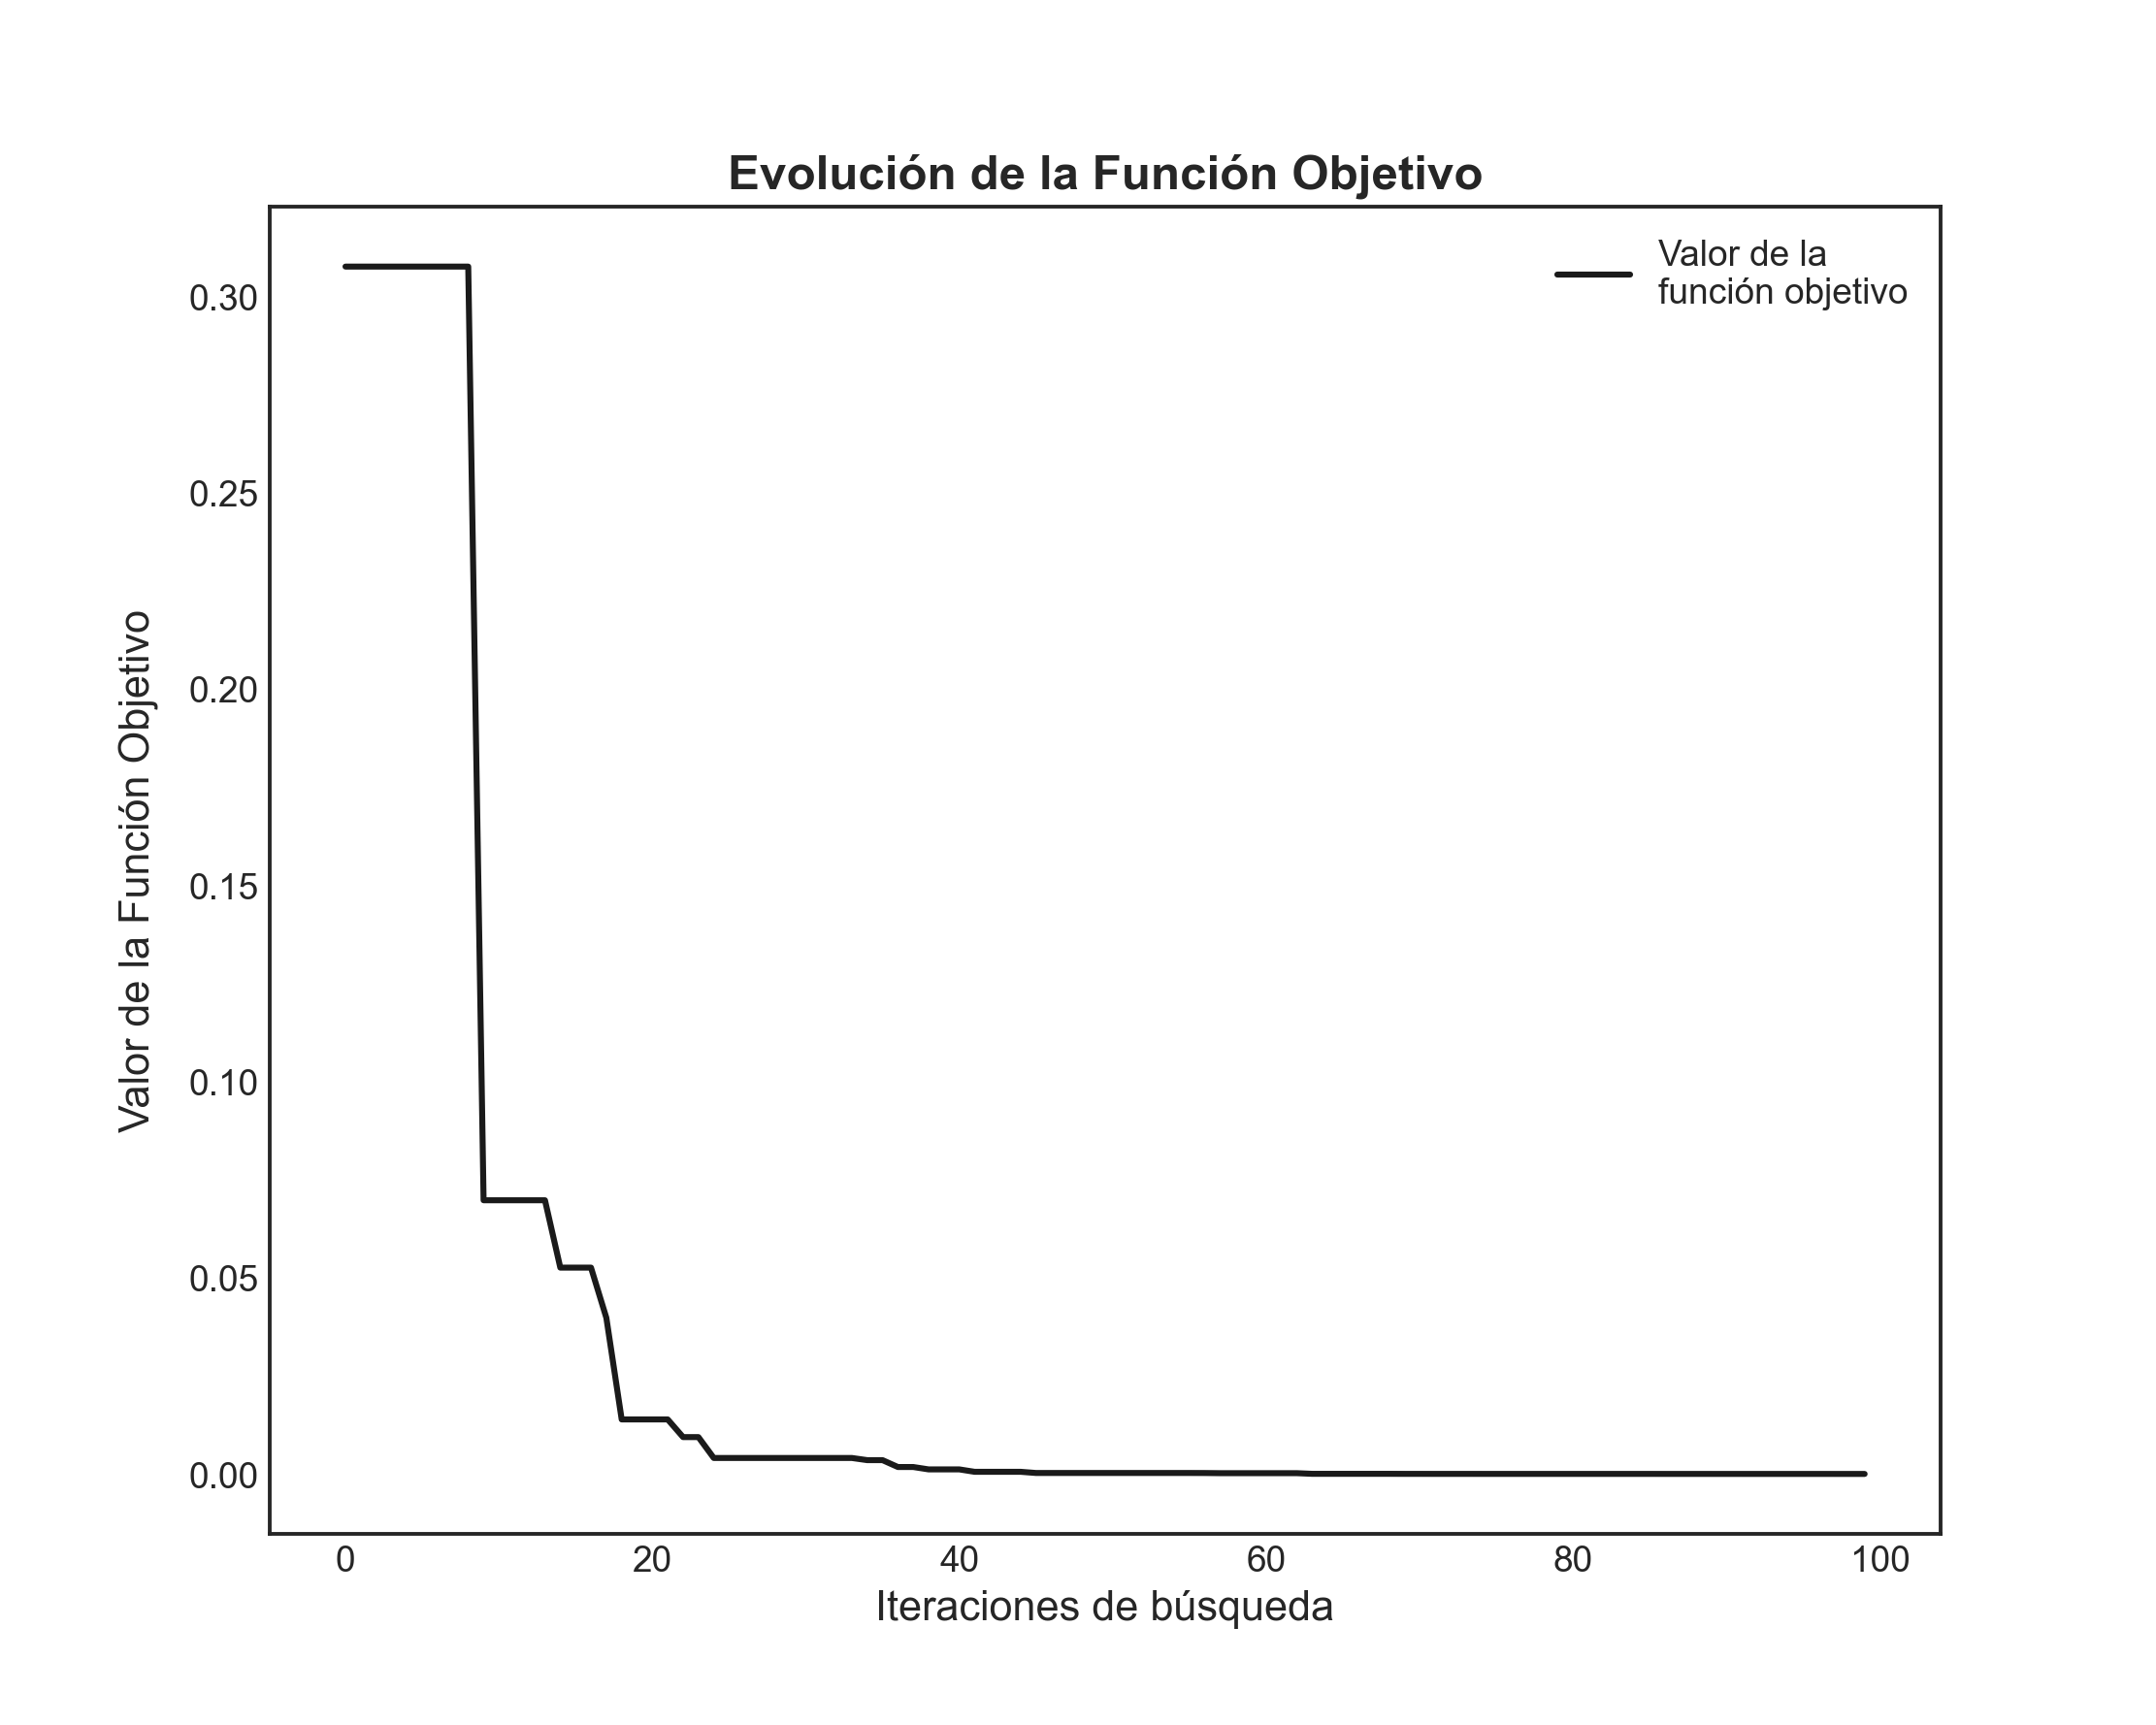

In [153]:
# Graficamos la progresión del algoritmo sobre la función esfera.
plot_cost_history(cost_history=optimizer.cost_history)
plt.title("Evolución de la Función Objetivo", fontsize=16, fontweight="bold")
plt.ylabel("Valor de la Función Objetivo", fontsize=14, labelpad=10)
plt.xlabel("Iteraciones de búsqueda", fontsize=14)
plt.legend(["Valor de la\nfunción objetivo"], loc="best", fontsize=12);

**Paso 2 - Animación de enjambres:** El módulo `pyswarms.utils.plotters` ofrece dos métodos para generar animaciones: Las funciones `plot_contour()` y `plot_surface()`. Como sus nombres lo sugieren, estos métodos permiten graficar enjambres bidimensionales de partículas en espacios en 2D o 3D, según sea el caso.

Cada método genera un objeto de tipo `matplotlib.animation.Animation` que igualmente necesita ser animado por una clase `Writer` (lo que podría implicar la instalación de un módulo que realice esta labor, aunque no si utilizamos el entorno de Anaconda®). Para el caso de los siguientes ejemplos, convertiremos las animaciones en un script de JavaScript (JS). En tal caso, necesitaremos algunas herramientas adicionales.

Finalmente, sería muy útil añadir mallas (de tipo “mesh”) en nuestro enjambre a fin de graficar curvas de nivel para la función esfera. Esto nos permitirá identificar visualmente donde se ubica nuestro enjambre con respecto a la función objetivo. Podemos lograr esto mediante la clase `Mesher`:

In [154]:
# Importamos el creador de mallas de PySwarms.
from pyswarms.utils.plotters.formatters import Mesher

In [155]:
# Inicializamos el mesher con la función esfera
m = Mesher(func=fx.ackley)

Hay varios formateadores disponibles en `pyswarms.utils.plotters.formatters` a fin de personalizar nuestros gráficos y visualizaciones. Además de `Mesher`, también está la clase `Designer` para la personalización de tipos de letra y tamaños, tamaños de las figuras, etc., y una clase `Animator` que permite setear retardos y repeticiones de las animaciones resultantes.

**Paso 3 - Graficación en el espacio bidimensional:** Podemos generar la historia de las posiciones del enjambre usando el atributo `pos_history` de la instancia `optimizer`. Para graficar un contorno bidimensional, pasamos todo esto con la instancia `Mesher` a la función `plot_contour()`. En adición, podemos marcar el mínimo global de la función esfera (el origen), a fin de visualizar el objetivo del enjambre:

In [156]:
%%capture
# Generamos la animación.
animation = plot_contour(
    pos_history=optimizer.pos_history,
    mesher=m, mark=(0, 0),
)

In [157]:
# Habilitamos la visualización de esta animación en un notebook de Jupyter.
animation.save('2D_swarm.gif', writer='imagemagick', fps=10)
Image(url='2D_swarm.gif')

2023-03-27 12:33:04,678 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2023-03-27 12:33:04,681 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


La animación bidimensional de nuestro enjambre de partículas se observa en la salida de nuestro bloque de código anterior. Notemos que el enjambre converge al óptimo, aunque una de las partículas queda a la deriva durante algunas iteraciones del algoritmo, presentando un movimiento aproximadamente oscilatorio. ◼

### Algoritmo de recocido simulado (*simulated annealing*).
El **algoritmo de recocido simulado** (en inglés, *simulated annealing* o **SA**), también conocido como cristalización simulada o enfriamiento simulado, es una meta-heurística de búsqueda para problemas de optimización global; el objetivo general de este tipo de algoritmos es encontrar una buena aproximación al valor óptimo de una función en un espacio de búsqueda grande. Dicho "óptimo global" corresponde a la solución del problema de interés para el que no existe un mejor valor, equivalente al problema de optimización global factible bajo las condiciones KKT, como hemos estado viendo hasta ahora.

El algoritmo hereda su nombre de un proceso metalúrgico conocido como *recocido*, que a su vez corresponde a una técnica que involucra el calentamiento y posterior enfriamiento controlado de un material con el objetivo de alterar sus propiedades físicas. Tanto el potencial de calentarse como de enfriarse son atributos de un material que dependen de su energía libre en el sentido termodinámico. Esta noción de enfriamiento controlado o *lento* se interpreta en el algoritmo de SA como la probabilidad de aceptar soluciones *peores* a la actual a medida que exploramos un espacio de búsqueda (que suele ser inusualmente grande). La aceptación de soluciones *peores* permite una búsqueda más extensiva de la solución óptima global de un problema dado. 

En general, el algoritmo de SA trabaja de la siguiente manera: La *temperatura* decrece progresivamente a partir de un valor inicial hasta llegar a cero, en determinados pasos que emulan instantes de tiempo. En cada instante, el algoritmo selecciona aleatoriamente una solución cercana a la actual, mide su calidad, y se mueve hacia ella de acuerdo a las probabilidades (dependientes de la temperatura) de seleccionar soluciones mejores o peores. Por supuesto, tales probabilidades se representan mediante valores definidos en el intervalo $[0, 1]$.

#### Conceptualización.
El estado de algunos sistemas físicos, y la función objetivo a minimizar (digamos, $E(s)$), es análoga a la energía interna del sistema en dicho estado. El objetivo es llevar el sistema desde un estado inicial arbitrario a uno cuya energía interna es la menor posible.

En cada paso, la heurística de SA considera algún estado vecino $s^\star$ del estado actual $s$, y decide en base a un criterio probabilístico si el sistema se mueve hacia el estado $s^\star$, o bien, permanece en el estado $s$. Estas probabilidades, finalmente, llevan al sistema a moverse hacia los estados con menor energía. Típicamente, este paso se repite hasta que el sistema llega a un estado que nos satisface en el contexto de nuestro problema, o bien, hasta que los recursos computacionales asignados se han agotado.

La optimización de una solución involucra pues la evaluación de los estados vecinos de problema en consideración, los cuales son nuevos estados que se producen después de alterar conservativamente un estado dado. Por ejemplo, si consideramos el problema en el cual un vendedor debe decidir qué ciudades visitar en una ruta que debe considerar un total de $n$ ciudades en su itinerario, es razonable que deseemos recorrer siempre la ruta más corta y que nos permita visitar todas esas ciudades. Este problema es muy conocido en la optimización matemática, y se conoce como el **problema del vendedor viajero** (**TSP**, del inglés *traveling salesman problem*). En el contexto de este problema, cada estado es típicamente definido como una permutación de las ciudades que se deben visitar, y los vecinos de cada estado corresponden al conjunto de permutaciones que se generar al intercambiar cualquier par de ciudades. La forma (bien definida) en la cual los estados se alteran para producir estados vecinos se denomina *movimiento*, y movimientos diferentes producen conjuntos diferentes de estados vecinos. Tales movimientos, usualmente, resultan en alteraciones mínimas del último estado conocido, en un intento de mejorar progresivamente la solución actual, mejorando partes de ella. Por ejemplo, en el problema TSP, mejoramos las conexiones entre las ciudades.

La probabilidad de hacer una transición del estado actual $s$ al estado candidato $s_{\mathrm{new}}$ se especifica mediante una **función de probabilidad de aceptación** que suele denotarse como $P(e, e_{\mathrm{new}}, T)$, que depende de las energías $e=E(s)$ y $e_{\mathrm{new}}=E(s_{\mathrm{new}})$ de los dos estados, y un parámetro global que varía con el tiempo, que llamamos temperatura, y lo denotamos como $T$. Los estados con una menor cantidad de energía interna son mejores que aquellos con mayor energía. La función de probabilidad $P$ debe ser positiva incluso cuando $e_{\mathrm{new}}$ es mayor que $e$. Esta característica previene que el método se atasque en un mínimo local.

Cuando $T\rightarrow 0$, la probabilidad $P(e, e_{\mathrm{new}}, T)$ también debe tender a cero si $e_{\mathrm{new}}>e$, o a un valor positivo en cualquier otro caso. Para valores suficientemente pequeños de $T$, el sistema favorecerá, incrementalmente, los movimientos que vayan cuesta abajo (es decir, en favor de valores más pequeños de energía interna), evitando los movimientos que vayan cuesta arriba. Con $T=0$, el procedimiento se reduce meramente a un *algoritmo codicioso* (similar al método de gradiente descendiente), que solamente se mueve cuesta abajo.

Como bien dijimos antes, el nombre y la inspiración del algoritmo proveen de un proceso metalúrgico, definido mayormente por la temperatura de recocido y posterior enfriamiento de ciertos materiales, tales como el acero y los cristales. Aquello, en el contexto de un problema de optimimización, requiere de una reducción gradual del parámetro de temperatura a medida que la simulación se lleva a cabo. El algoritmo parte con $T=T_{0}$, el cual generalmente es un valor de temperatura bastante grande (incluso, infinito), y luego se decrece gradualmente mediante un **protocolo de recocido**, que puede ser especificado por nosotros, pero, en todos los casos, termina con $T=0$ hacia el final del proceso. De esta manera, se espera que el sistema inicialmente varíe en una región determinada del espacio de búsqueda que contiene buenas soluciones, ignorando pequeñas características de la energía interna del sistema, para luego transicionar a regiones con densidades bajas de energía que se hacen cada vez más y más pequeñas; y finalmente, moverse cuesta abajo en una lógica similar a la de un algoritmo codicioso.

Considerando todo lo anterior, el algoritmo de SA puede presentarse en un esquema de pseudocódigo como sigue:

- **PASO 1:** Sea $s=s_{0}$.
- **PASO 2:** Para $k=0,...,k_{\mathrm{max}}$:
    - $T\leftarrow \mathrm{Temperatura}(1 + (k+1)/k_{\mathrm{max}})$
    - Escogemos un vecino aleatorio, $s_{\mathrm{max}}\leftarrow \mathrm{vecino}(s)$
    - Si $P(E(s),E(s_{\mathrm{max}}),T)\geq \mathcal{U}(0,1)$:
        - $s\leftarrow s_{\mathrm{max}}$
- **PASO 3:** La salida final es el estado $s$.

A fin de aplicar el algoritmo de SA a un problema de optimización específico, debemos especificar una cierta cantidad de hiperparámetros: El espacio que define a los estados del problema, la función objetivo que se esquematiza por medio de una función de energía interna $E(s)$, el procedimiento generador de estados candidatos, la funcion probabilìstica de aceptación $P$, la programación de recocido y la temperatura inicial $T_{0}$. La elección de estos hiperparámetros es crítica en la efectividad del algoritmo. Desafortunadamente, no existe una elección fija para *cualquier* problema, y la elección correcta dependerá de la experiencia y/o de los métodos que utilicemos para probar varias opciones de hiperparámetros.